In [1]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

from dso import DeepSymbolicOptimizer



In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/raw/complete_data/complete_samples_up_until_020625.csv')

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.sampling.sampler import PARAMETER_RANGES

In [4]:
ucell_cols = [f'Ucell_{i}' for i in range(31)]
ifc_cols = [f'ifc_{i}' for i in range(31)]

# Combine into long format
df_long = df.melt(
    id_vars=[col for col in df.columns if col not in ucell_cols + ifc_cols],
    value_vars=ucell_cols,
    var_name='step',
    value_name='Ucell'
)

df_long['ifc'] = df.melt(
    id_vars=[col for col in df.columns if col not in ucell_cols + ifc_cols],
    value_vars=ifc_cols,
    value_name='ifc'
)['ifc']

In [5]:
data = df_long[df_long['step'] == "Ucell_0"]
data

id         Tfc         Pa_des         Pc_des   Sa        Sc  \
0        0  338.667402  265533.590590  263533.590590  1.3  1.208556   
1        1  340.396031  195807.232551  193807.232551  1.3  2.099547   
2        2  353.938896  237981.340600  235981.340600  1.3  1.616925   
3        3  350.872026  293476.356033  291476.356033  1.3  2.890749   
4        4  333.068520  267536.716813  265536.716813  1.3  1.295236   
...    ...         ...            ...            ...  ...       ...   
1284  2508  342.474000  240000.000000  200000.000000  1.2  2.600000   
1285  2511  342.474000  240000.000000  200000.000000  1.2  1.700000   
1286  2513  353.526000  240000.000000  200000.000000  1.2  2.600000   
1287  2520  353.526000  240000.000000  200000.000000  1.2  2.600000   
1288  2523  342.474000  240000.000000  200000.000000  1.2  2.600000   

      Phi_a_des  Phi_c_des  epsilon_gdl       tau  ...    b_slim  a_switch  \
0           0.5   0.251135     0.785790  1.037960  ...  0.772228  0.961079   
1           0.5   0.476381     0.719128  2.680852  ...  0.276596  0.368953   
2           0.5   0.466789     0.795109  2.378581  ...  0.778828  0.698198   
3           0.5   0.373722     0.572208  3.481282  ...  0.040218  0.738968   
4           0.5   0.676360     0.723389  2.641811  ...  0.602768  0.388851   
...         ...        ...          ...       ...  ...       ...       ...   
1284        0.4   0.660000     0.701000  1.316000  ...  0.368000  0.526000   
1285        0.4   0.660000     0.701000  1.316000  ...  0.368000  0.842000   
1286        0.4   0.660000     0.701000  1.789000  ...  0.842000  0.526000   
1287        0.4   0.440000     0.701000  1.789000  ...  0.842000  0.526000   
1288        0.4   0.440000     0.701000  1.789000  ...  0.842000  0.842000   

      start_in_range  early_values_in_range  monotonic  minimum_voltage  \
0              False                  False       True             True   
1              False                  False       True             True   
2              False                  False       True             True   
3              False                  False       True             True   
4              False                  False       True             True   
...              ...                    ...        ...              ...   
1284            True                   True       True             True   
1285            True                   True       True             True   
1286            True                   True       True             True   
1287            True                   True      False             True   
1288            True                   True       True             True   

      classification     step     Ucell       ifc  
0            invalid  Ucell_0  6.597592  0.000808  
1            invalid  Ucell_0  4.332334  0.000825  
2            invalid  Ucell_0  1.533350  0.000817  
3            invalid  Ucell_0  5.150568  0.000810  
4            invalid  Ucell_0  1.570405  0.000817  
...              ...      ...       ...       ...  
1284           valid  Ucell_0  0.907243  0.000822  
1285           valid  Ucell_0  0.925549  0.000815  
1286           valid  Ucell_0  0.863057  0.000812  
1287         invalid  Ucell_0  0.902505  0.000826  
1288           valid  Ucell_0  0.937497  0.000821  

[1289 rows x 28 columns]

In [9]:
cols = list(PARAMETER_RANGES.keys())

X = data[cols].dropna()
y = data['Ucell'].dropna()

X_np = X.to_numpy()
y_np = y.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X is a 2D NumPy array and y is a 1D NumPy array
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42
)

from dso import DeepSymbolicRegressor
model = DeepSymbolicRegressor(config='DSR_conf.json',)
model.fit(X_train, y_train)


-- BUILDING PRIOR START -------------
LengthConstraint: Sequences have minimum length 4.
                  Sequences have maximum length 64.
RelationalConstraint: [exp] cannot be a child of [log].
InverseUnaryConstraint: RelationalConstraint: [log] cannot be a child of [exp].
NoInputsConstraint: Sequences contain at least one input variable Token.
UniformArityPrior: Activated.
SoftLengthPrior: No description available.
RepeatConstraint: [poly] cannot occur more than 1 times.
RelationalConstraint: [poly] cannot be a descendant of [abs].
-- BUILDING PRIOR END ---------------

-- RUNNING ITERATIONS START -------------
[00:00:00:01.77] Training iteration 1, current best R: 0.5003

	** New best
	Reward: 0.5002556233739
	Count Off-policy: 0
	Count On-policy: 1
	Originally on Policy: True
	Invalid: False
	Traversal: mul,add,1.0,abs,sub,x11,x17,mul,x1,x17
	Expression:
	  x₁⋅x₁₇⋅(│x₁₁ - x₁₇│ + 1.0)

-- RUNNING ITERATIONS START -------------
-- RUNNING ITERATIONS START -------------
-- RUNNING I

DeepSymbolicRegressor(config=defaultdict(<class 'dict'>,
                                         {'checkpoint': {},
                                          'experiment': {'exp_name': None,
                                                         'logdir': None,
                                                         'seed': 0},
                                          'gp_meld': {'generations': 20,
                                                      'mutate_tree_max': 3,
                                                      'p_crossover': 0.5,
                                                      'p_mutate': 0.5,
                                                      'parallel_eval': False,
                                                      'tournament_size': 5,
                                                      'train_n': 50,
                                                      'verbose': False},
                                          'logging': {'hof': 100,
          

In [14]:
# Prediction and evaluation
y_pred = model.predict(X_test)

In [16]:
# After fitting the model
print(model.program_.pretty())


    ___________
   ╱    x₁₇    
  ╱  ───────── 
╲╱   x₁₅ + x₁₆ 


In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define parametric family
def quadratic(t, a, b, c):
    return a * t**2 + b * t + c

# Identify columns
ifc_cols = [f"ifc_{i}" for i in range(31)]
ucell_cols = [f"Ucell_{i}" for i in range(31)]
input_cols = list(PARAMETER_RANGES.keys())

# Prepare result storage
params_list = []
inputs_list = []

for idx, row in df.iterrows():
    t = row[ifc_cols].values.astype(float)
    y = row[ucell_cols].values.astype(float)
    inputs = row[input_cols]

    try:
        popt, _ = curve_fit(quadratic, t, y, maxfev=10000)
        params_list.append(popt)  # [a, b, c]
        inputs_list.append(inputs.values)
    except RuntimeError:
        params_list.append([np.nan, np.nan, np.nan])
        inputs_list.append(inputs.values)

# Create DataFrames
df_inputs = pd.DataFrame(inputs_list, columns=input_cols)
df_params = pd.DataFrame(params_list, columns=["a", "b", "c"])
df_model = pd.concat([df_inputs, df_params], axis=1)


c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [15]:
from pysr import PySRRegressor

X = df_inputs.values  # shape (n_samples, n_features)

# Target vectors
y_a = df_params['a'].values
y_b = df_params['b'].values
y_c = df_params['c'].values

# Define symbolic regression models
sr_a = PySRRegressor(niterations=1000, model_selection="best")
sr_b = PySRRegressor(niterations=1000, model_selection="best")
sr_c = PySRRegressor(niterations=1000, model_selection="best")

# Fit the models
sr_a.fit(X, y_a)
sr_b.fit(X, y_b)
sr_c.fit(X, y_c)


[juliapkg] Found dependencies: c:\users\dejvi\documents\github\sensitivity-analysis-and-surrogate-modeling-of-pem-fuel-cells\.dsr_venv\lib\site-packages\juliacall\juliapkg.json
[juliapkg] Found dependencies: c:\users\dejvi\documents\github\sensitivity-analysis-and-surrogate-modeling-of-pem-fuel-cells\.dsr_venv\lib\site-packages\pysr\juliapkg.json
[juliapkg] Found dependencies: c:\users\dejvi\documents\github\sensitivity-analysis-and-surrogate-modeling-of-pem-fuel-cells\.dsr_venv\lib\site-packages\juliapkg\juliapkg.json
[juliapkg] Locating Julia ~1.6.7, ~1.7, ~1.8, ~1.9, =1.10.0
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.0 to c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\julia_env\pyjuliapkg\install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to have Julia
[juliapkg]   installed in multiple location

c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1303: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  "Note: it looks like you are running in Jupyter. "
c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1890: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  "Note: you are running with 10 features

Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.220e+05
Head worker occupation: 30.9%
Progress: 253 / 15000 total iterations (1.687%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           4.451e+06  5.314e+00  y = -350.8 / x3
5           4.300e+06  1.732e-02  y = (6907.7 * x5) + -4934.7
7           3.815e+06  5.979e-02  y = (-1.2935 / (0.0014556 - x15)) * x6
9           3.209e+06  8.652e-02  y = (x6 * (-1.1557 / (0.00043252 + x15))) / x3
11          2.276e+06  1.718e-01  y = ((-28.166 / ((0.012587 + x14) + x15)) * x6) / x5
13          1.540e+06  1.953e-01  y = ((-35.39 / (((0.010568 - x14) / x6) - x15)) * x6) * x4
15          1.322e+06  7.625e-02  y = ((-38.548 / (x3 * ((0.0068123 - x14) - x15))) * x6) * (x4 ...
                                  / x5)
17          1.212e+06  4.356e-02  y = ((-38.548 / (x3 * ((0.0068123 + x14) - (x15 * x2)))) * x6)...
                                   

c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1303: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  "Note: it looks like you are running in Jupyter. "
c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1890: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  "Note: you are running with 10 features


Expressions evaluated per second: 1.440e+05
Head worker occupation: 31.2%
Progress: 280 / 15000 total iterations (1.867%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           7.624e+06  5.314e+00  y = 126.78 * x6
5           7.454e+06  1.123e-02  y = x0 / (x3 - x4)
7           7.319e+06  9.139e-03  y = x0 / ((x3 - x4) * x5)
9           6.965e+05  1.176e+00  y = x0 / (((0.75679 * x3) + x14) - x4)
11          6.146e+05  6.260e-02  y = x0 / (((0.75528 * x3) + (x14 * x2)) - x4)
13          5.996e+05  1.234e-02  y = x0 / (((0.75679 * x3) - ((x14 / x9) * x2)) - x4)
15          5.982e+05  1.151e-03  y = ((x0 / (((0.75679 * x3) + (x14 * x0)) - x4)) * 1.0506) - x...
                                  14
19          5.837e+05  6.131e-03  y = ((x6 * (x0 / (((0.7703 * x3) + (x14 * x2)) - x4))) / (0.77...
                                  03 * x3)) - 0.7703
----------------------------

c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1303: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  "Note: it looks like you are running in Jupyter. "
c:\Users\dejvi\Documents\GitHub\Sensitivity-Analysis-and-Surrogate-Modeling-of-PEM-Fuel-Cells\.DSR_venv\lib\site-packages\pysr\sr.py:1890: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  "Note: you are running with 10 features


Expressions evaluated per second: 1.510e+05
Head worker occupation: 32.4%
Progress: 298 / 15000 total iterations (1.987%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           8.749e+07  5.314e+00  y = x6 * 284.45
5           8.648e+07  5.768e-03  y = (7344 / x5) - 10551
7           8.648e+07  1.806e-05  y = (7353.3 / x5) + (-10872 + x0)
9           7.236e+07  8.911e-02  y = (575.8 / (x3 + (-1.1812 + x15))) - 575.8
11          7.201e+07  2.427e-03  y = ((575.8 - x12) / (x3 + (-1.1812 + x15))) - x3
13          6.956e+07  1.735e-02  y = (((575.8 * x4) - x12) / ((-1.1812 + x15) + x3)) + 0.77347
15          5.896e+07  8.261e-02  y = (x12 / ((((x5 * (x0 / x12)) / x11) - x14) + -0.08177)) / x...
                                  7
17          4.474e+07  1.380e-01  y = (x12 / ((((((x0 / x12) * x5) / x11) + -0.08177) - x14) * x...
                                  3)) / x7
19     

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           464.2907   
	1        0.002319                                     1608.0663 / x3   
	2        0.031423                              x6 / (x3 + -1.199769)   
	3        0.146887                 831.3255 / (x3 - (x4 * 1.3172182))   
	4  >>>>  0.398480       320.29843 / ((x3 + (x15 + x8)) + -1.4479426)   
	5        0.051240      x16 * (x0 / ((x8 + (x15 + x3)) + -1.4487079))   
	6        0.060363  (x0 * (x16 - -0.4359735)) / (((x8 + x15) + x3)...   
	7        0.008277  (x0 * (x16 - -0.44037306)) / (-1.4479426 + ((x...   
	8        0.002424  (x0 * (x16 - -0.44037306)) / (-1.4479426 + ((x...   
	9        0.001096  ((x0 * x9) * ((x16 - -0.439402) * x8)) / ((-1....   
	
	         loss  complexity  
	0  87665540.0           1  
	1  87259850.0           3  
	2  81944744.0           5  
	3  61085250.0           7  
	4  27530944.0       

In [16]:
print("a(x) =", sr_a.get_best())
print("b(x) =", sr_b.get_best())
print("c(x) =", sr_c.get_best())


a(x) = complexity                                                      17
loss                                                     274549.72
score                                                      0.26252
equation         (x13 + -87.14903) / ((((x15 / 62.969048) - (x1...
sympy_format     x4*(x13 - 87.14903)/(x3*(-x14*(x2 - 259759.53)...
lambda_format    PySRFunction(X=>x4*(x13 - 87.14903)/(x3*(-x14*...
Name: 8, dtype: object
b(x) = complexity                                                       9
loss                                                      618462.3
score                                                     0.677966
equation               4.7626863 / (((0.7500928 + x14) * x3) - x4)
sympy_format                 4.7626863/(x3*(x14 + 0.7500928) - x4)
lambda_format    PySRFunction(X=>4.7626863/(x3*(x14 + 0.7500928...
Name: 4, dtype: object
c(x) = complexity                                                       9
loss                                                    275309

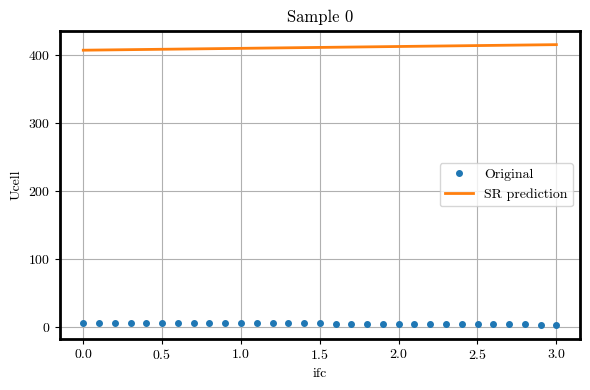

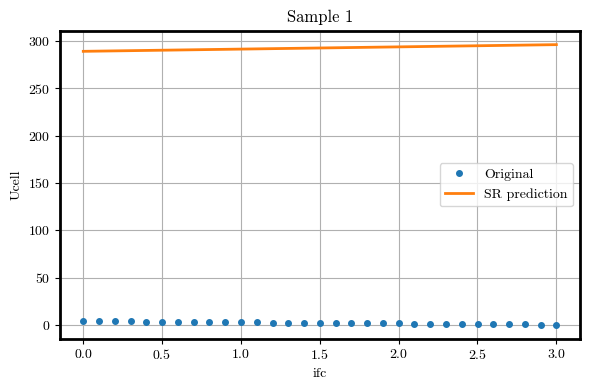

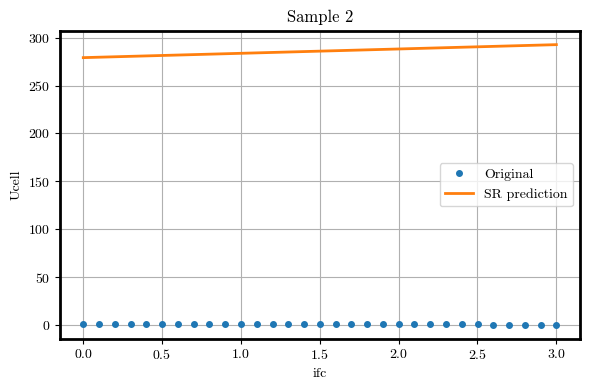

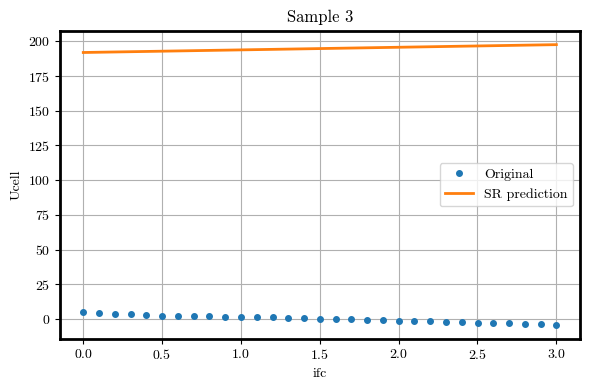

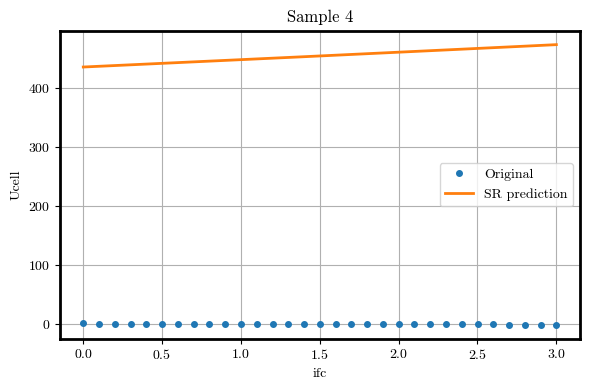

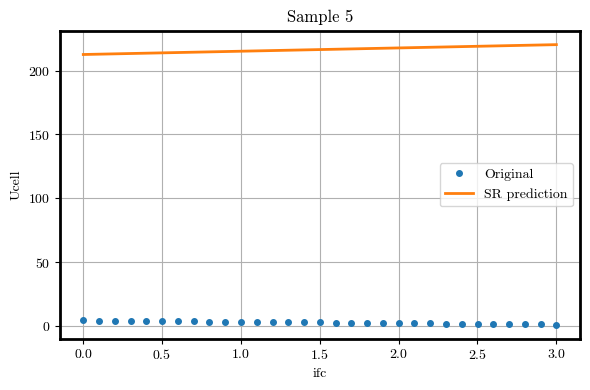

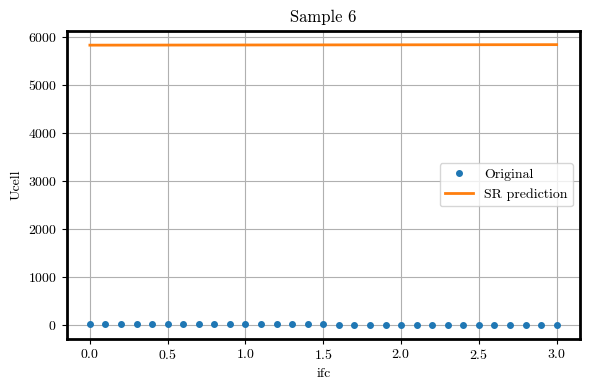

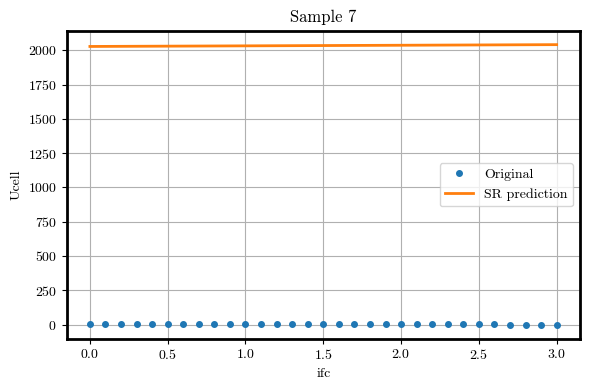

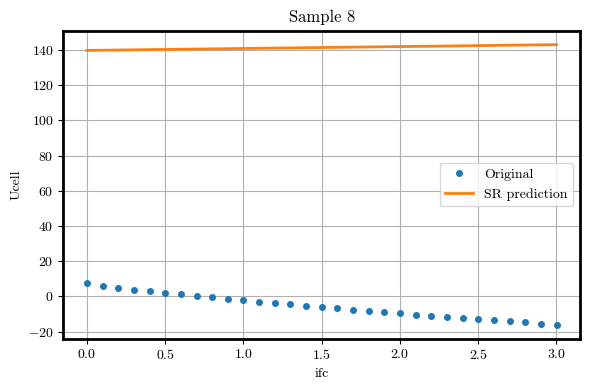

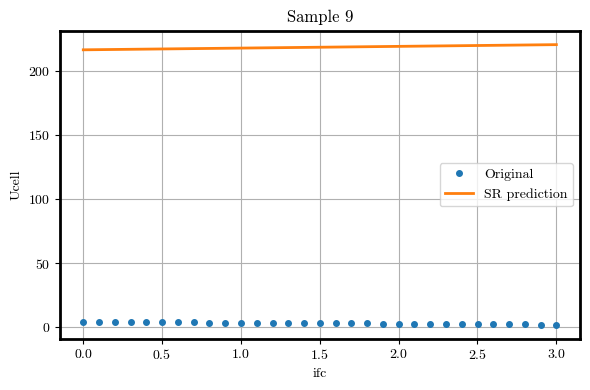

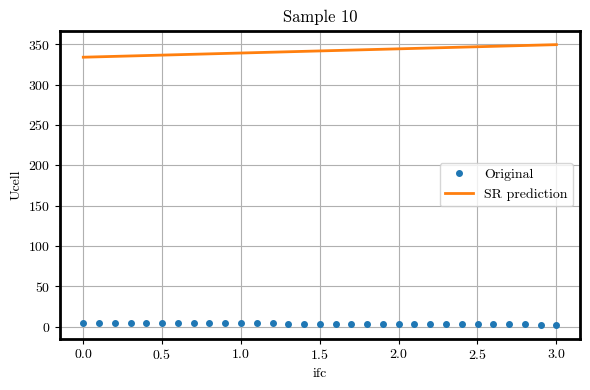

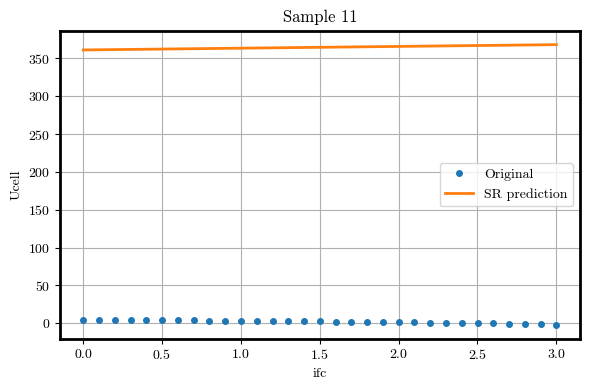

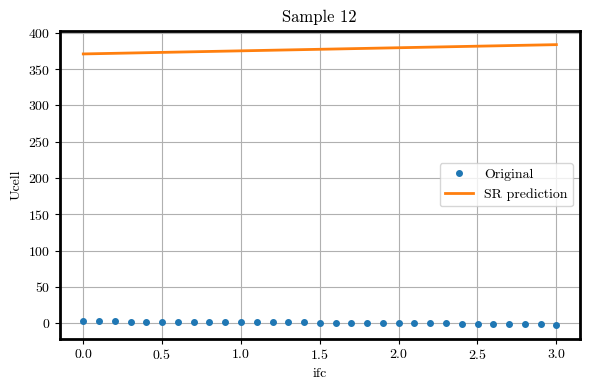

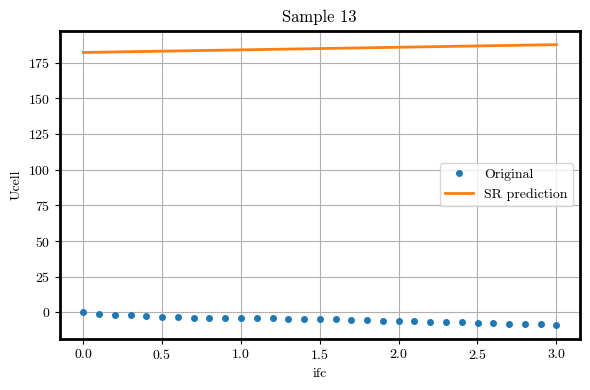

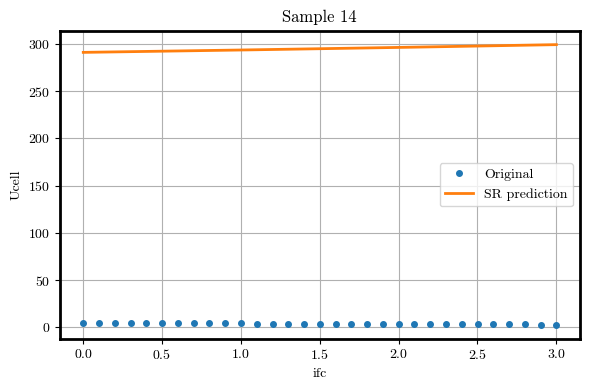

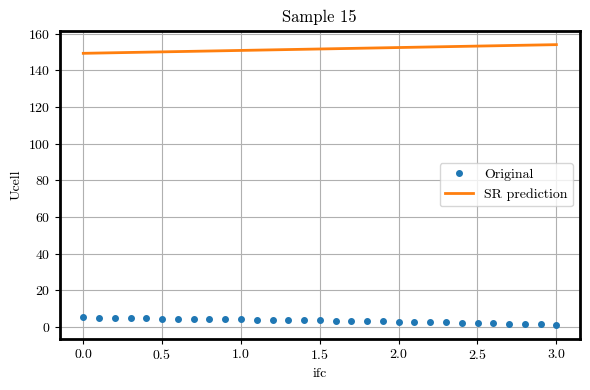

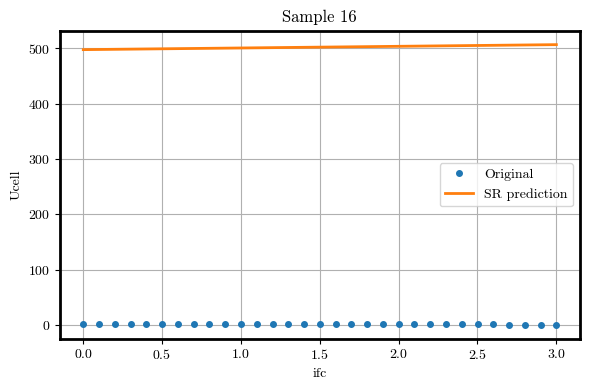

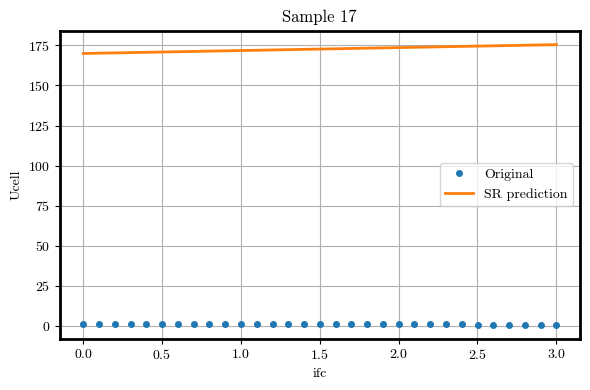

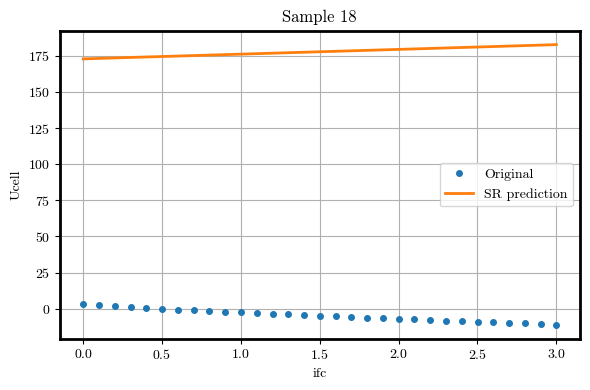

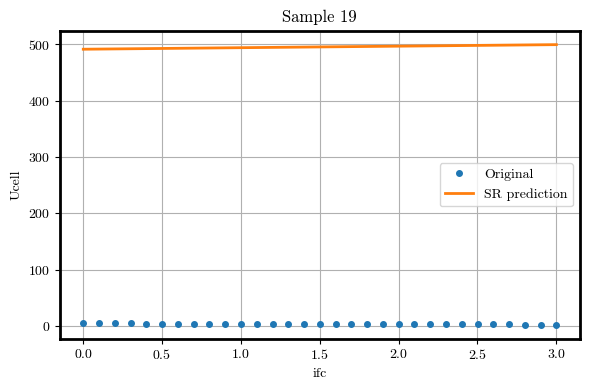

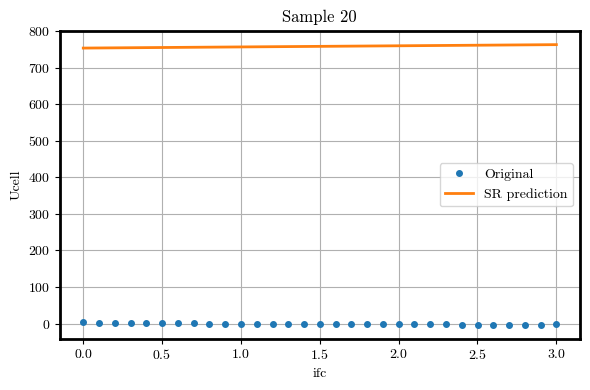

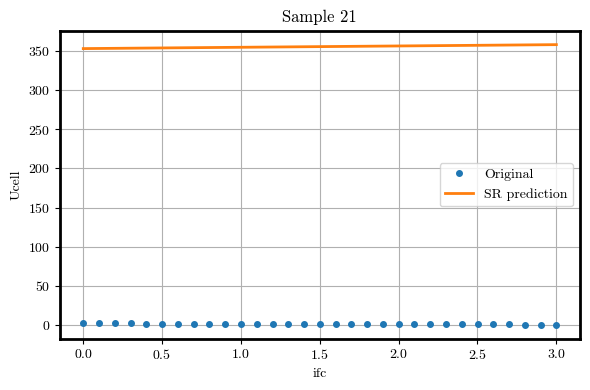

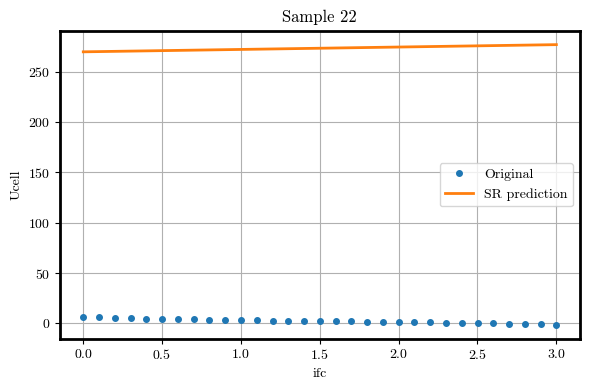

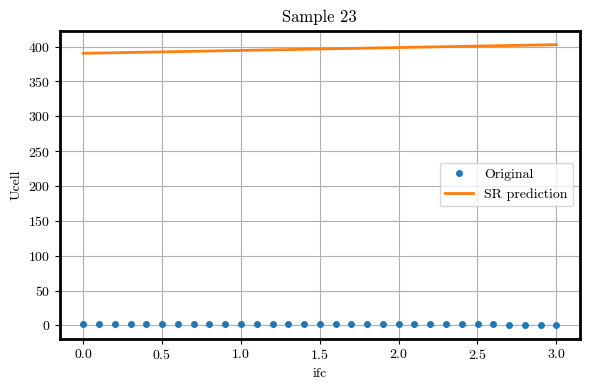

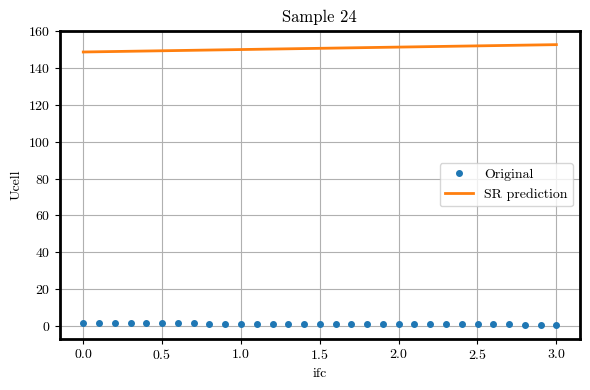

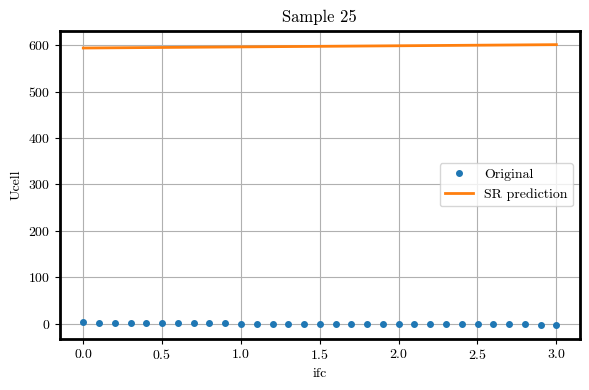

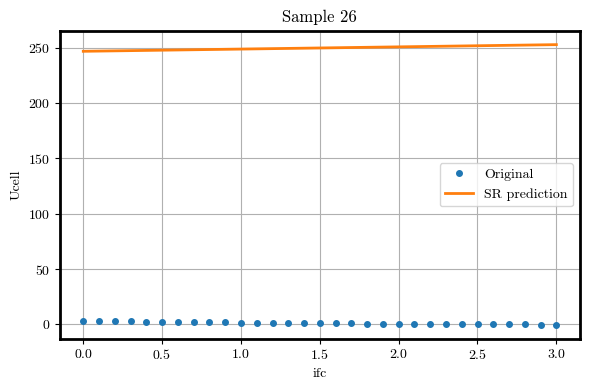

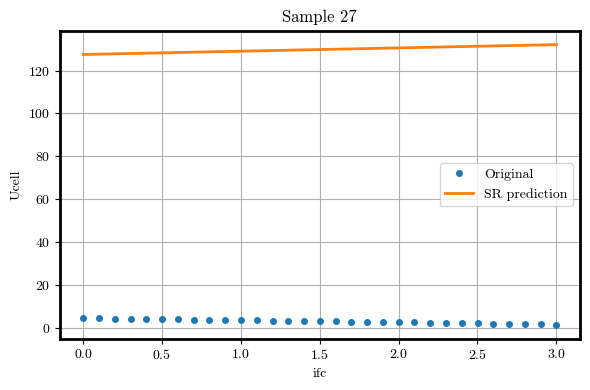

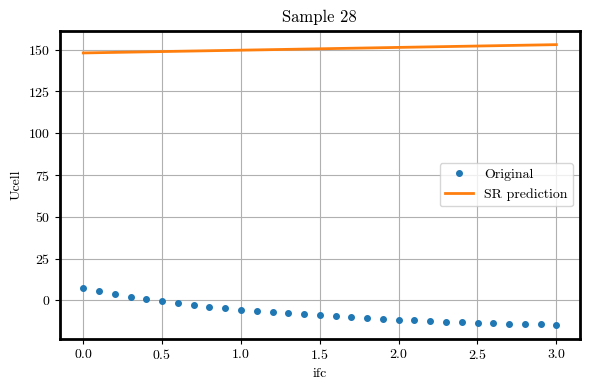

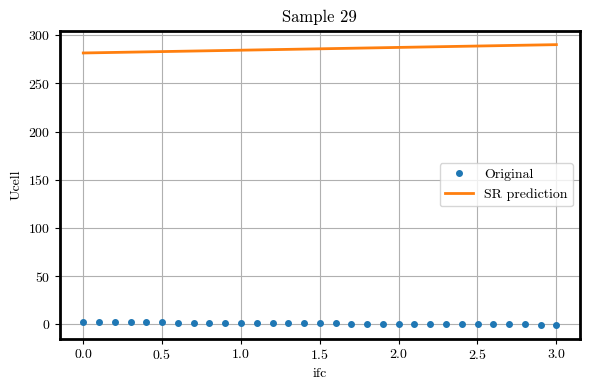

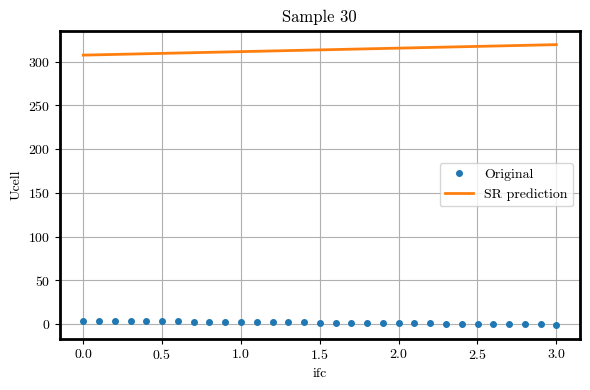

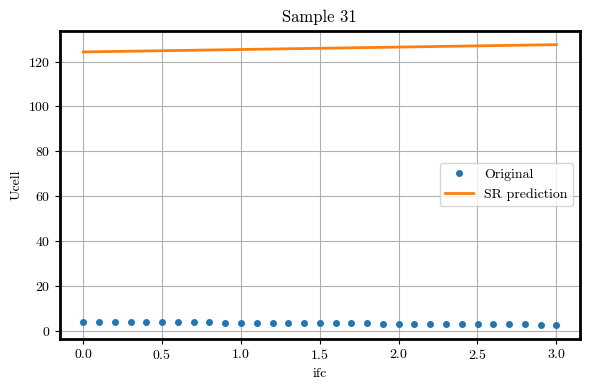

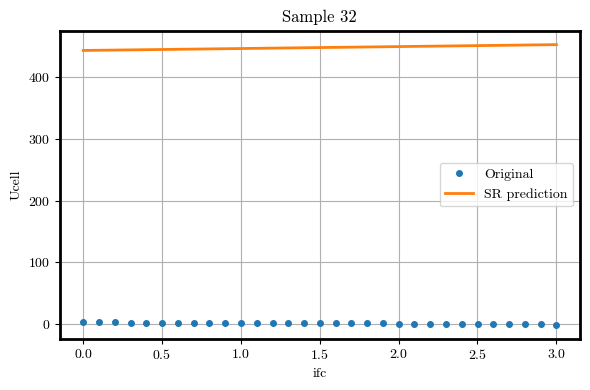

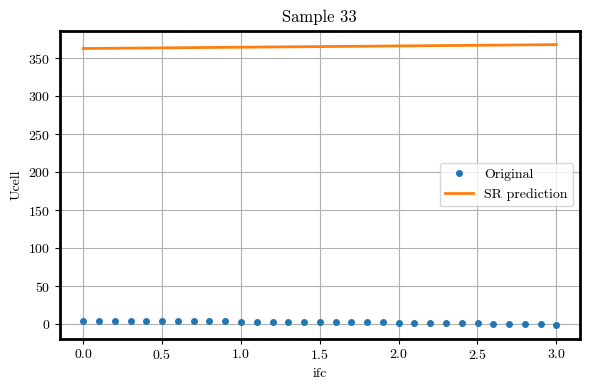

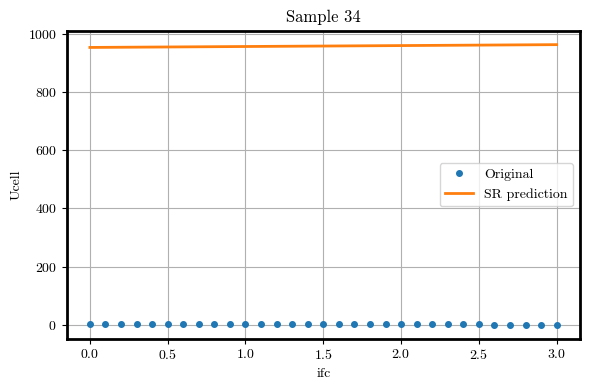

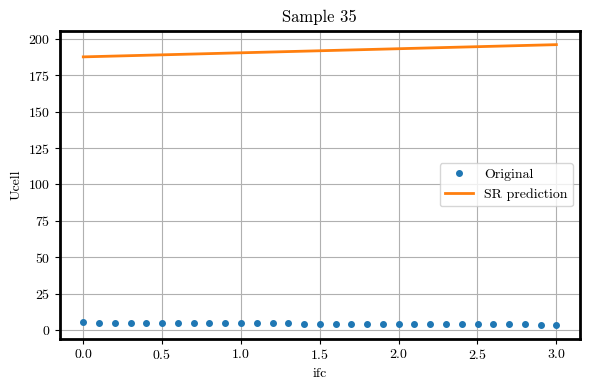

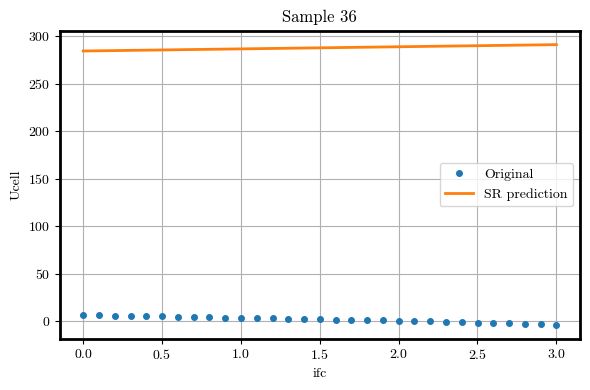

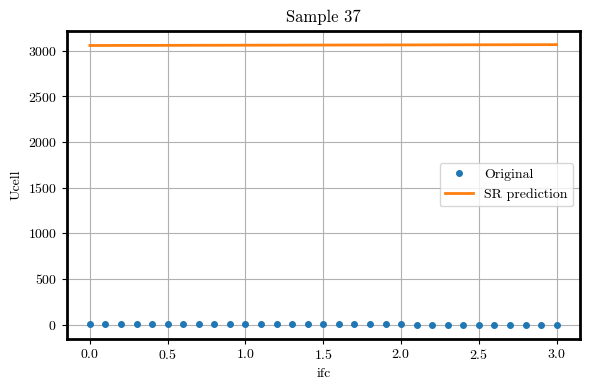

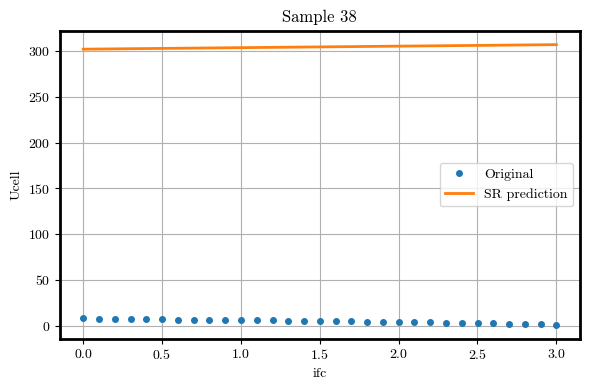

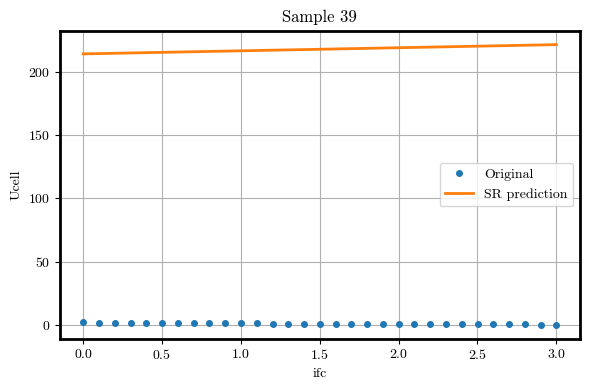

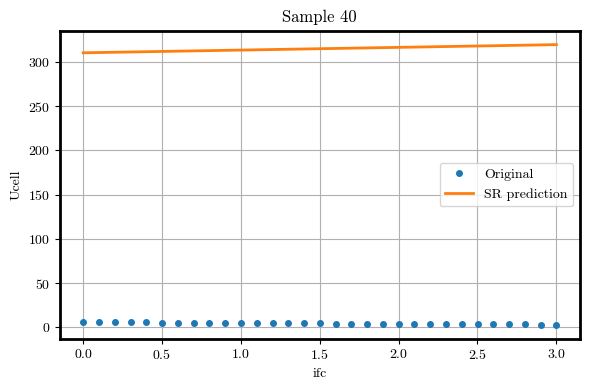

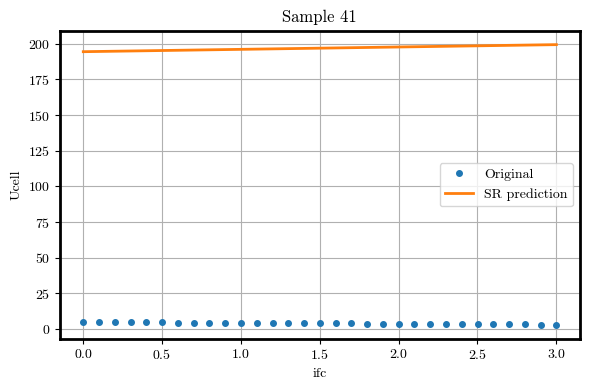

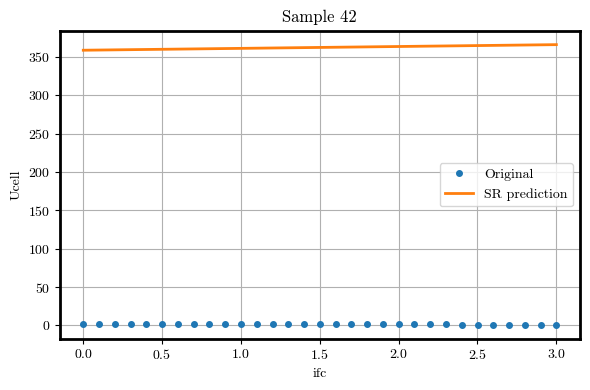

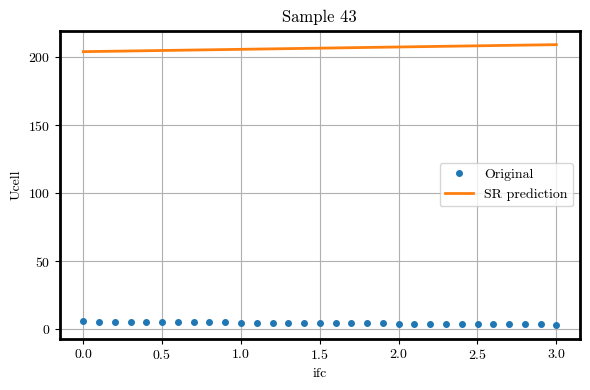

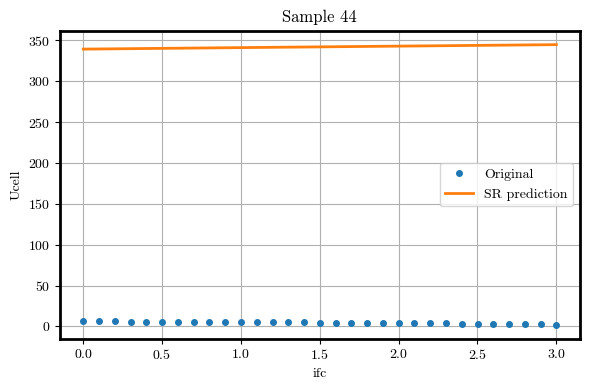

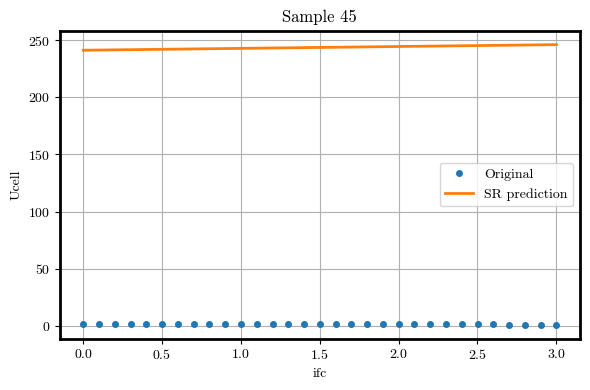

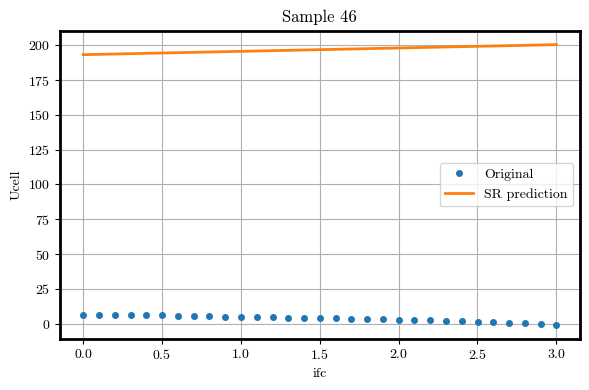

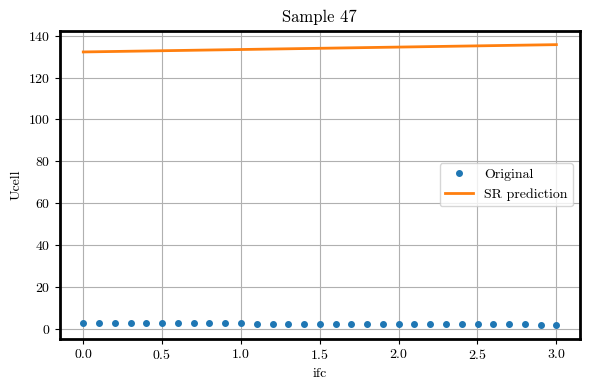

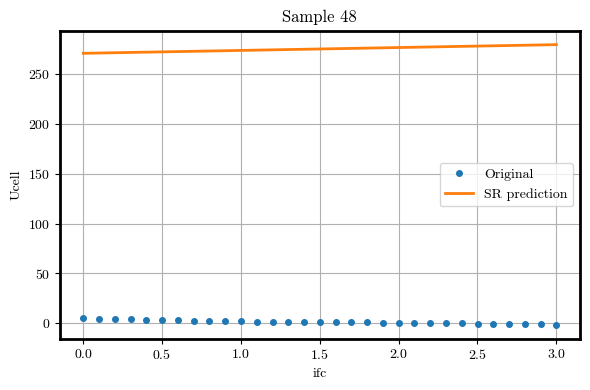

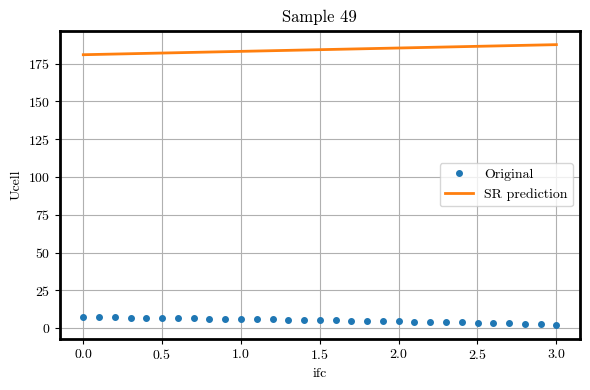

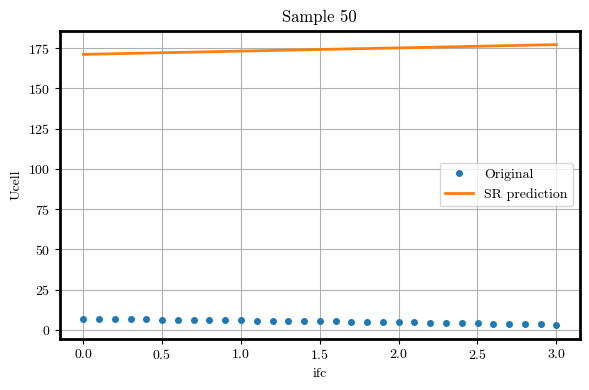

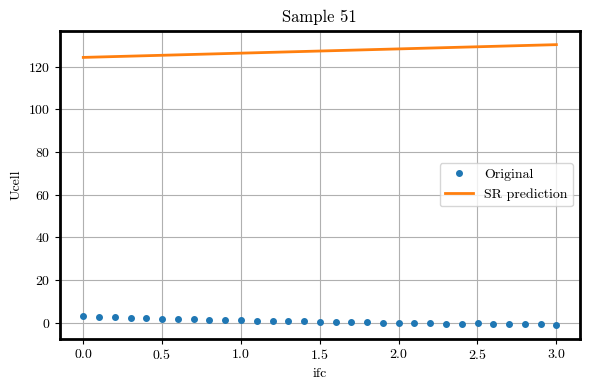

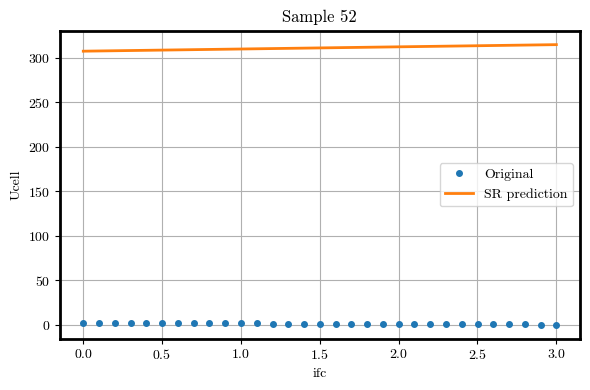

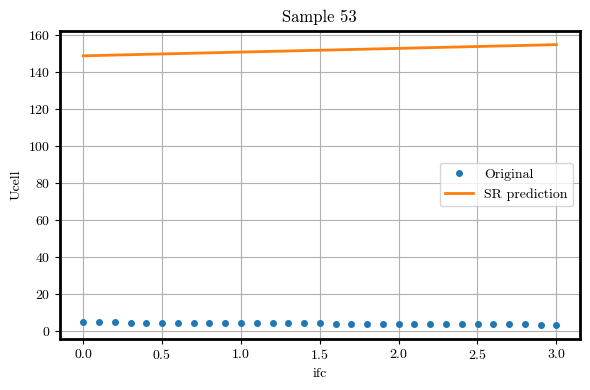

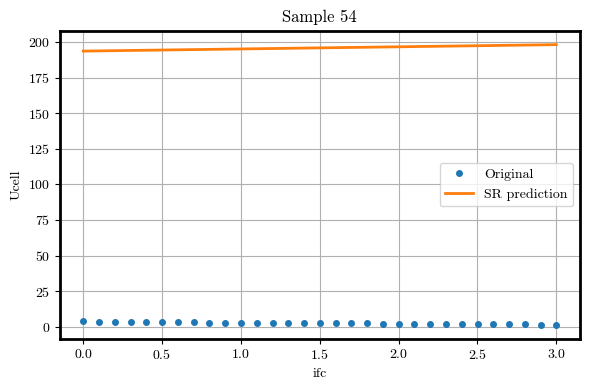

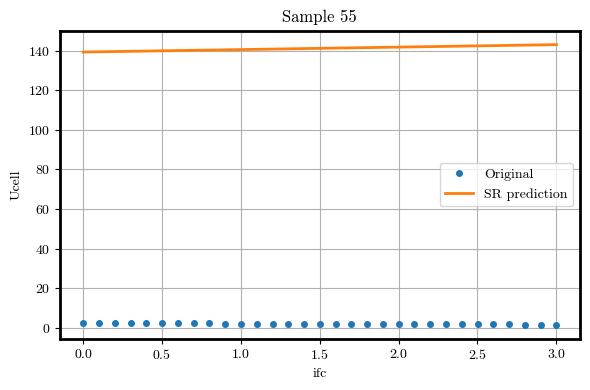

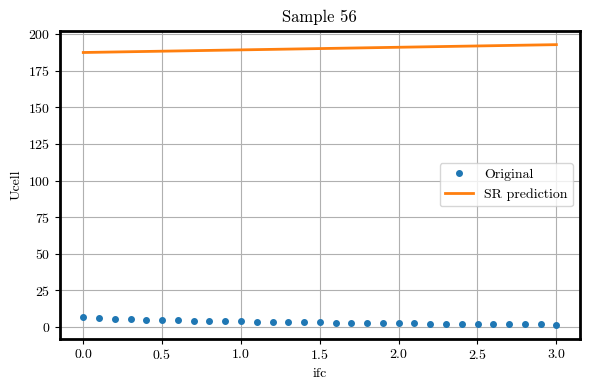

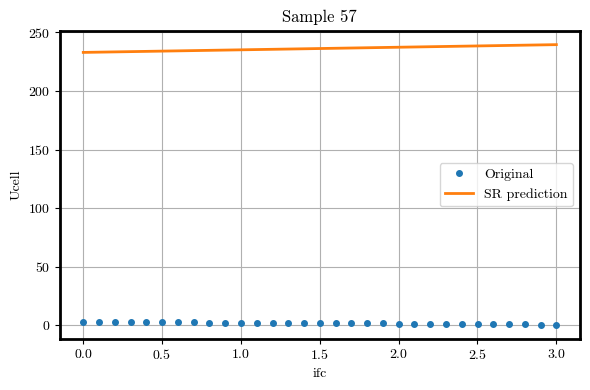

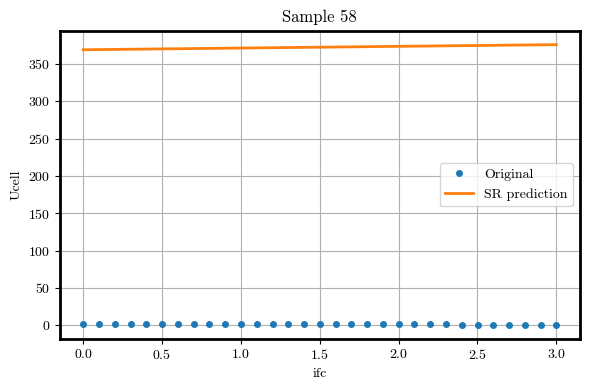

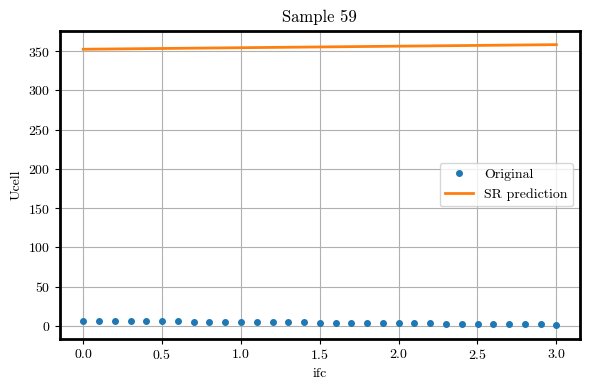

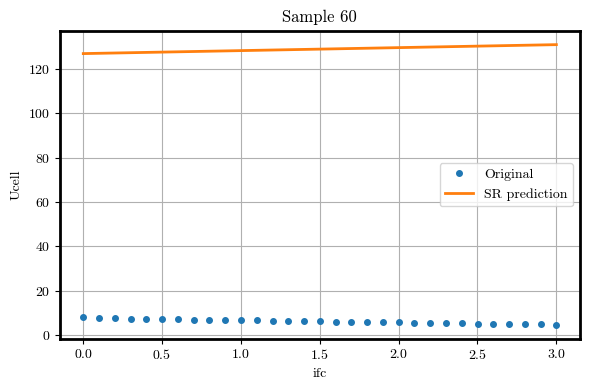

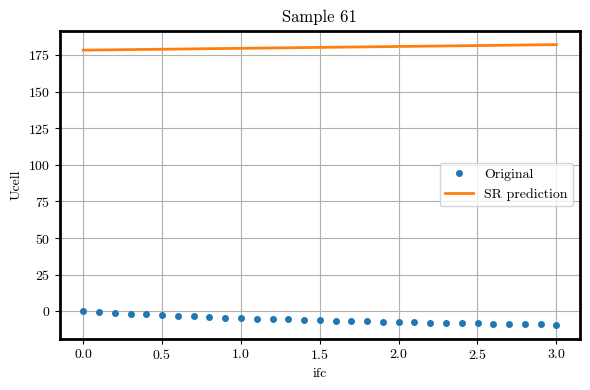

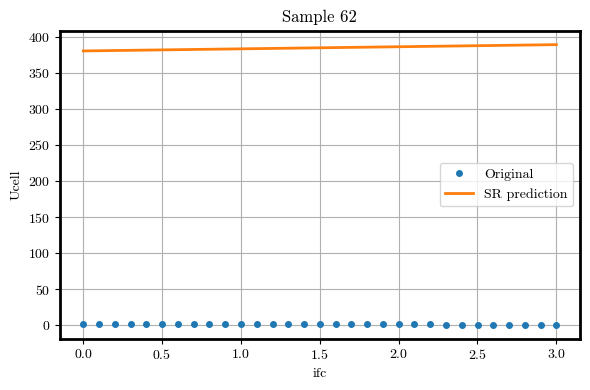

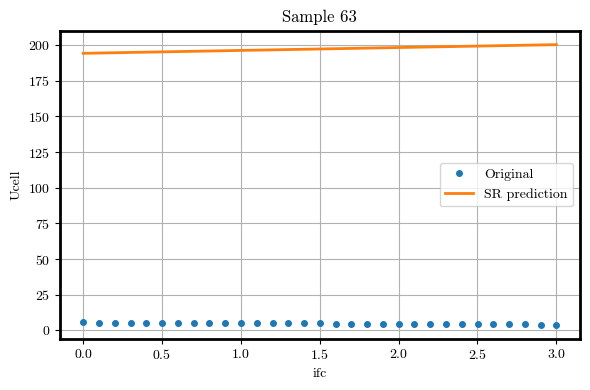

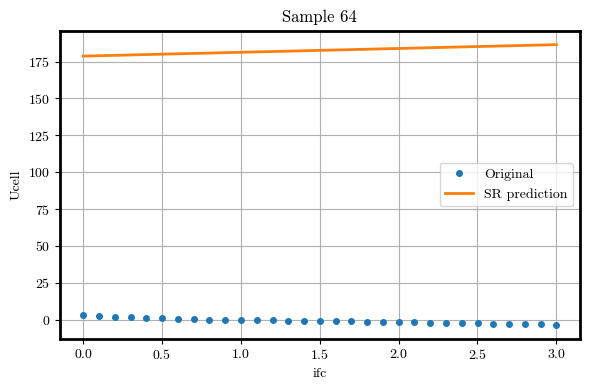

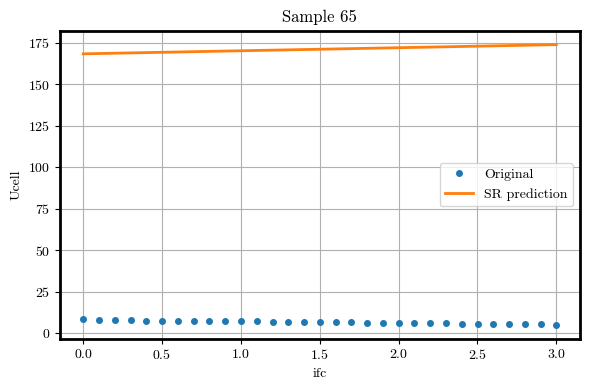

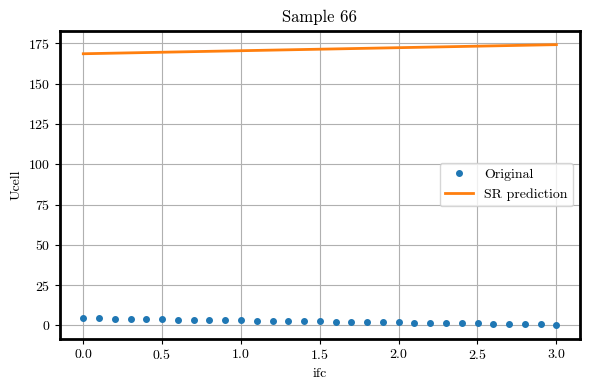

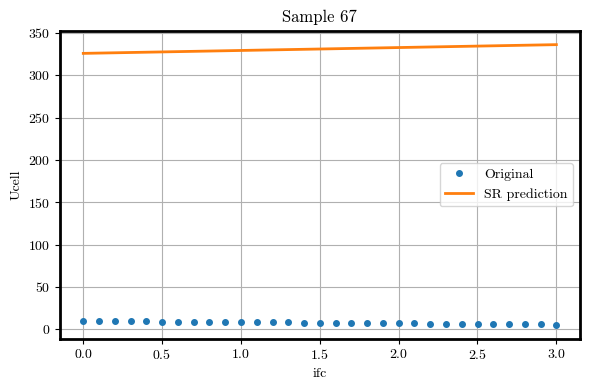

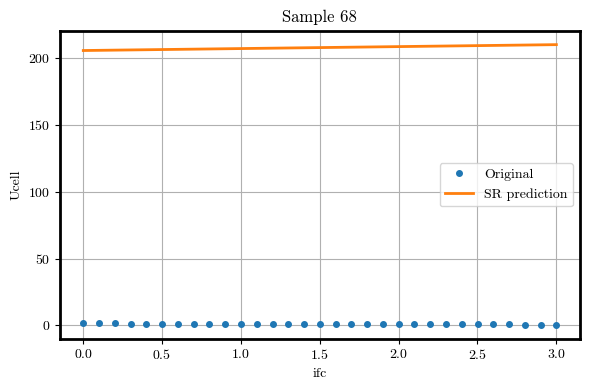

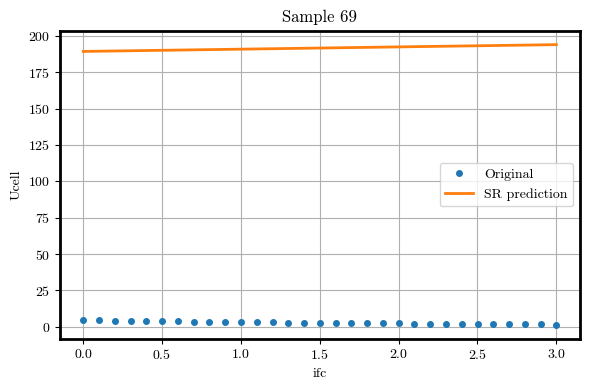

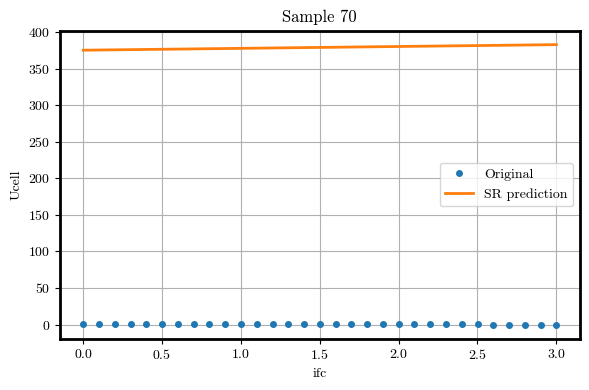

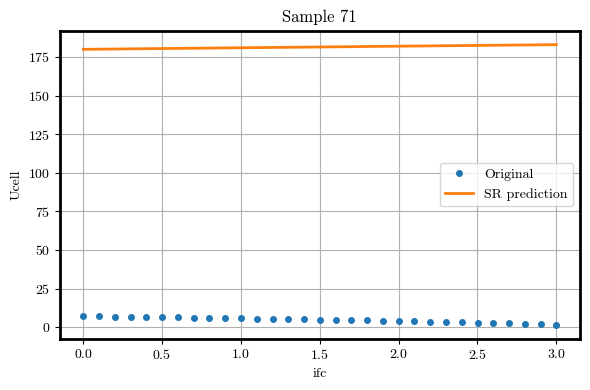

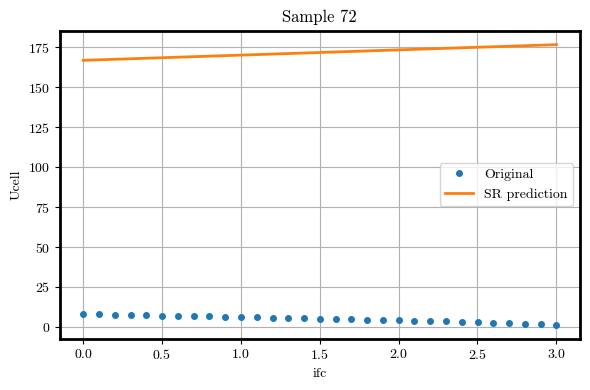

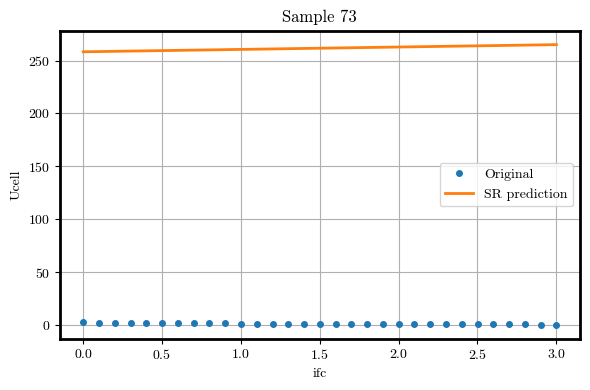

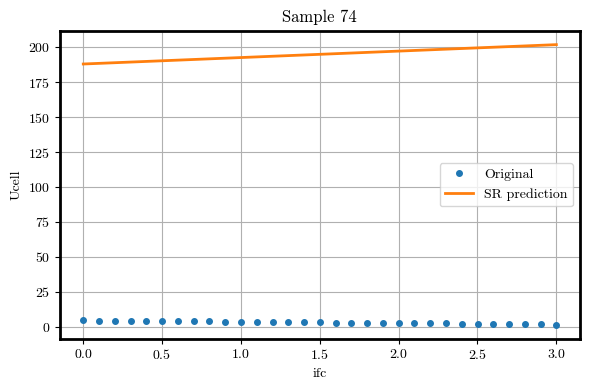

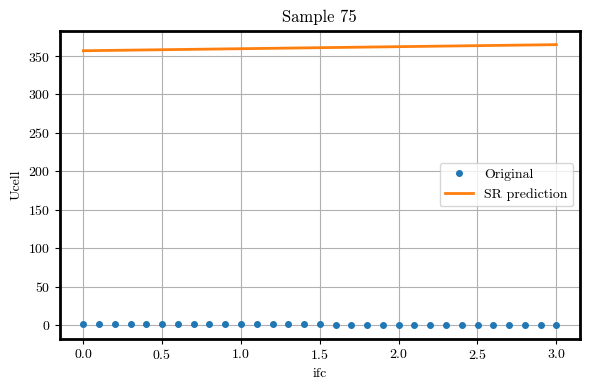

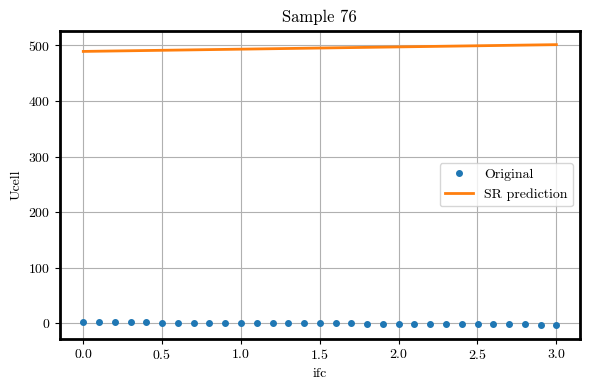

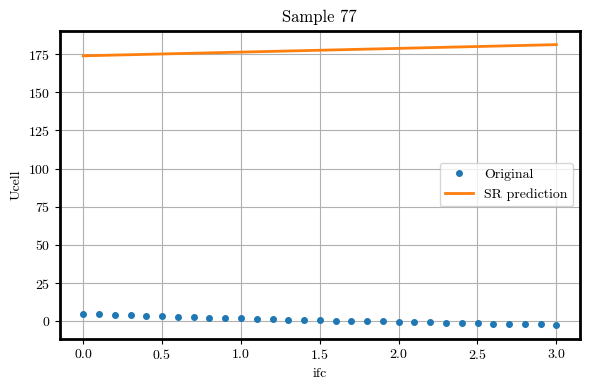

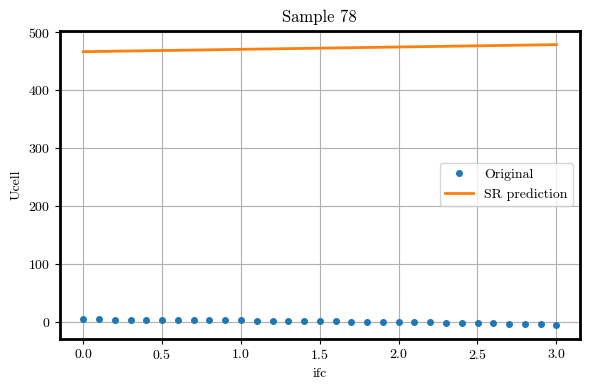

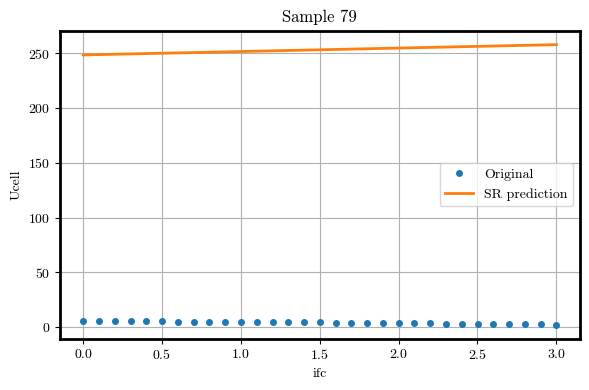

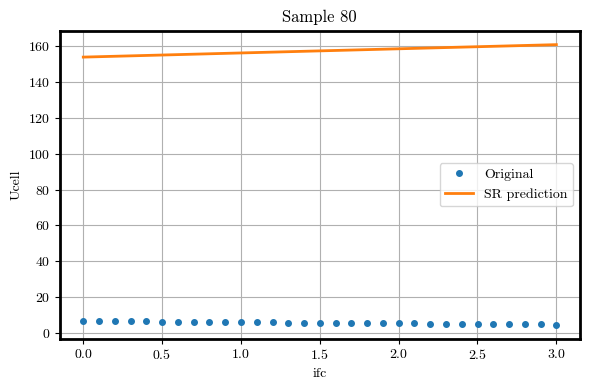

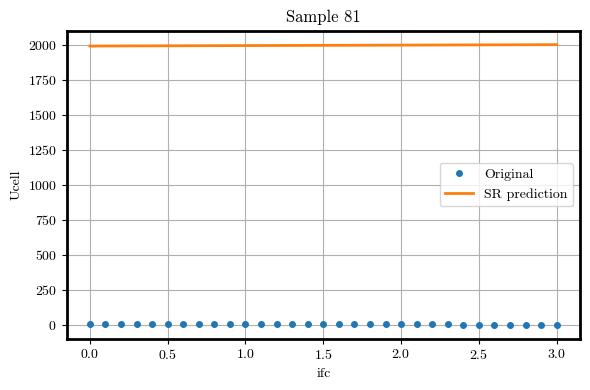

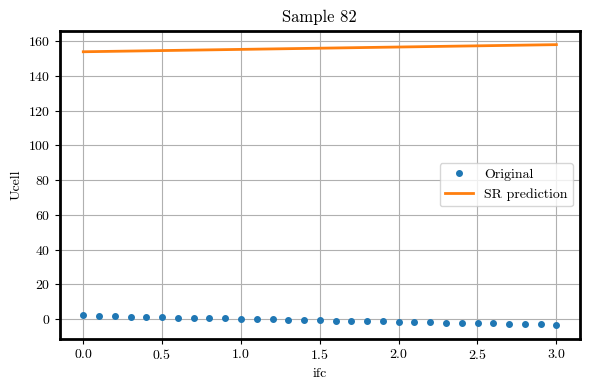

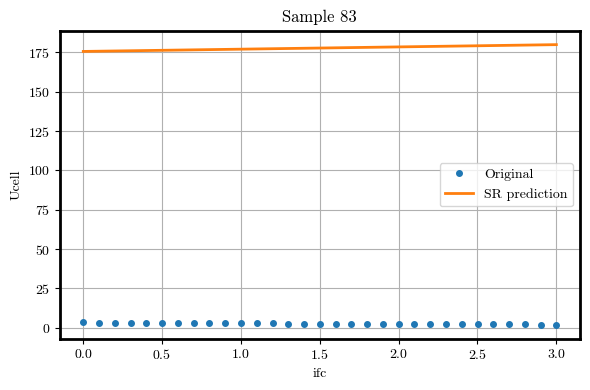

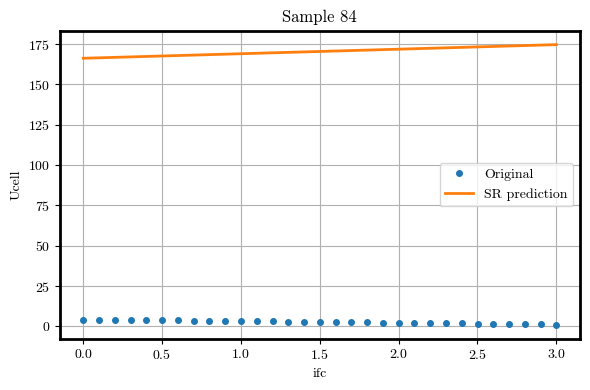

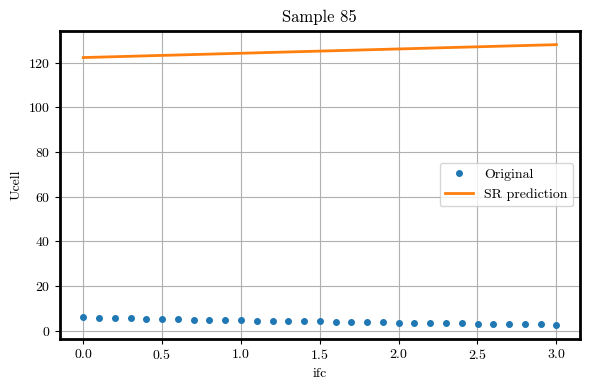

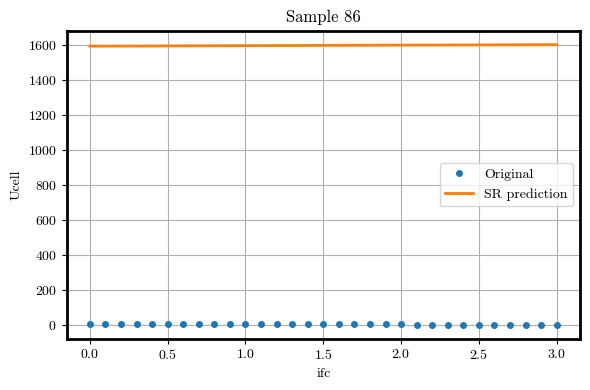

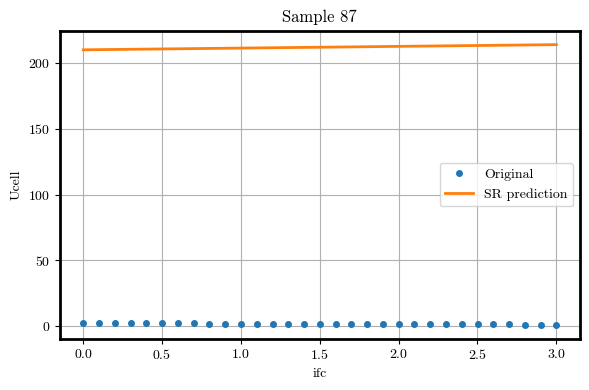

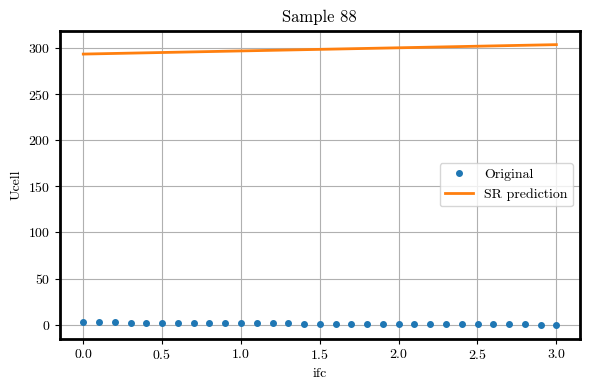

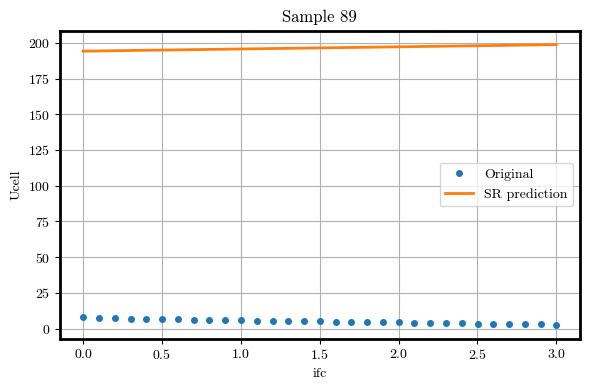

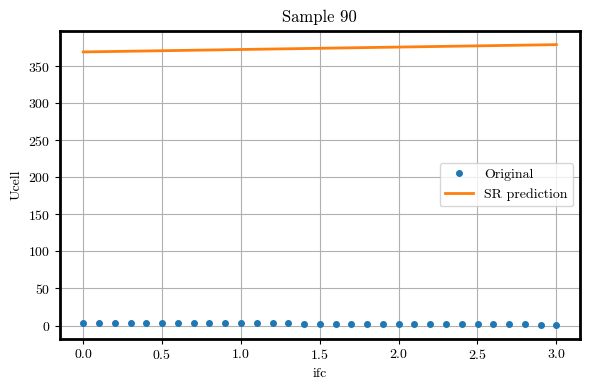

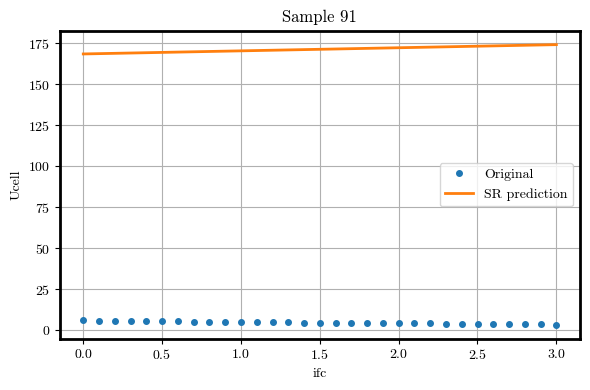

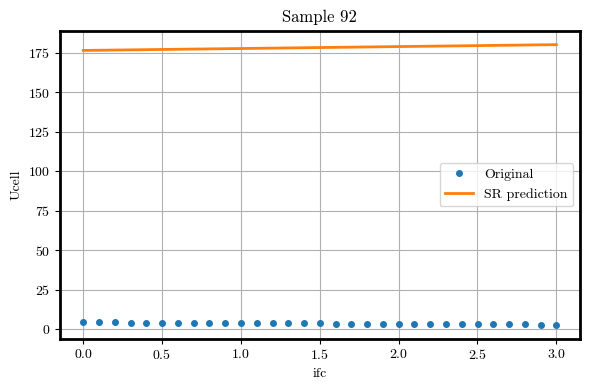

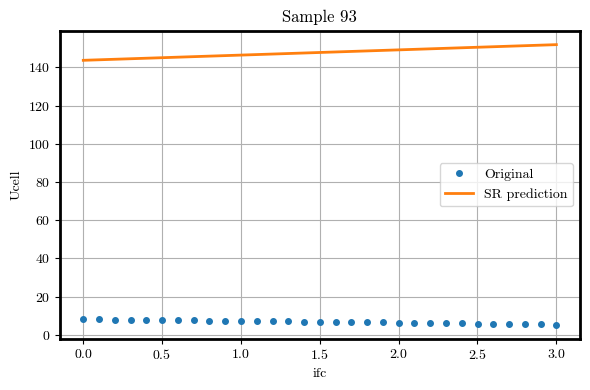

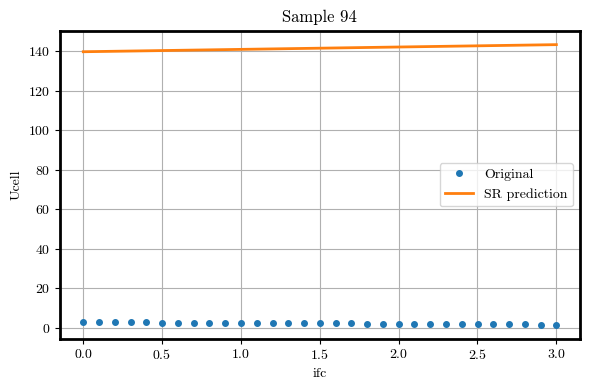

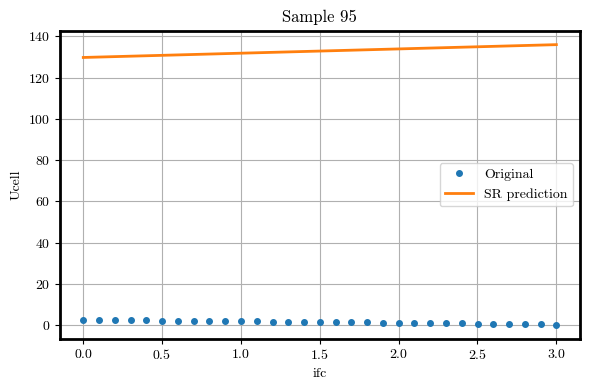

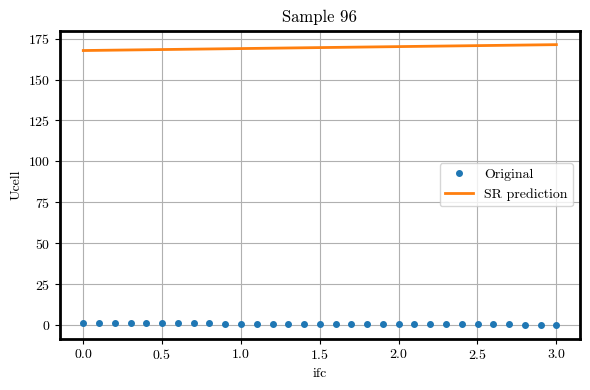

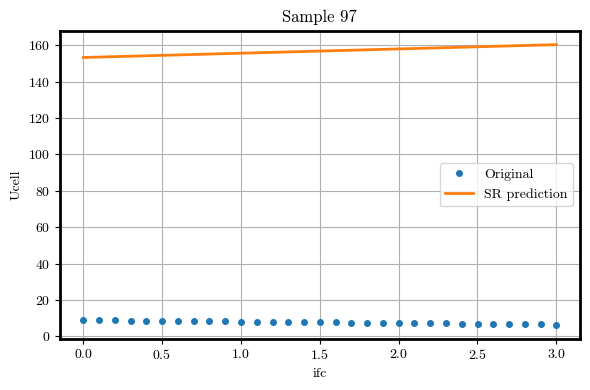

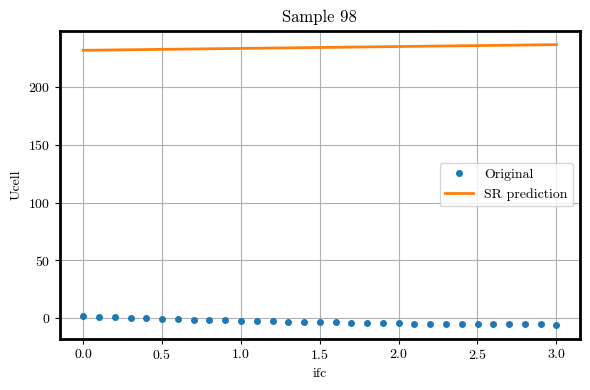

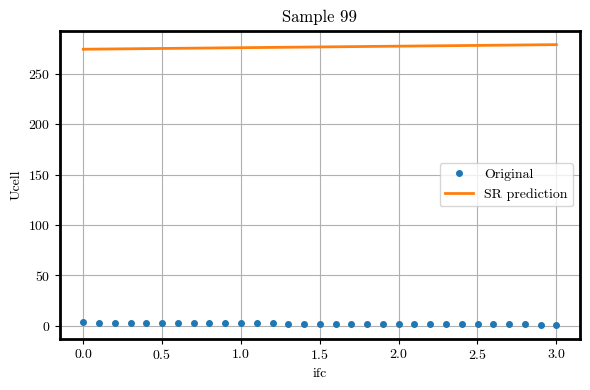

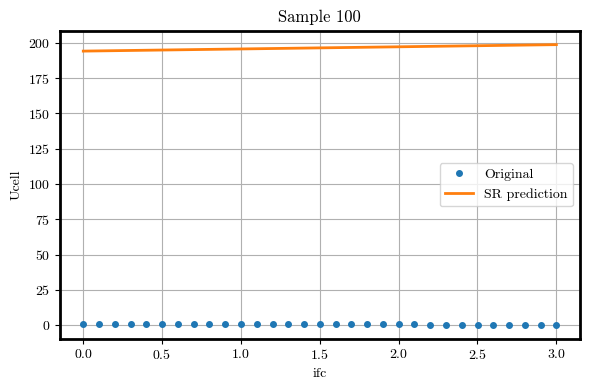

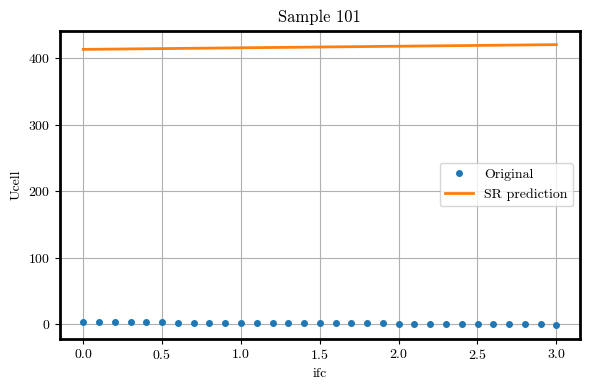

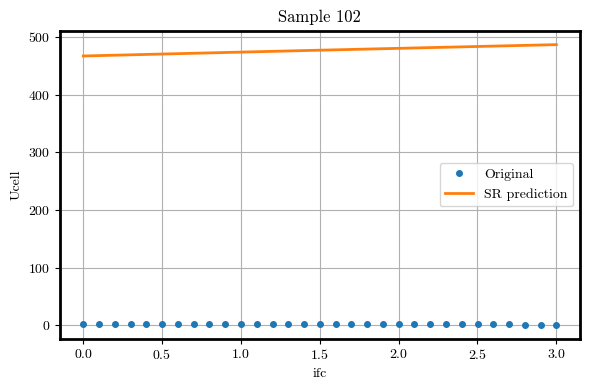

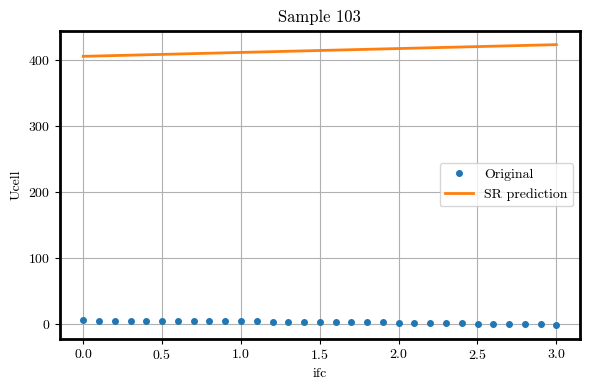

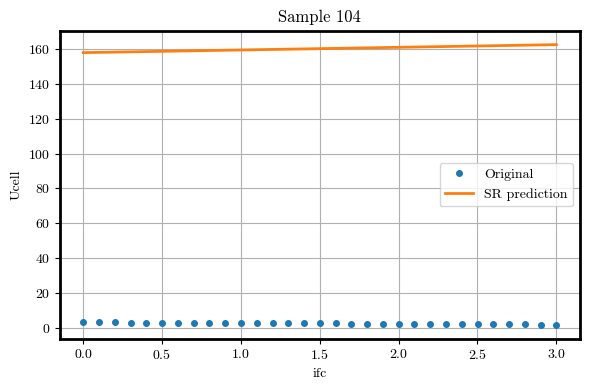

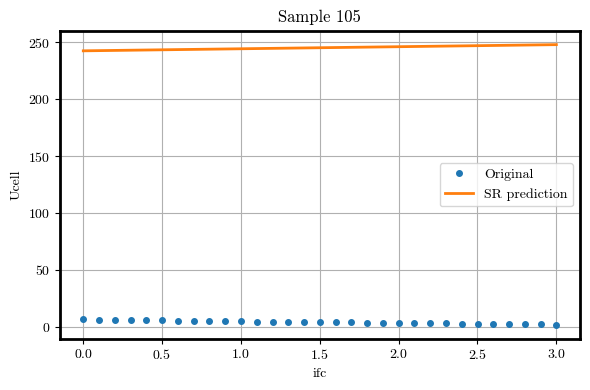

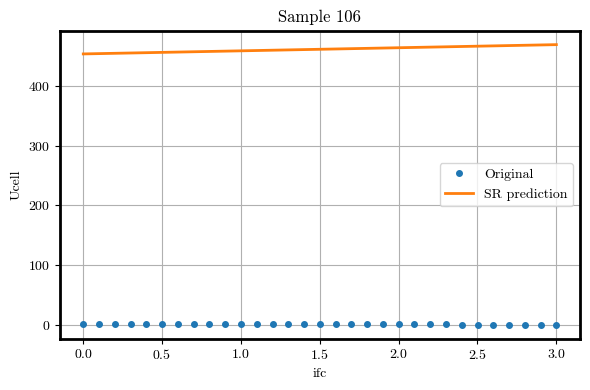

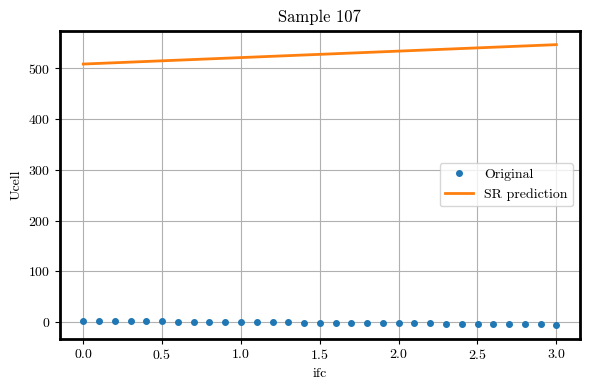

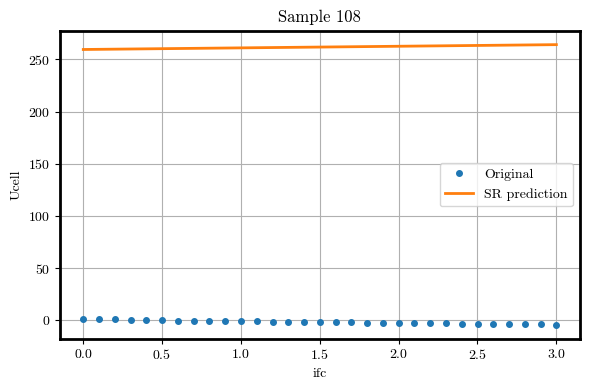

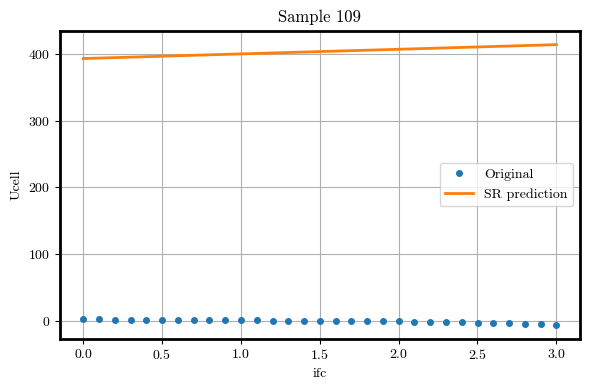

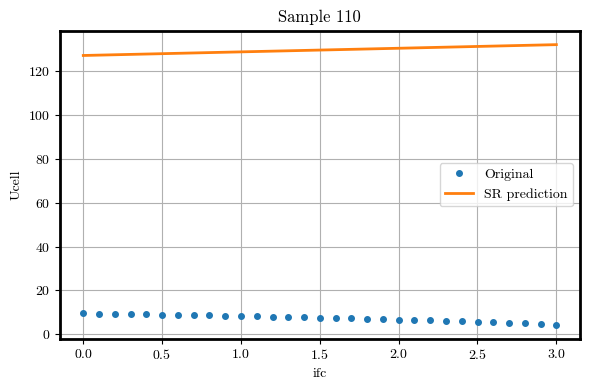

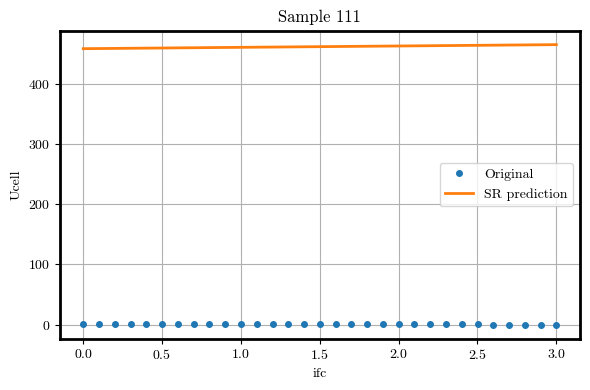

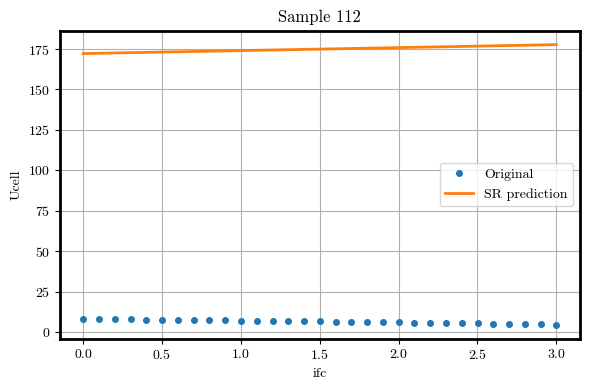

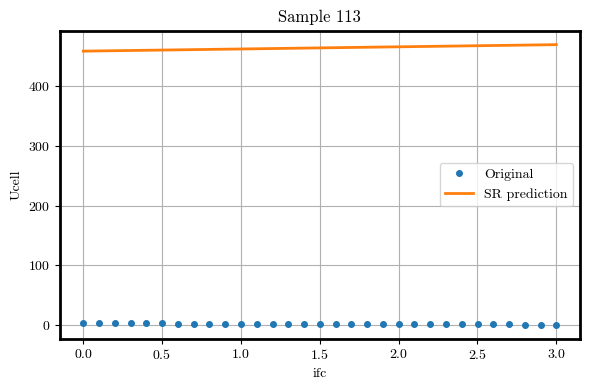

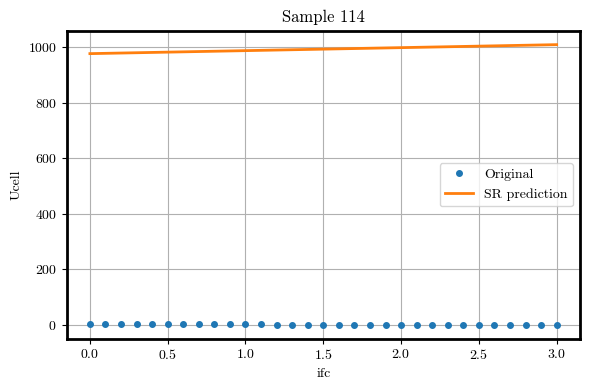

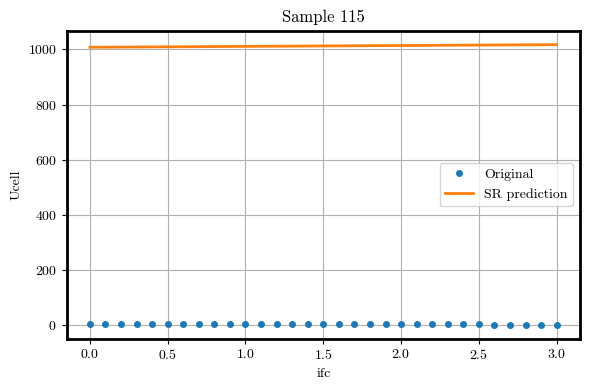

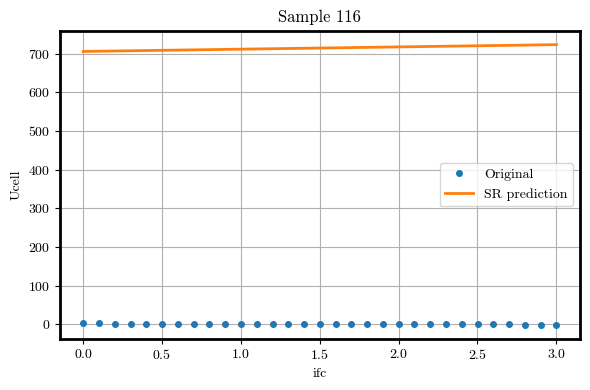

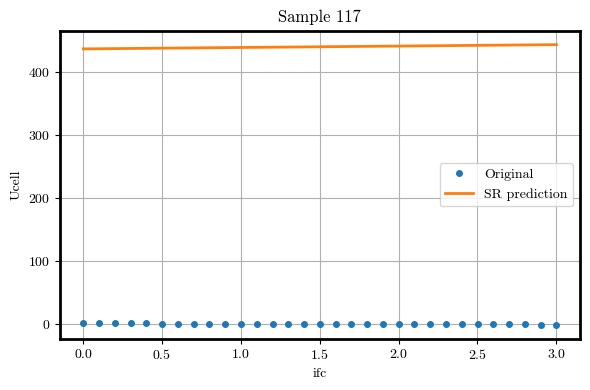

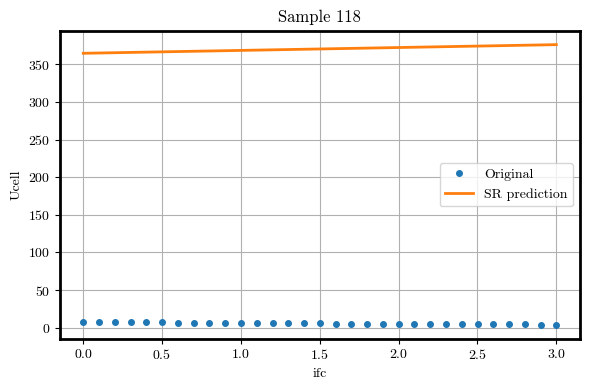

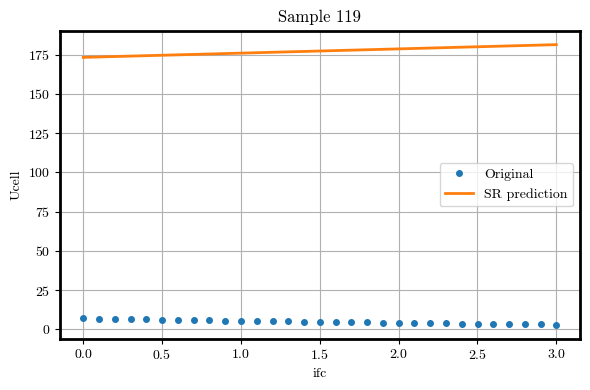

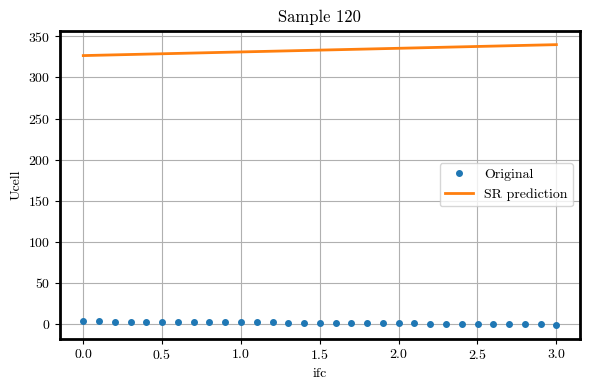

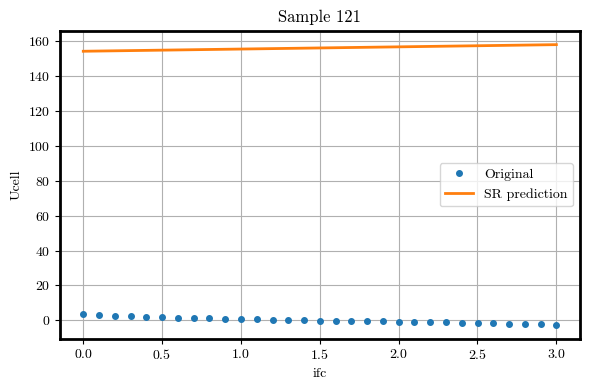

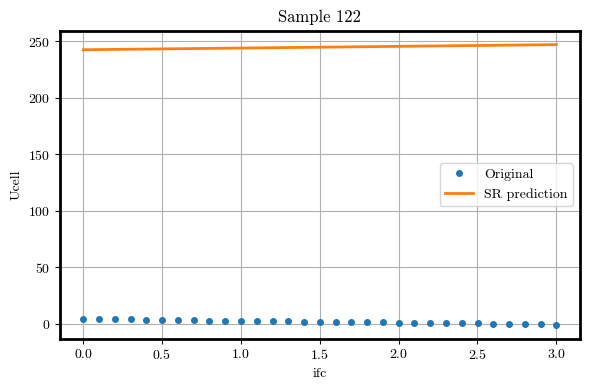

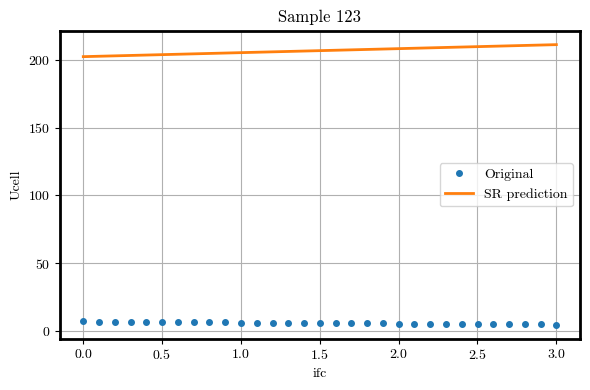

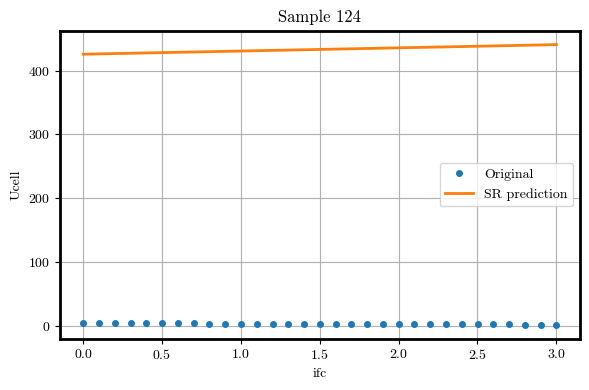

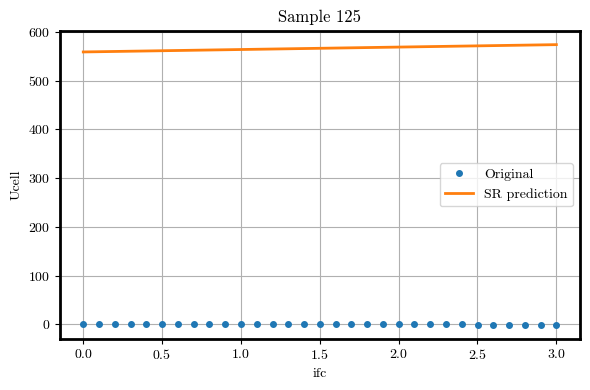

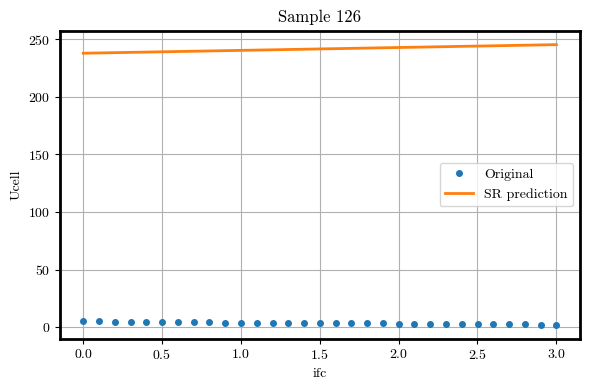

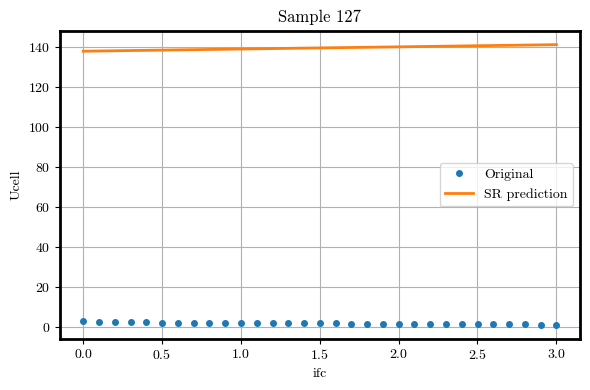

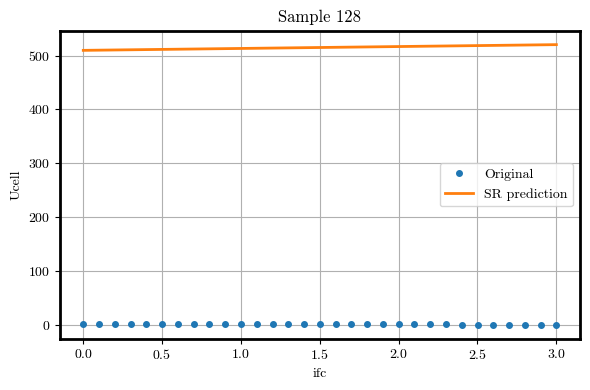

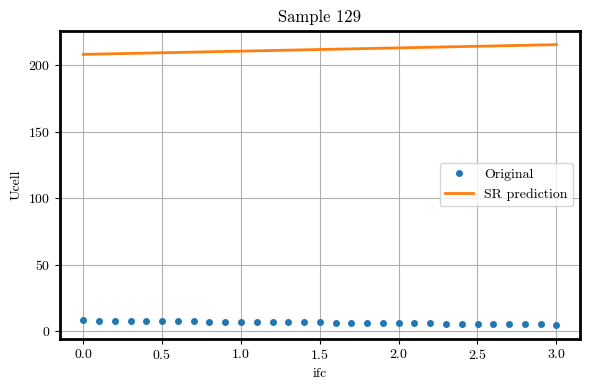

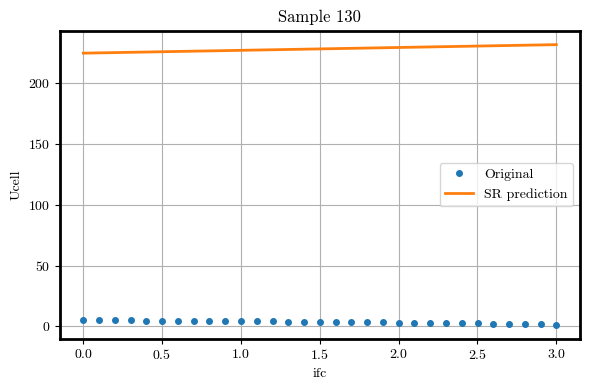

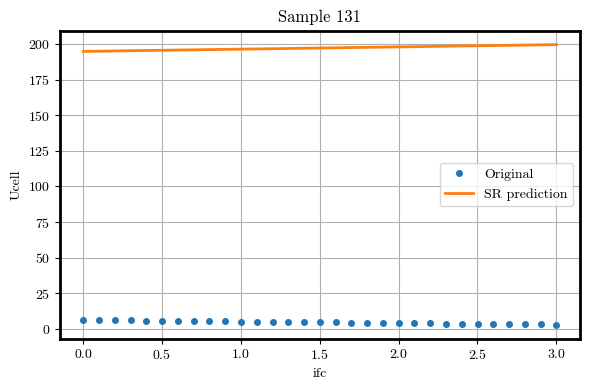

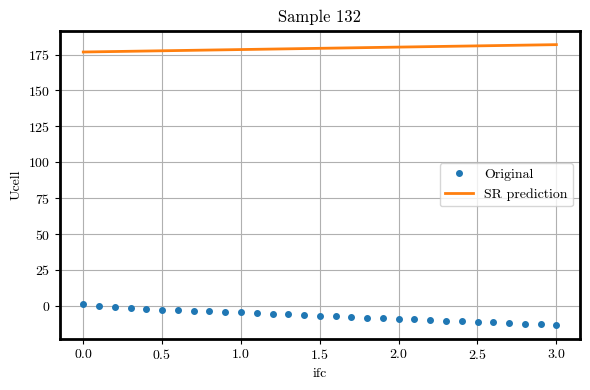

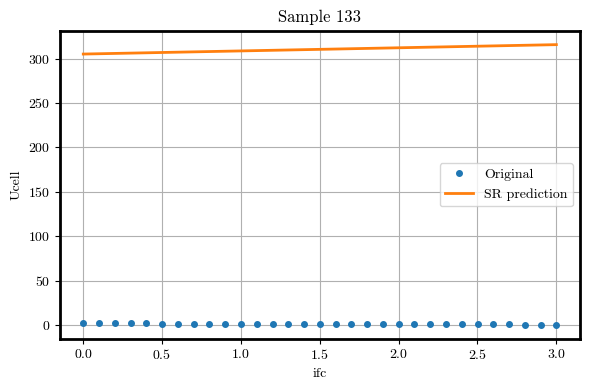

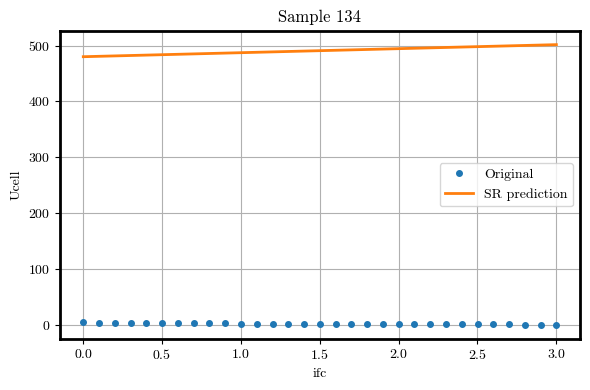

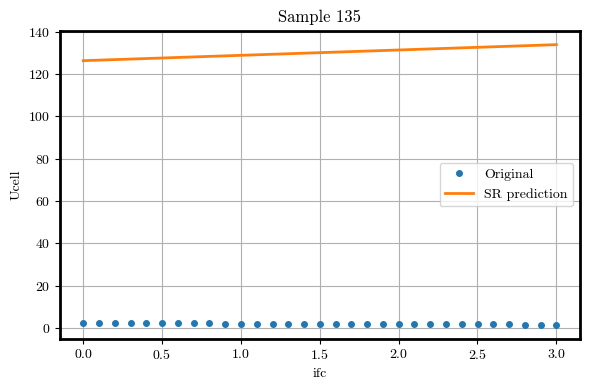

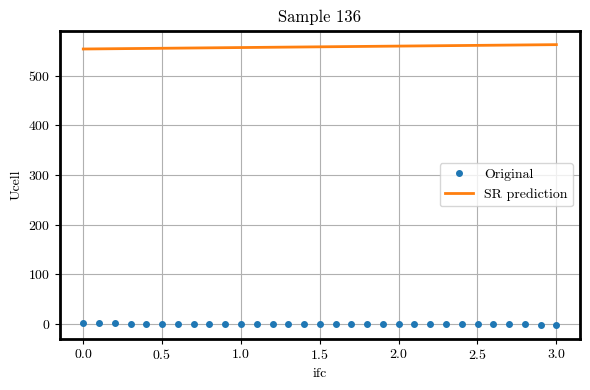

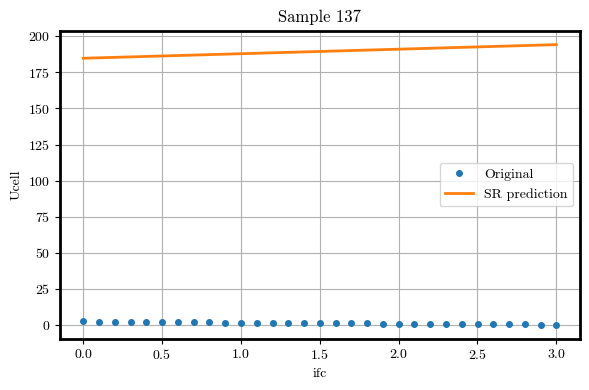

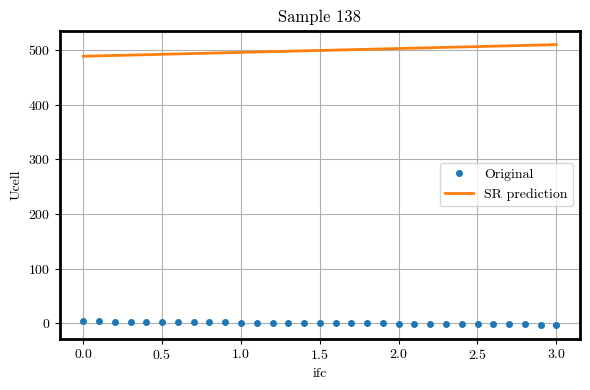

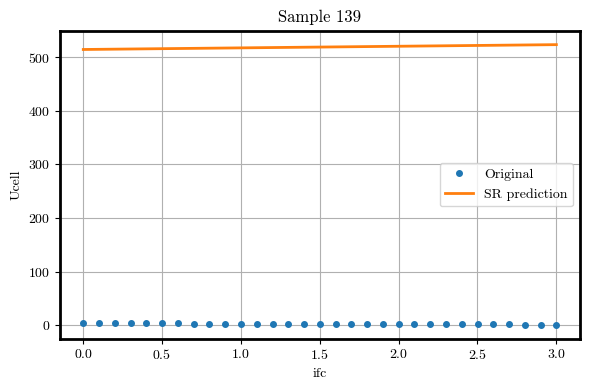

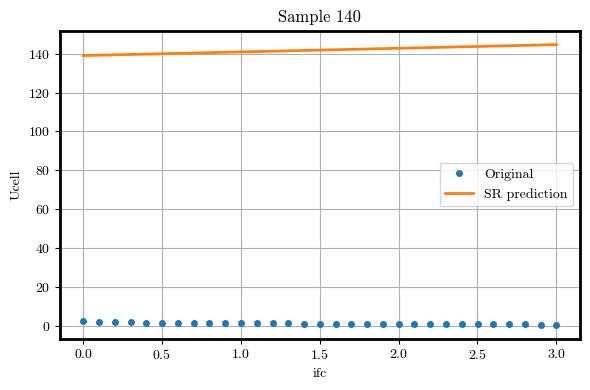

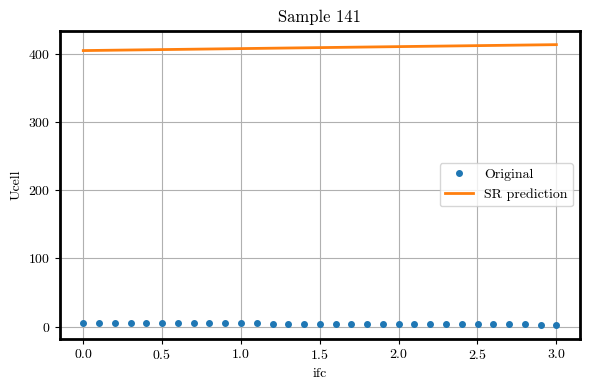

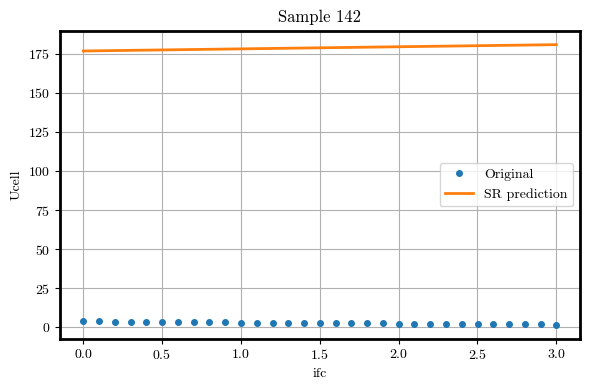

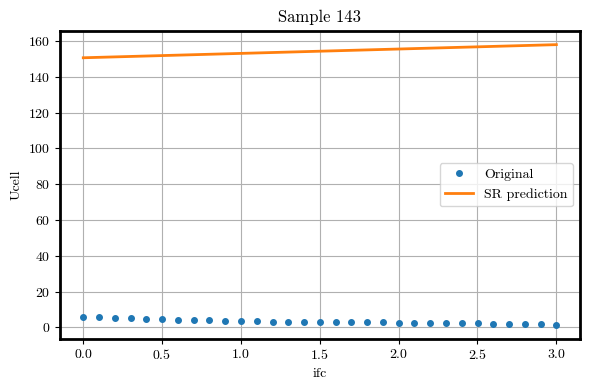

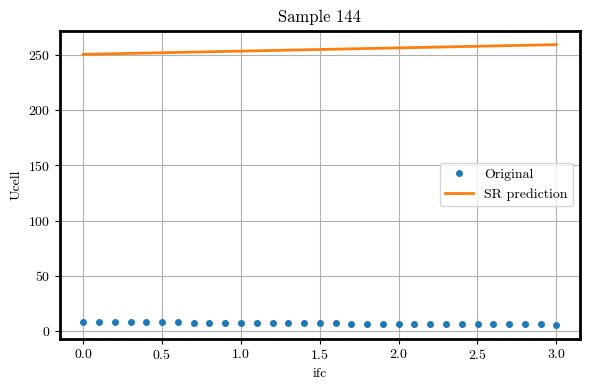

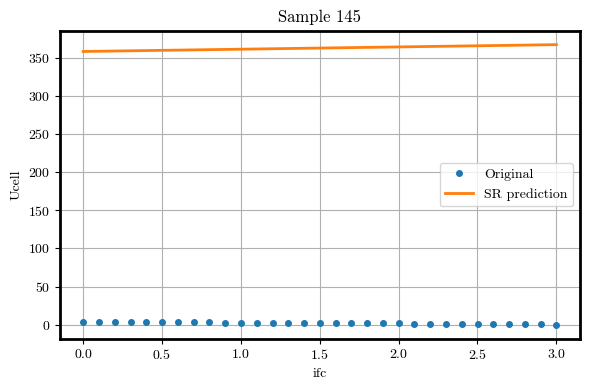

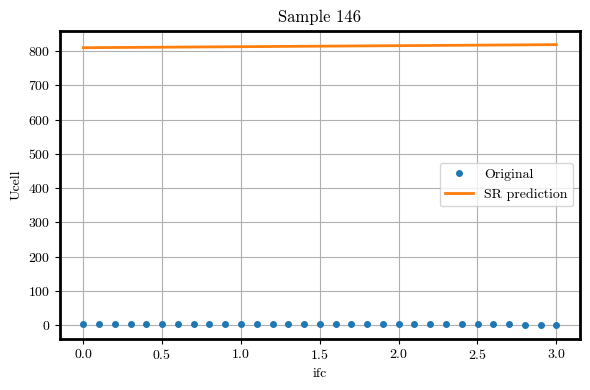

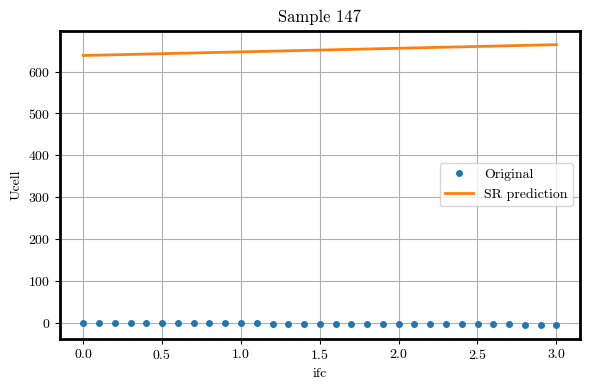

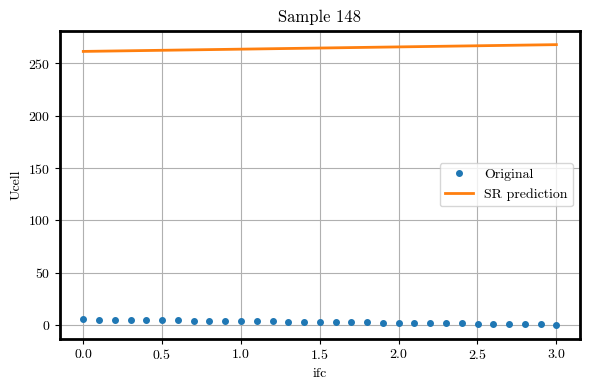

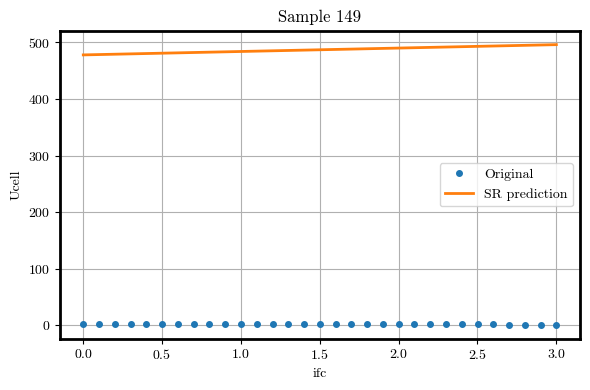

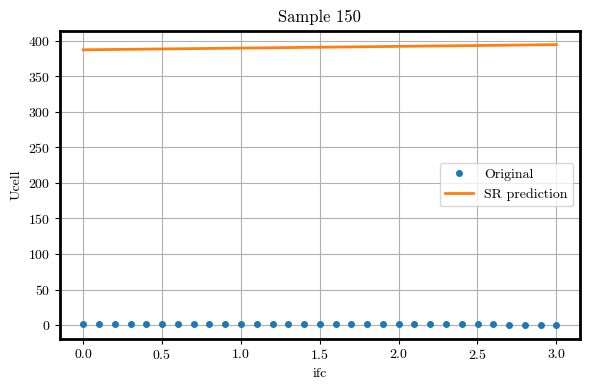

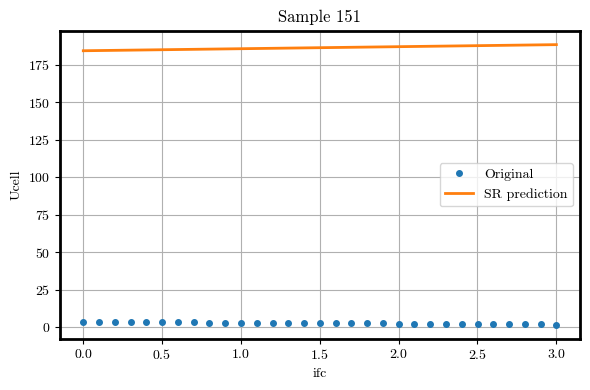

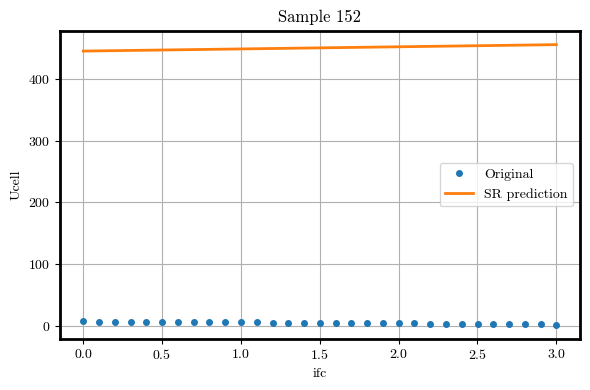

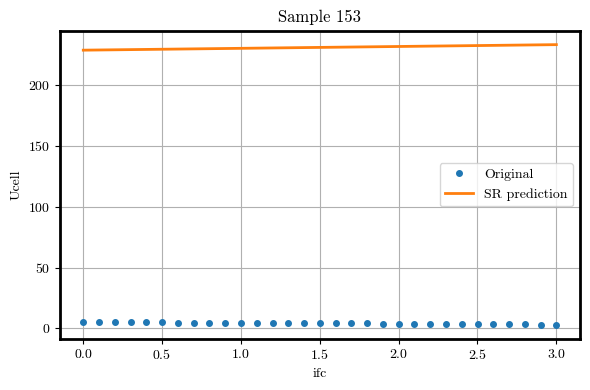

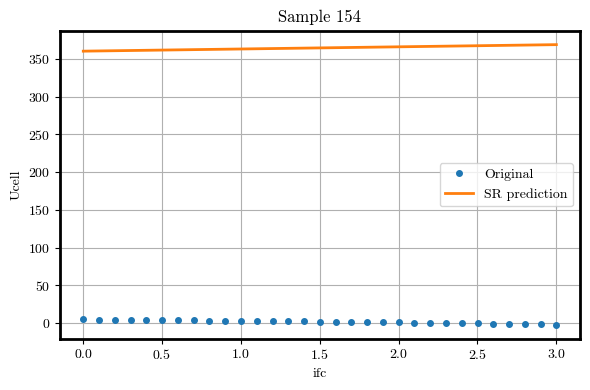

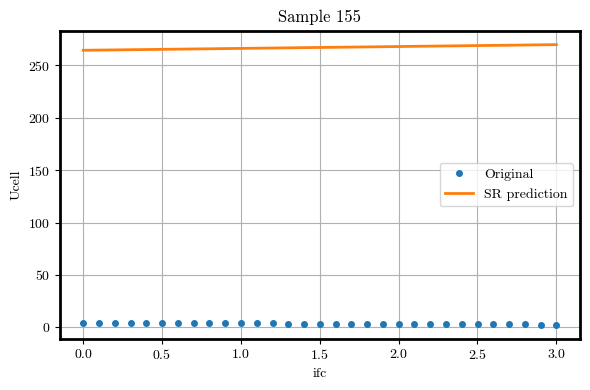

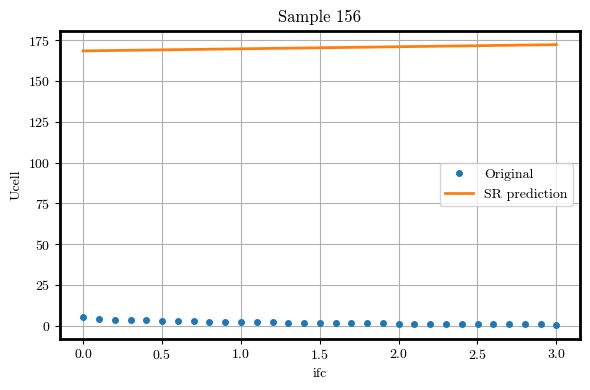

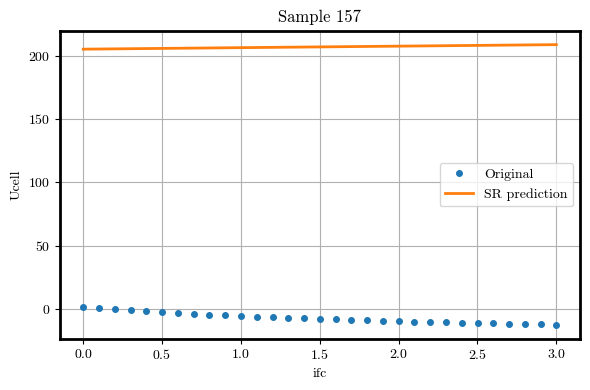

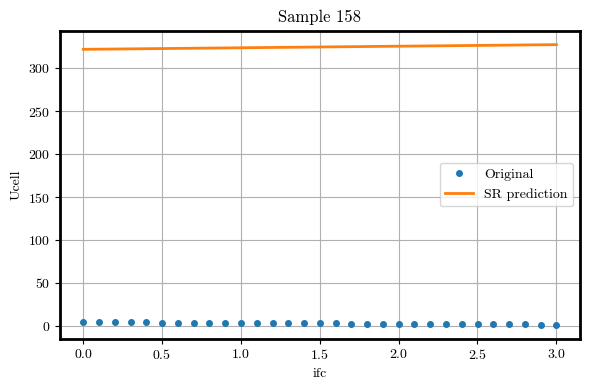

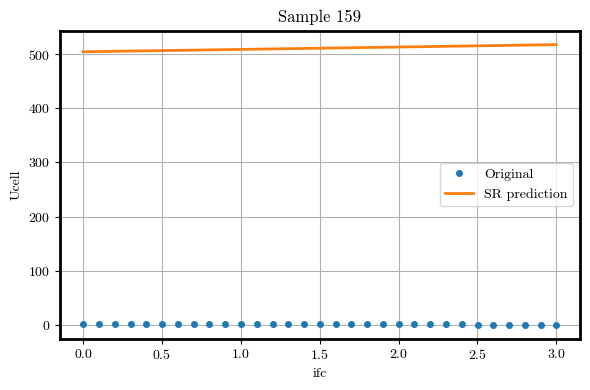

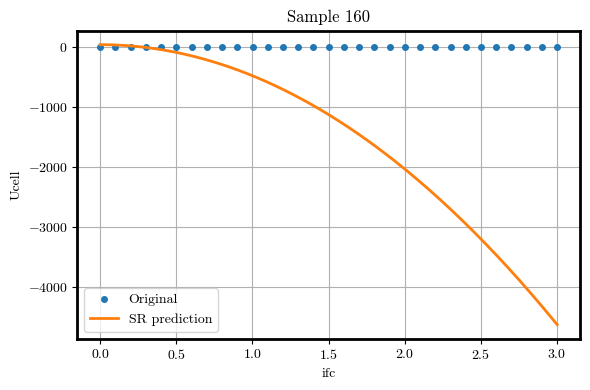

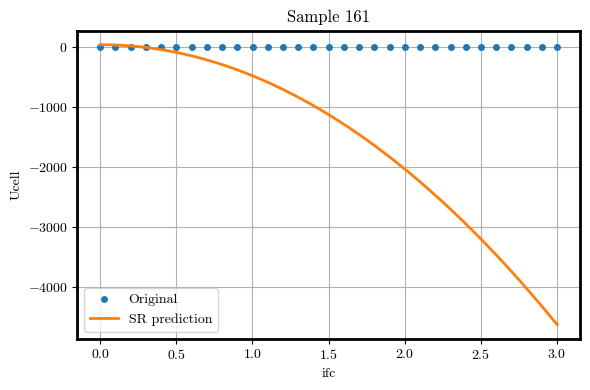

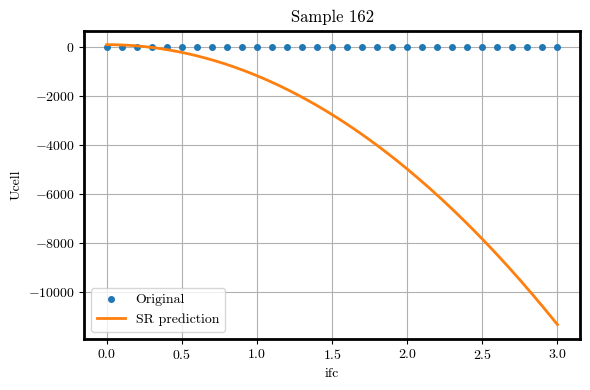

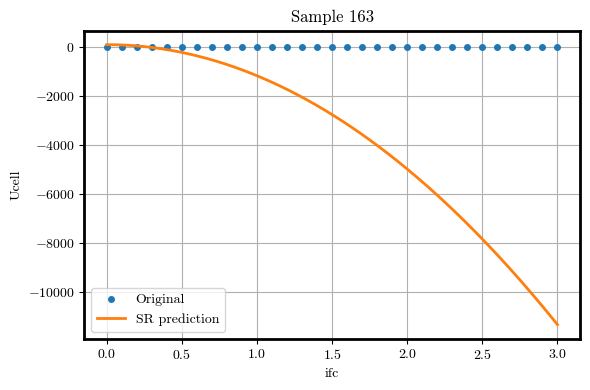

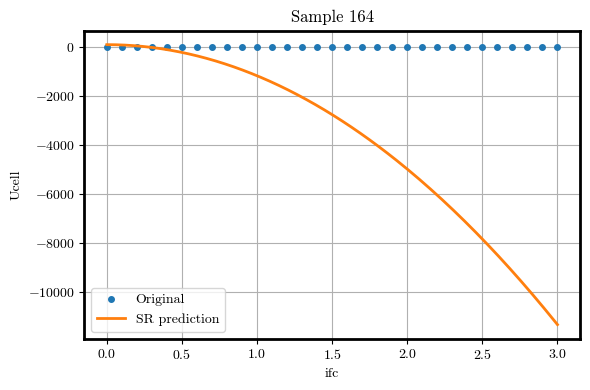

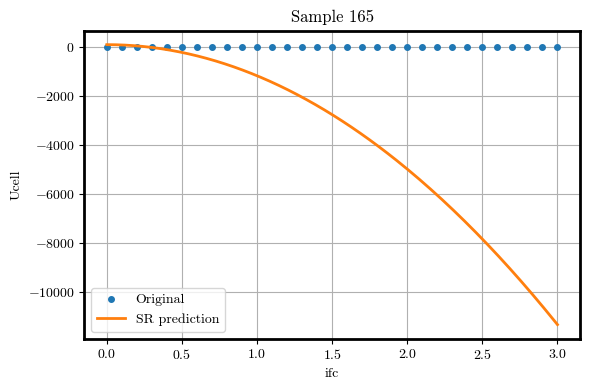

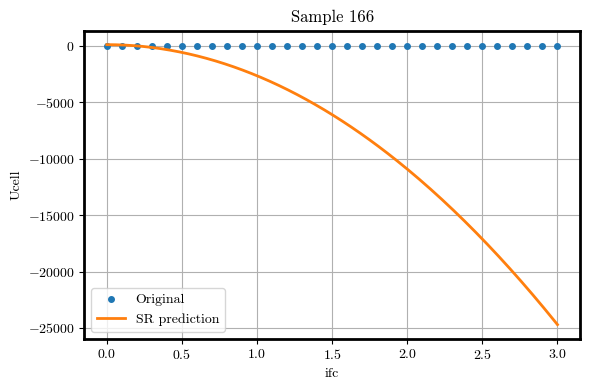

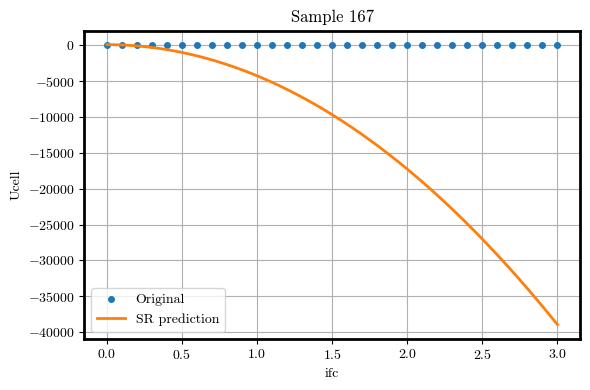

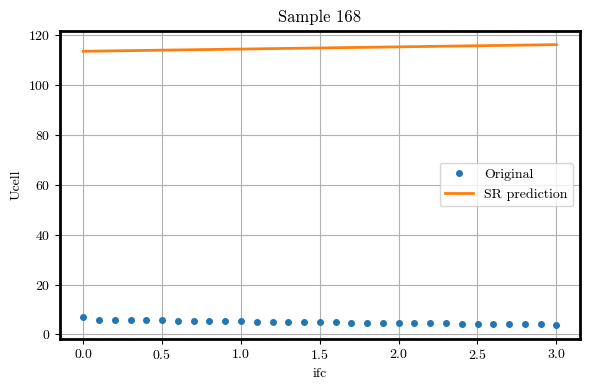

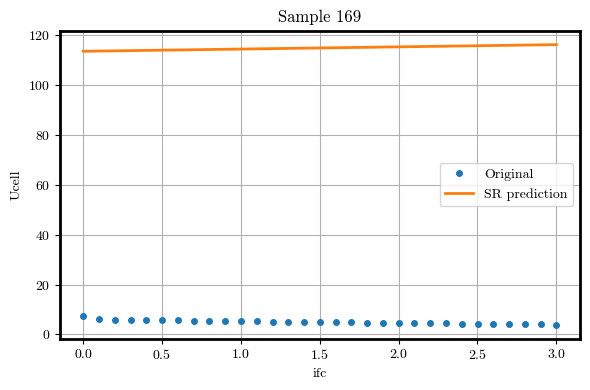

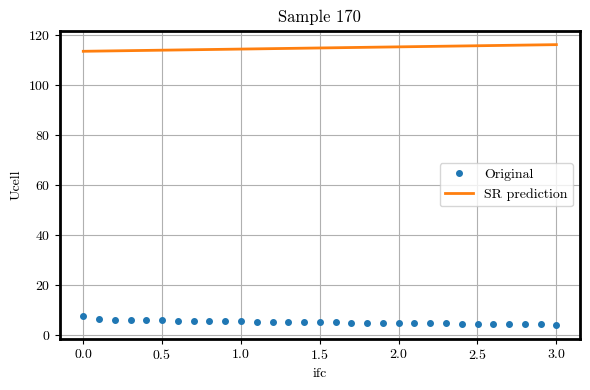

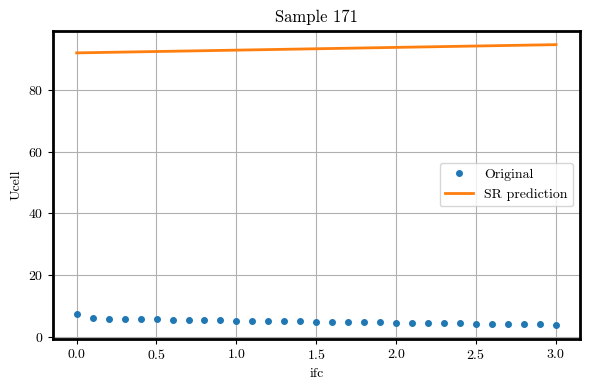

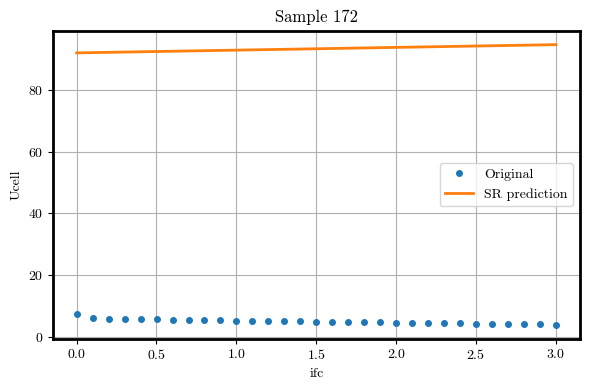

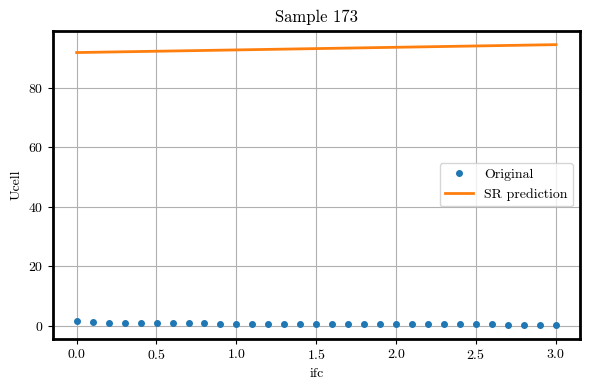

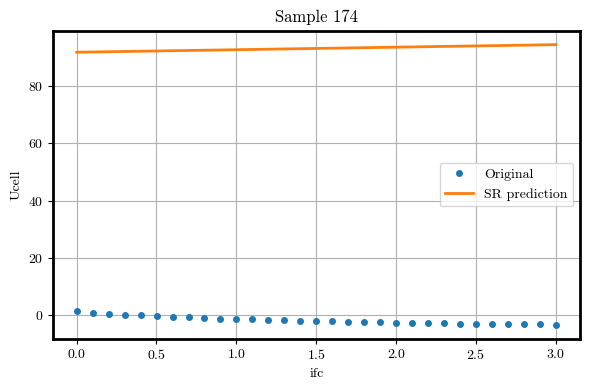

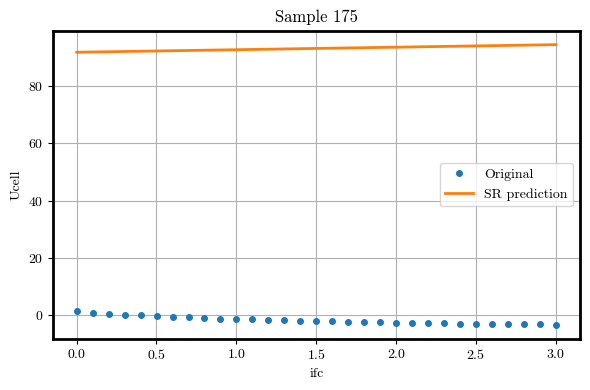

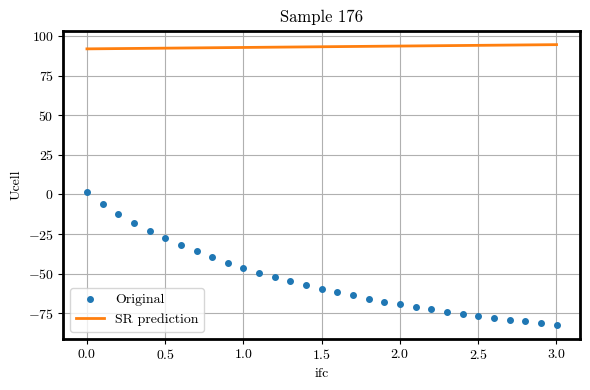

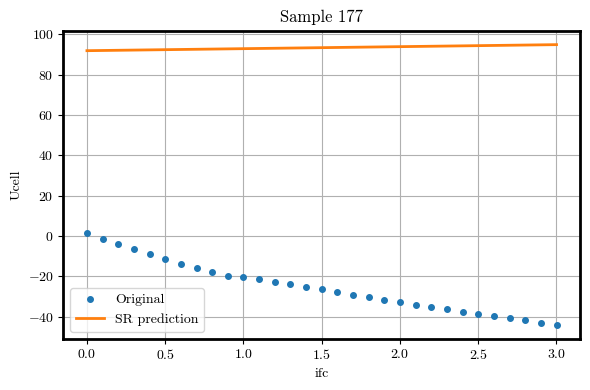

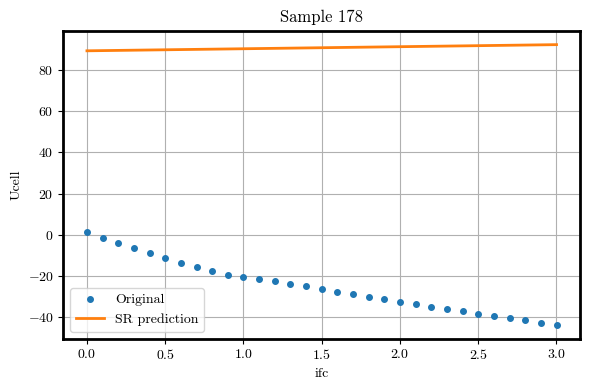

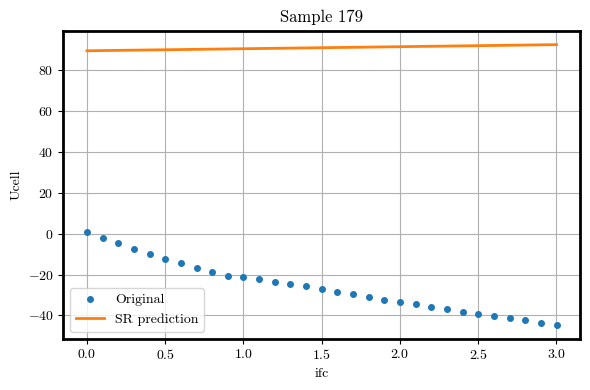

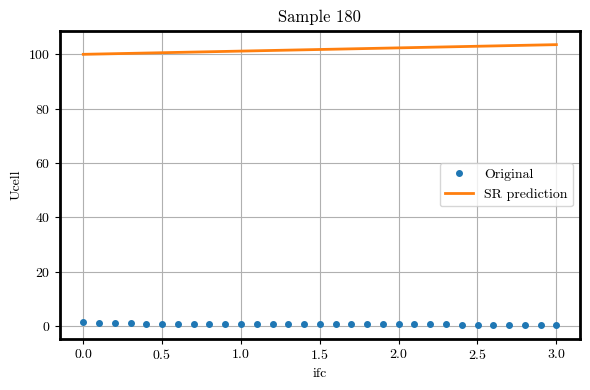

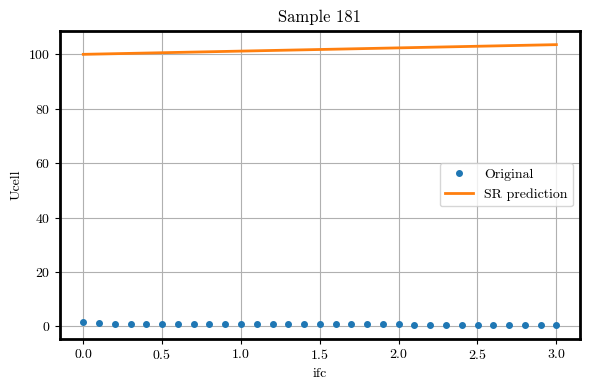

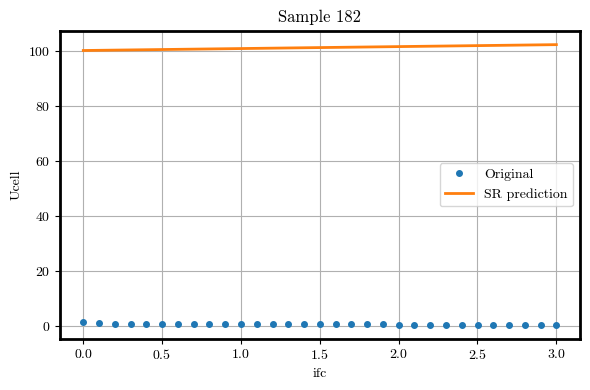

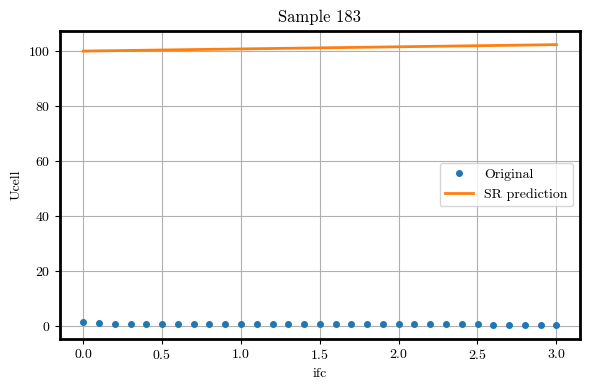

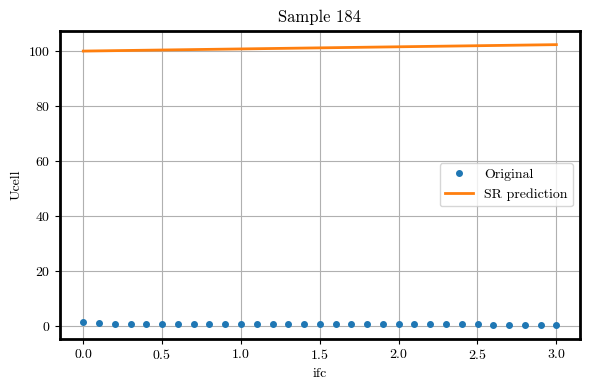

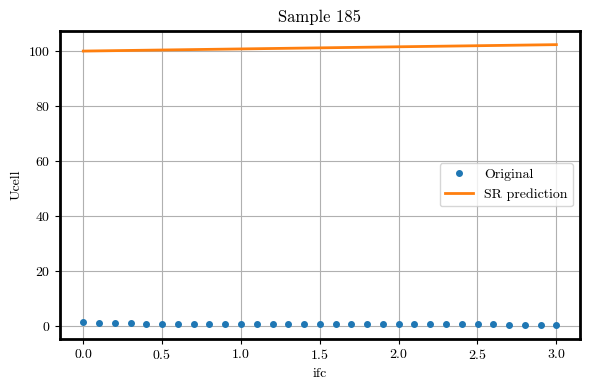

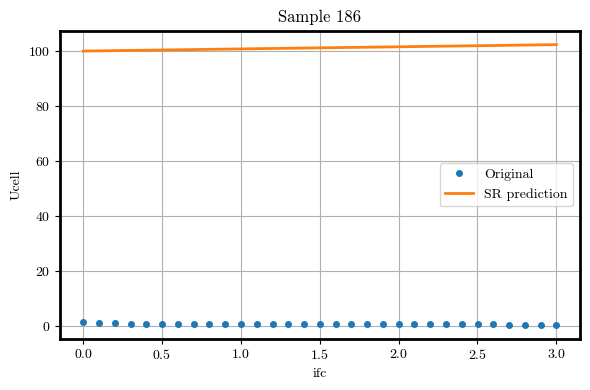

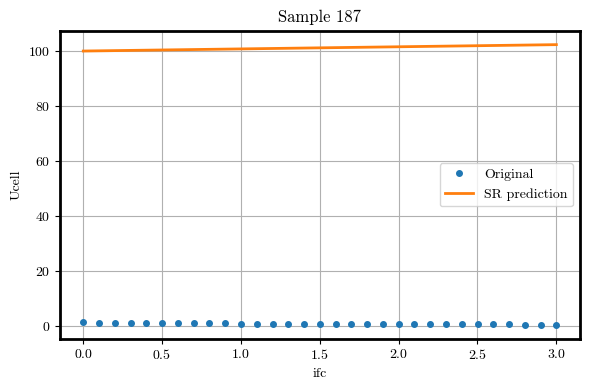

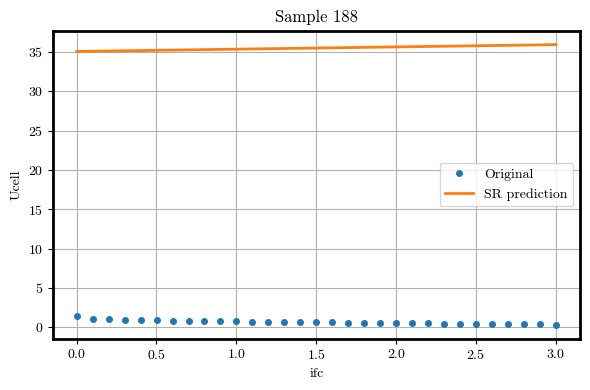

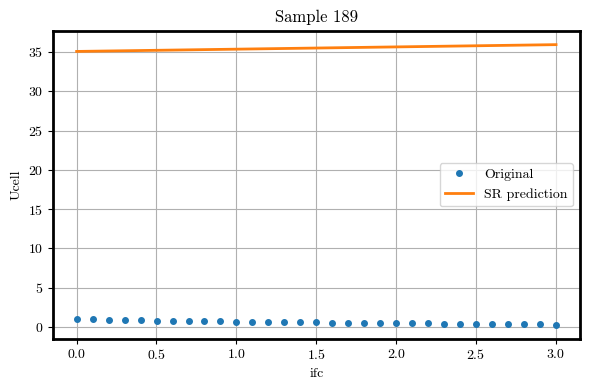

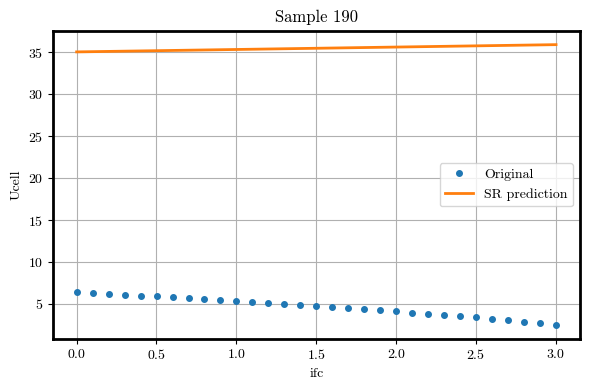

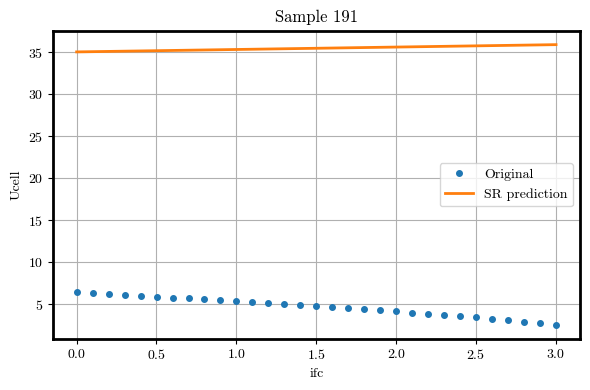

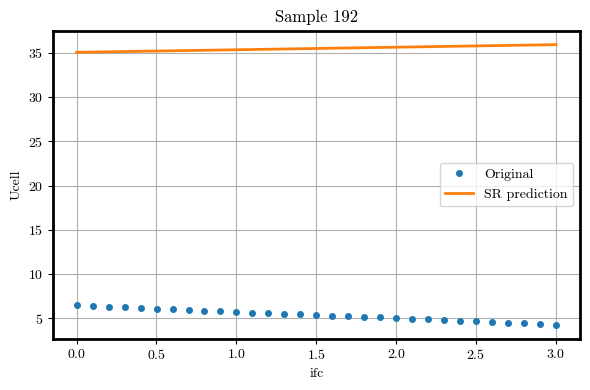

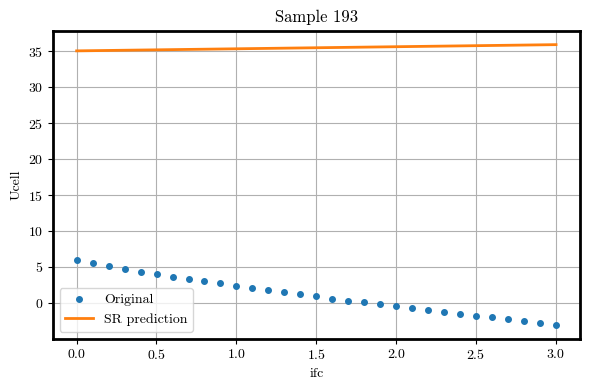

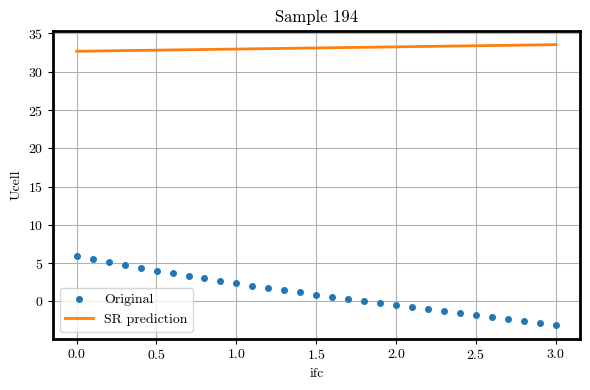

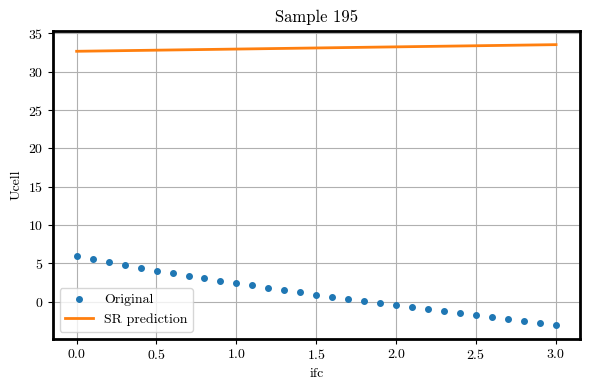

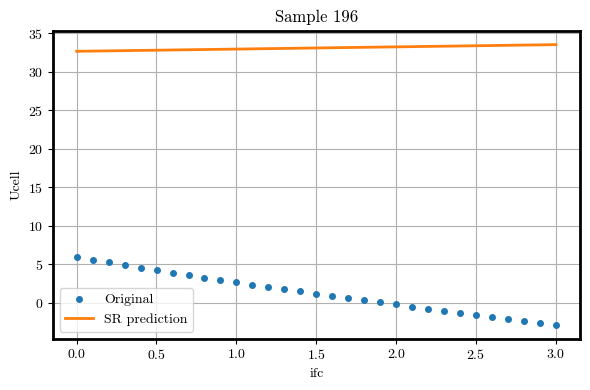

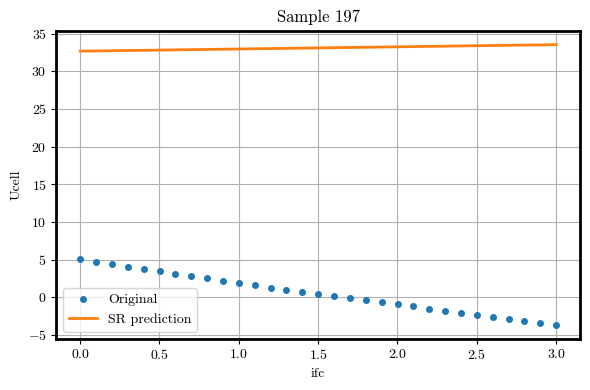

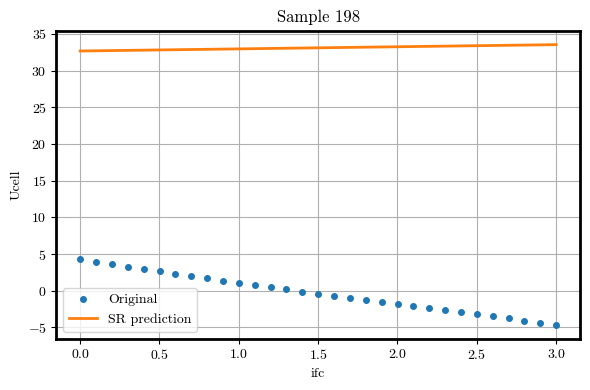

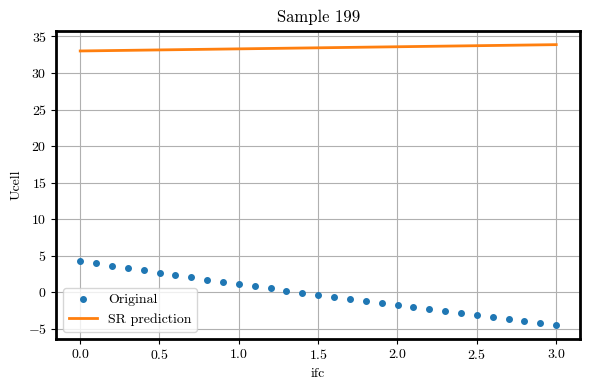

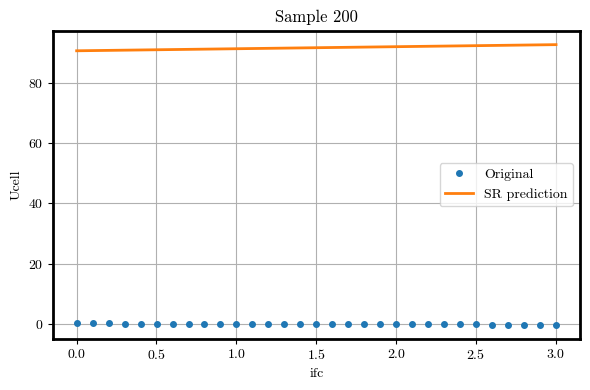

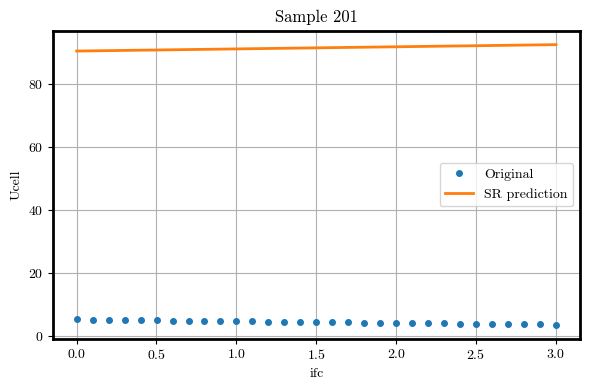

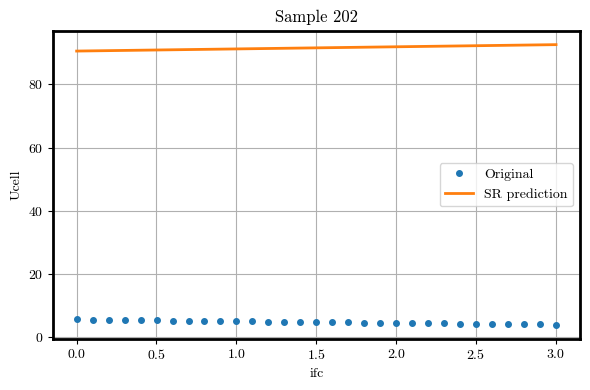

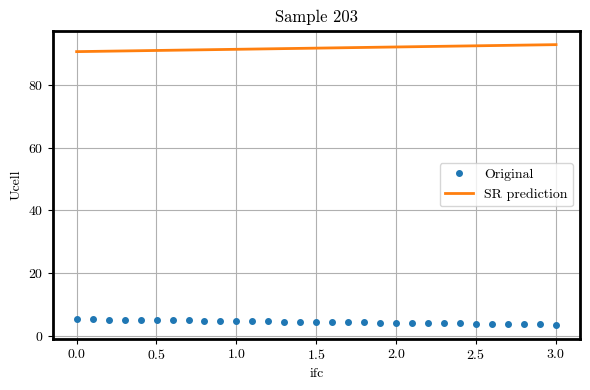

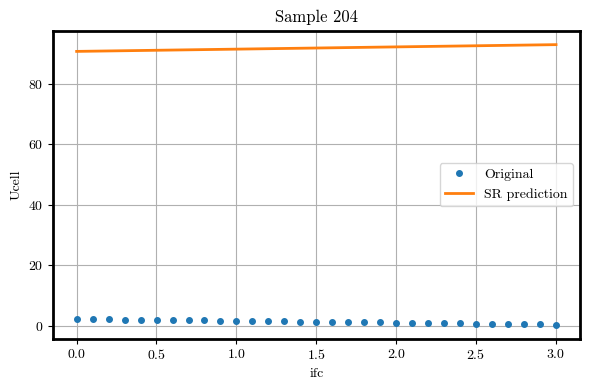

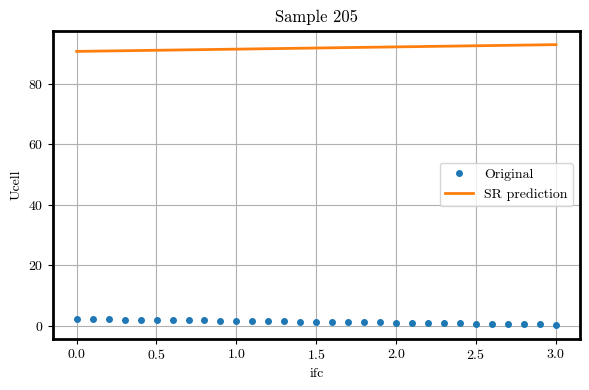

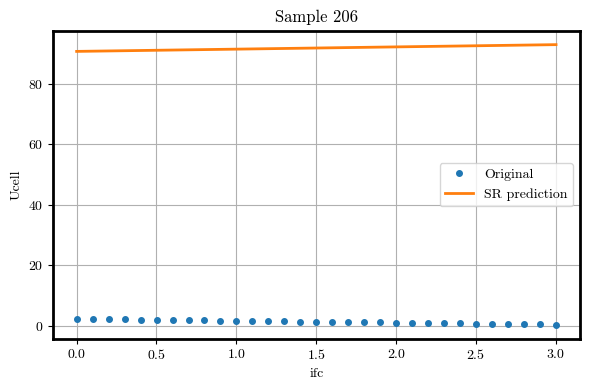

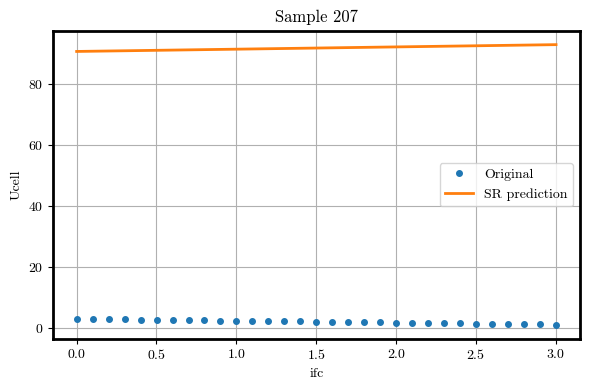

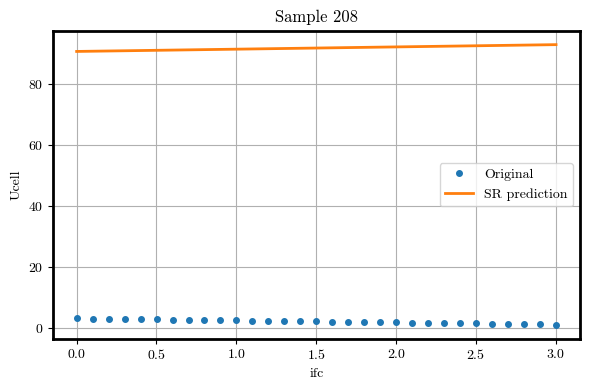

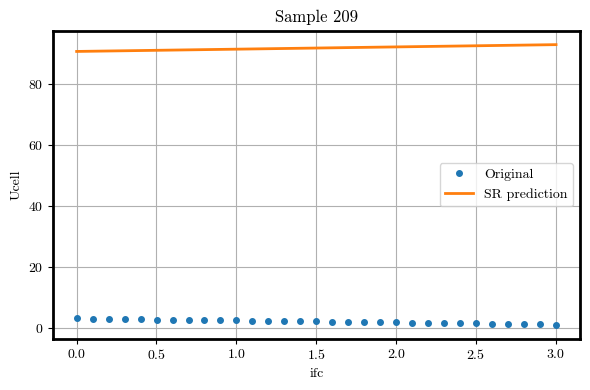

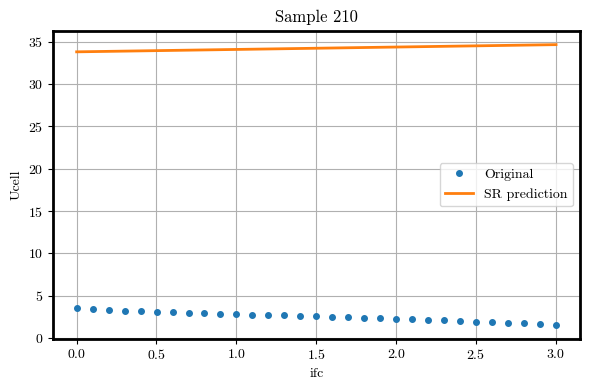

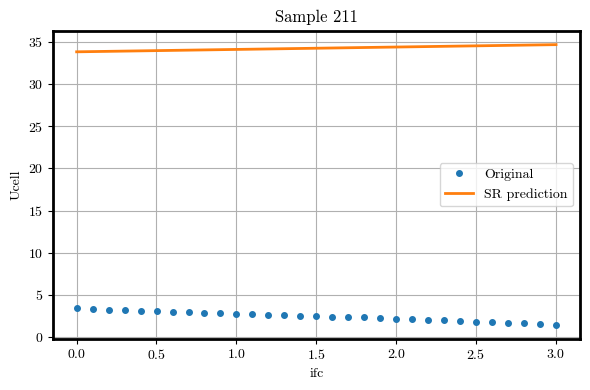

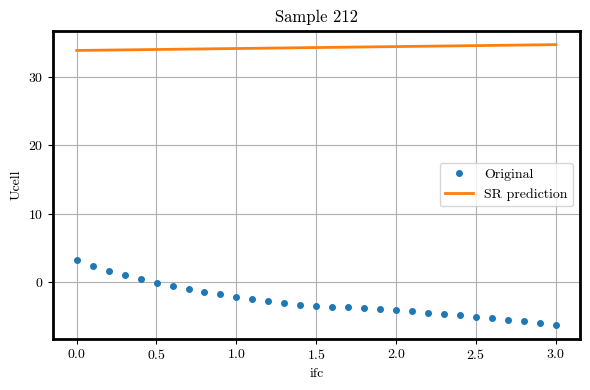

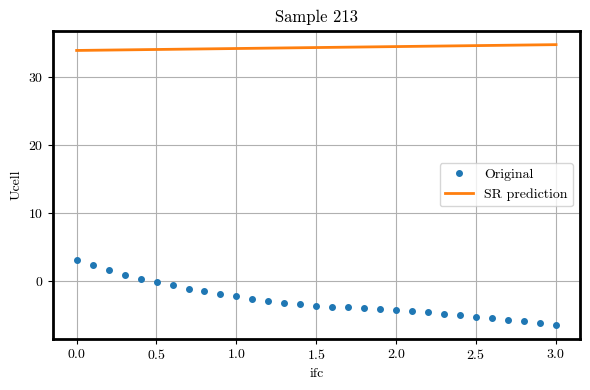

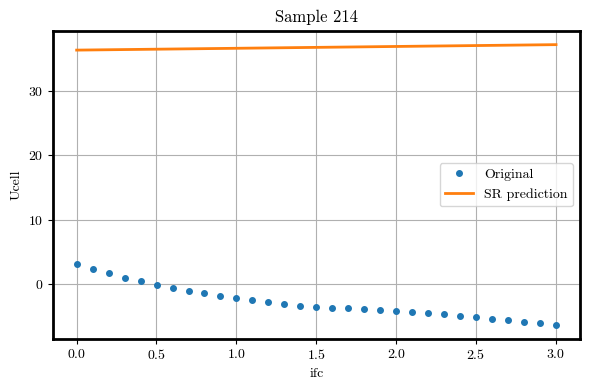

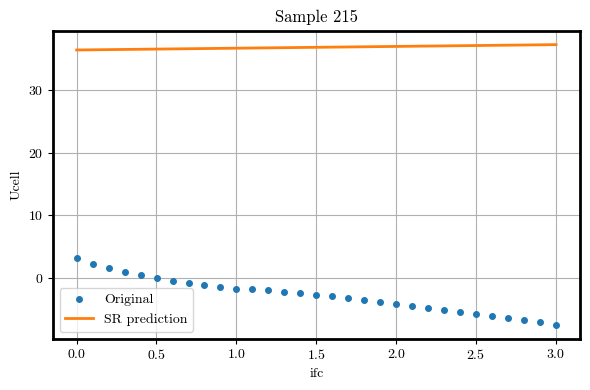

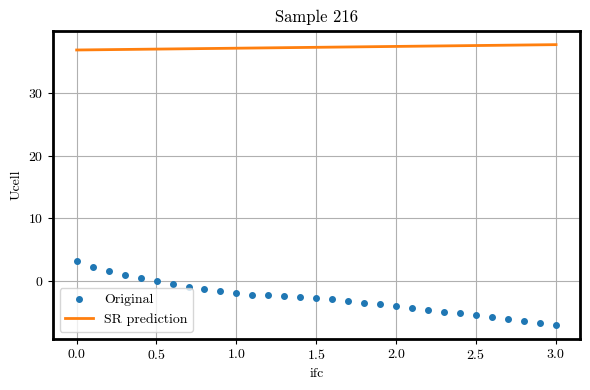

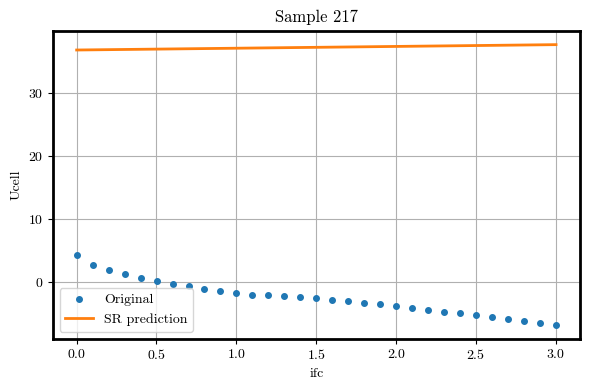

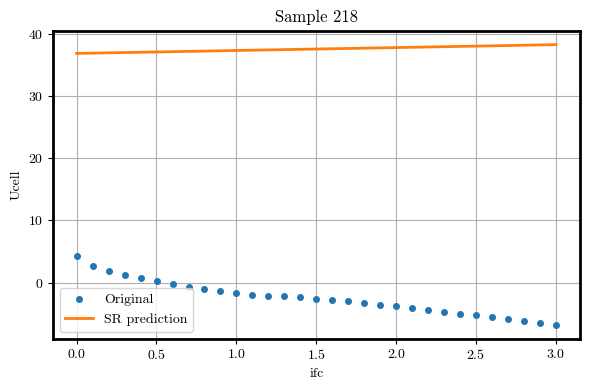

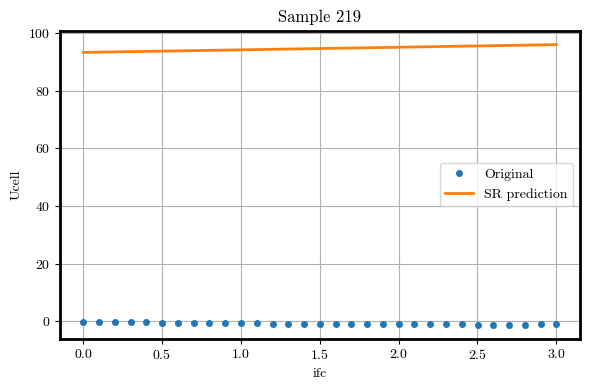

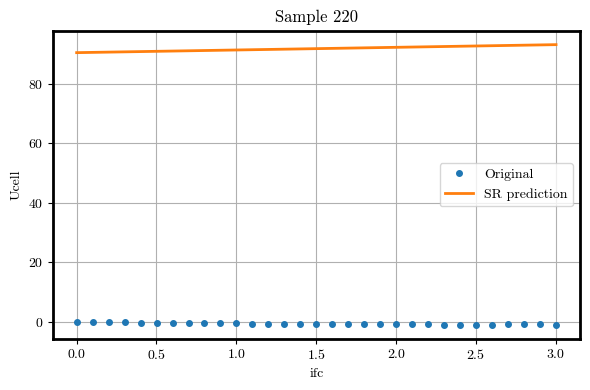

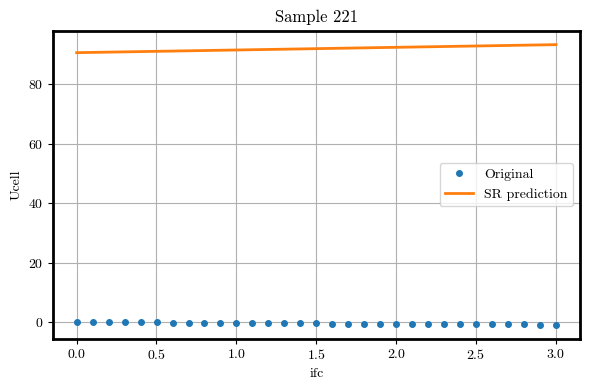

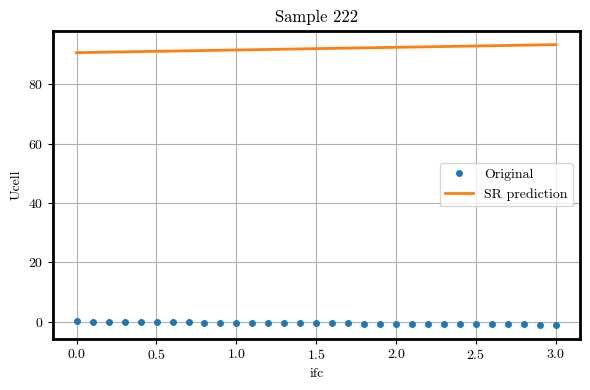

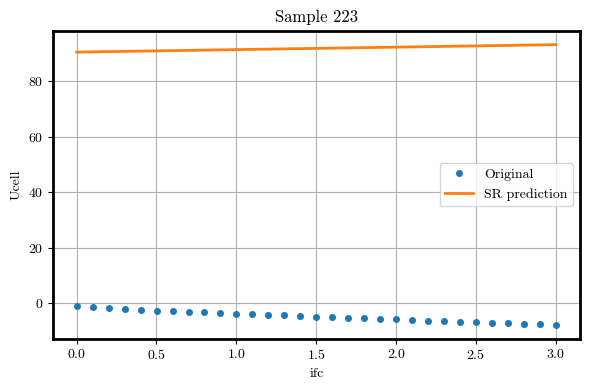

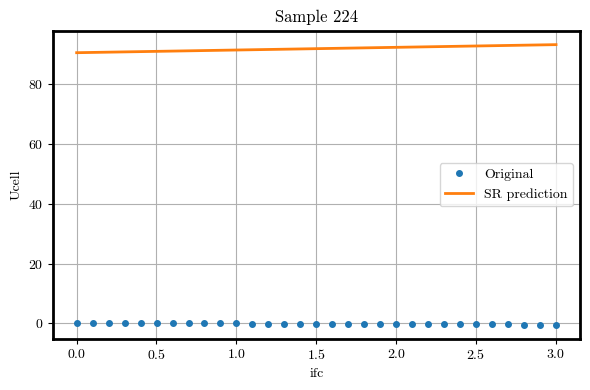

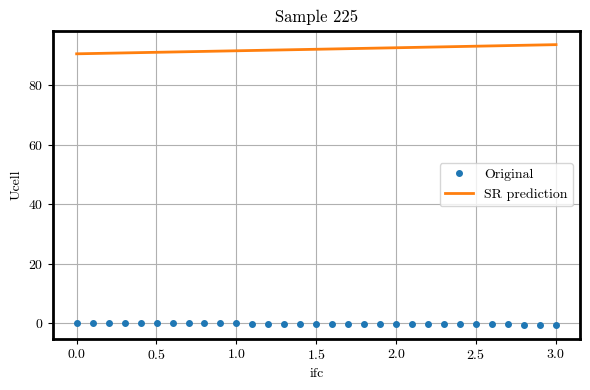

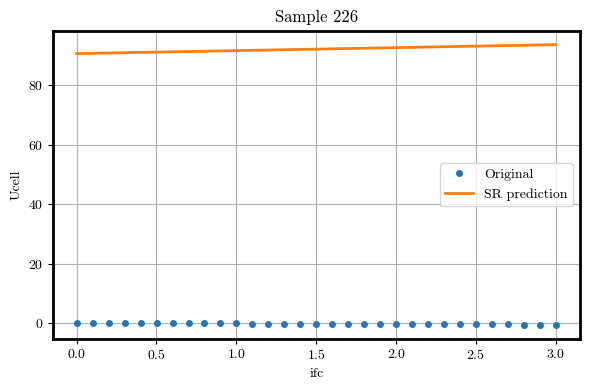

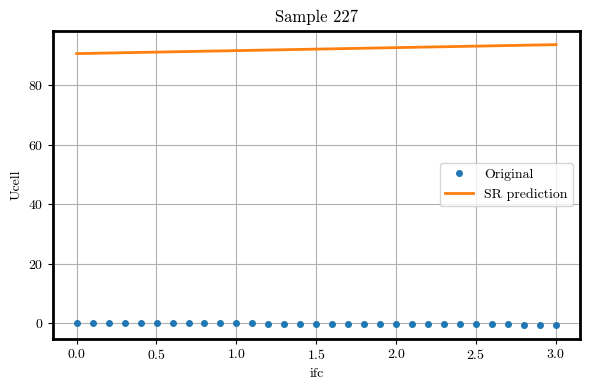

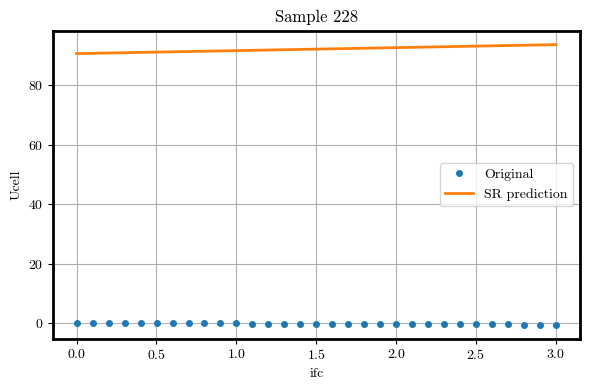

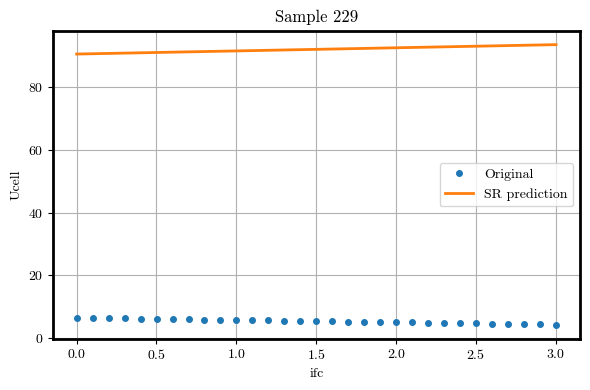

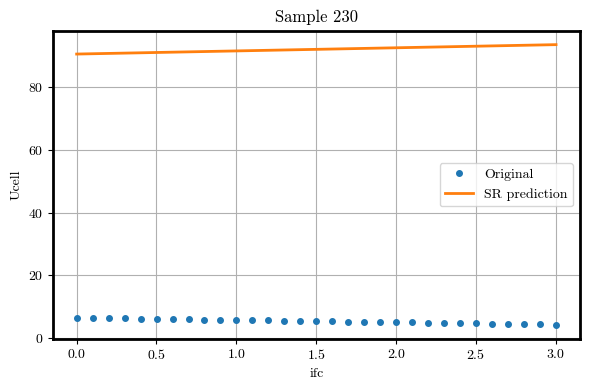

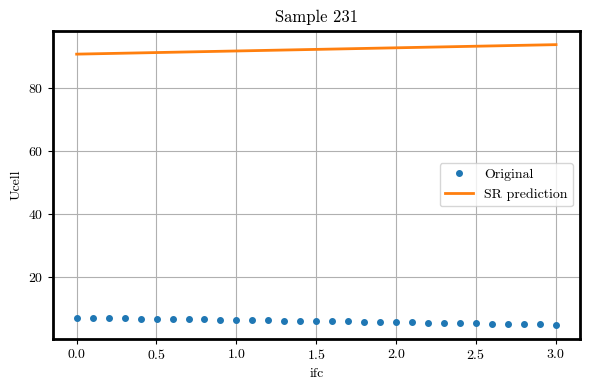

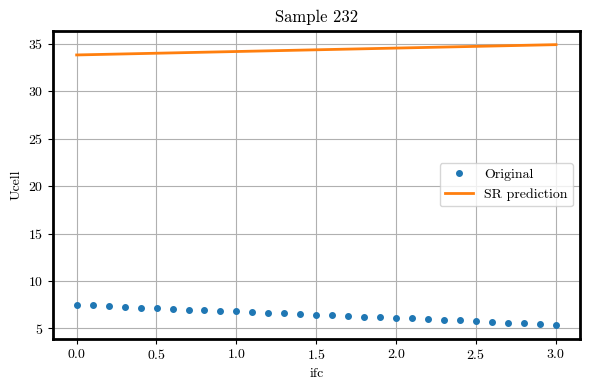

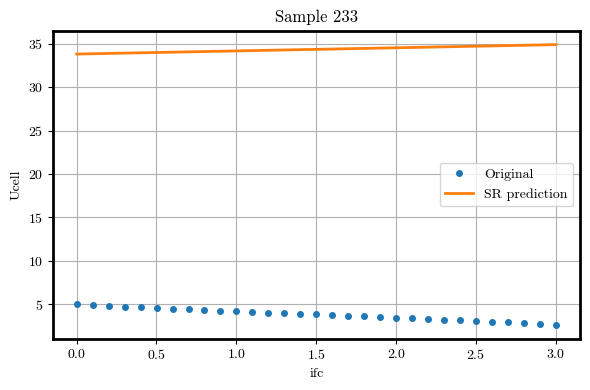

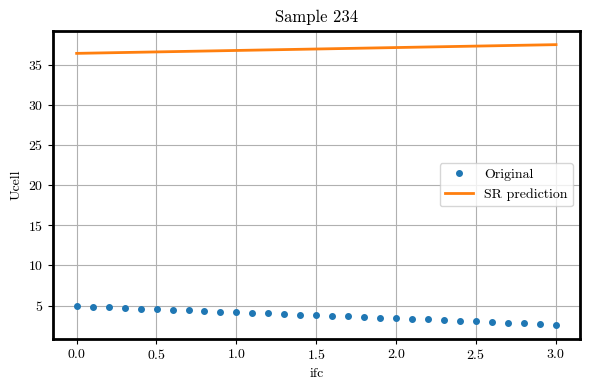

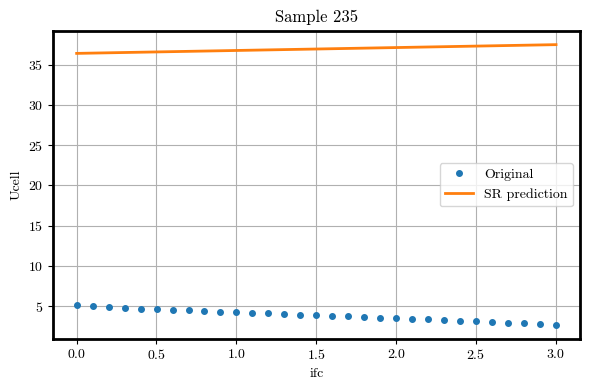

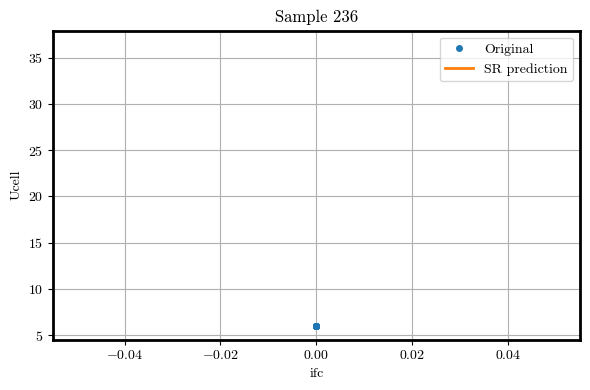

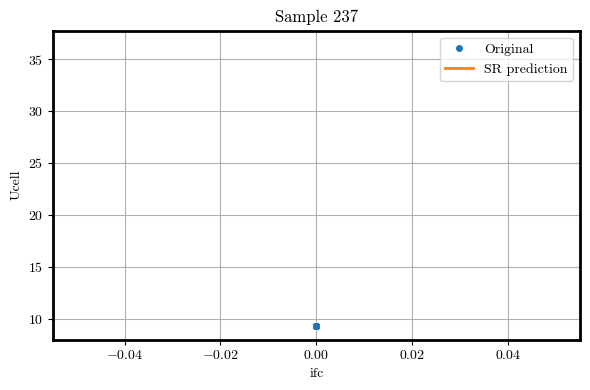

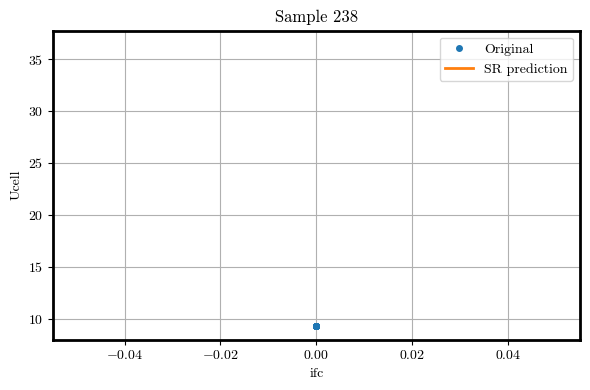

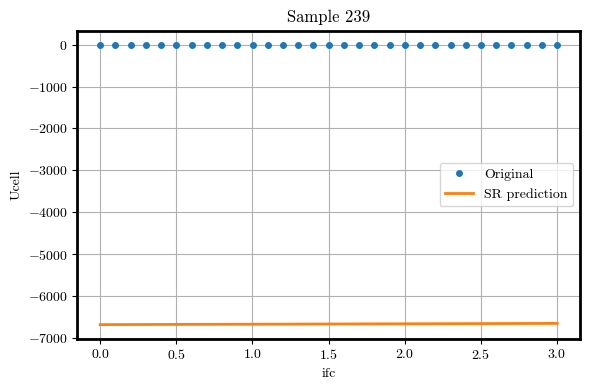

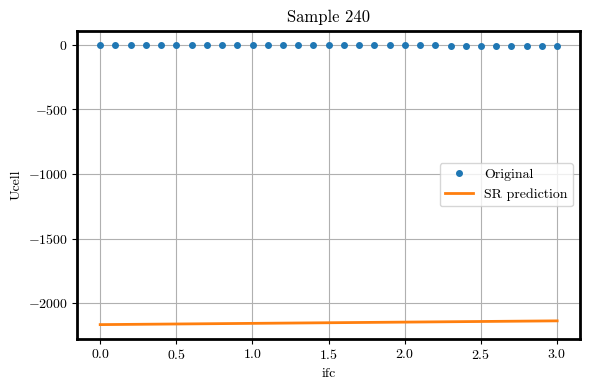

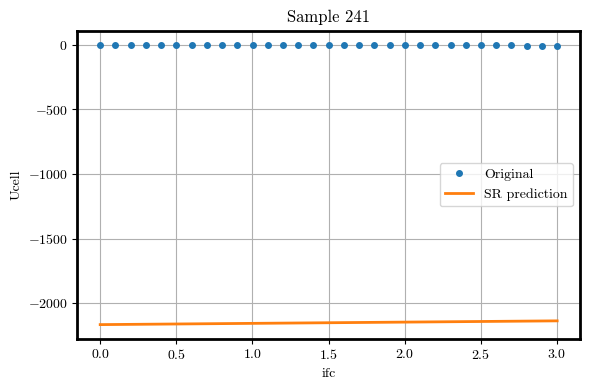

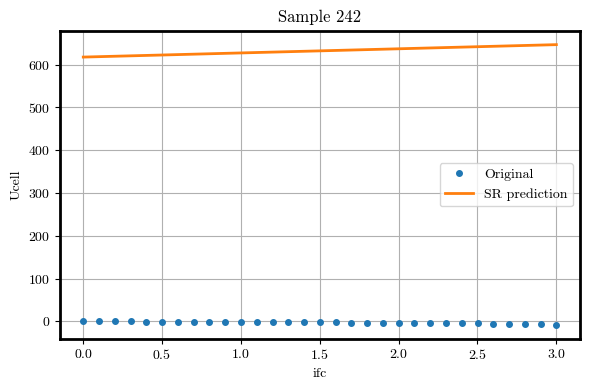

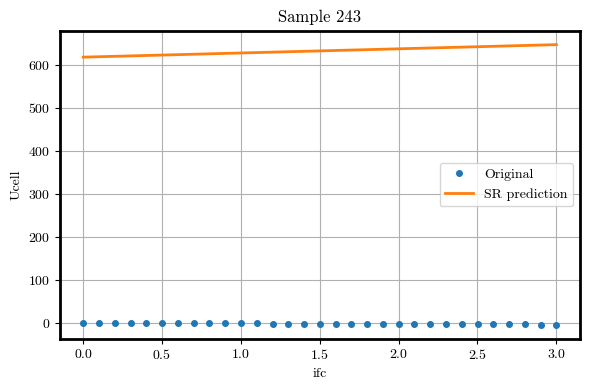

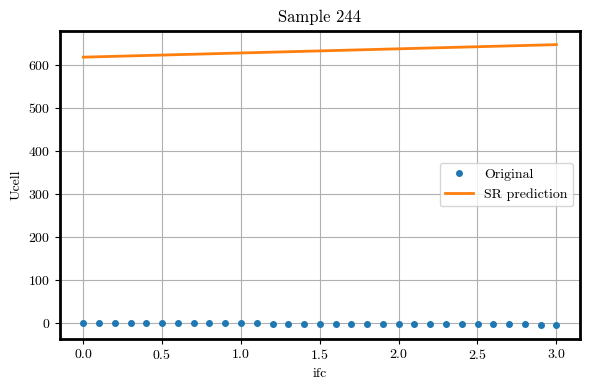

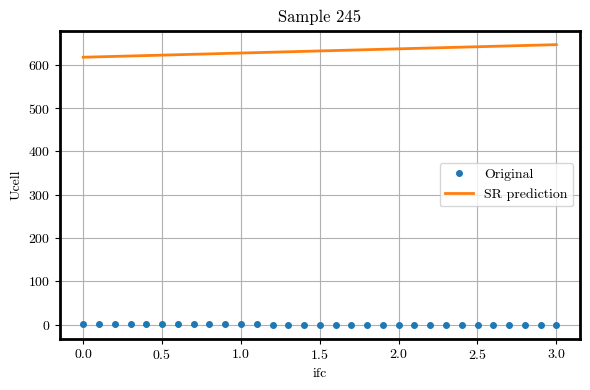

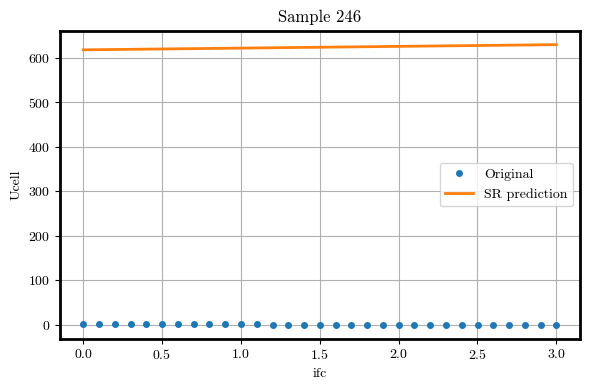

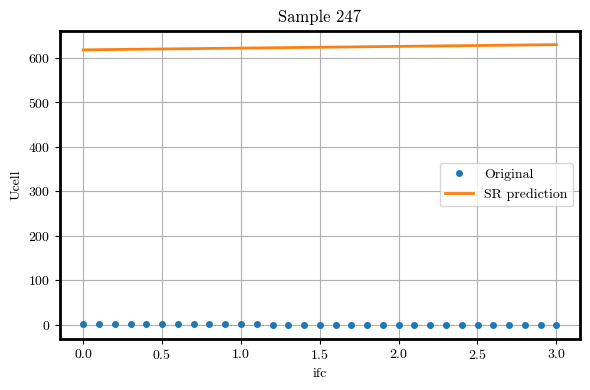

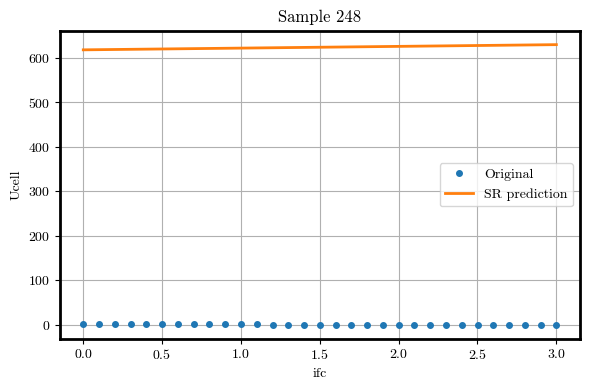

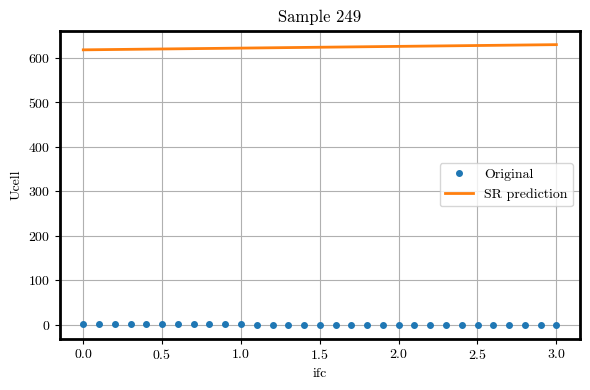

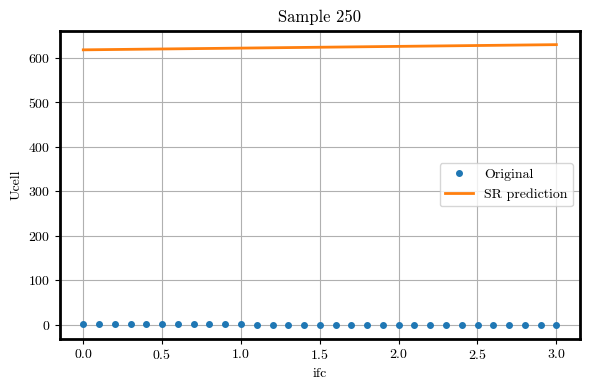

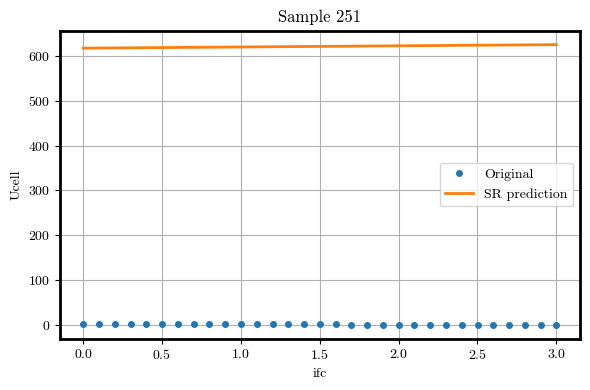

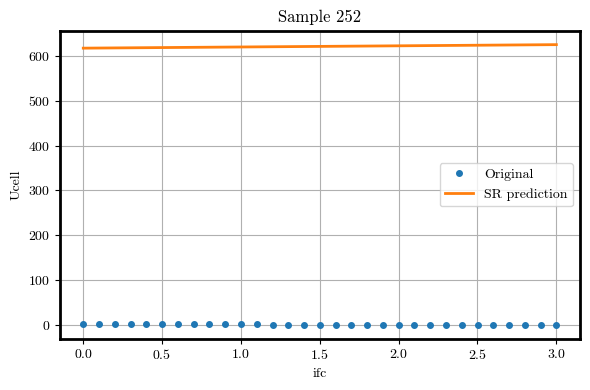

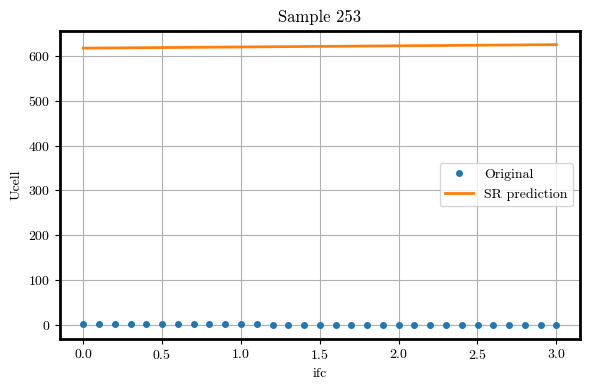

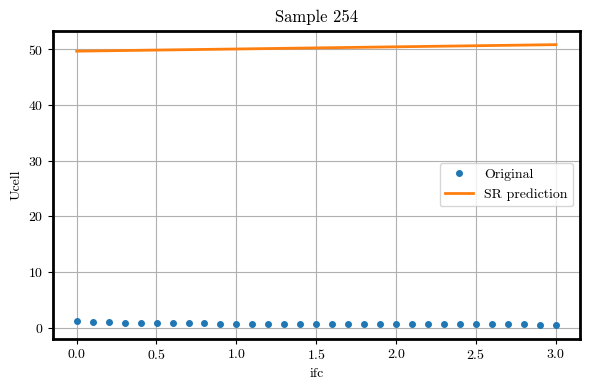

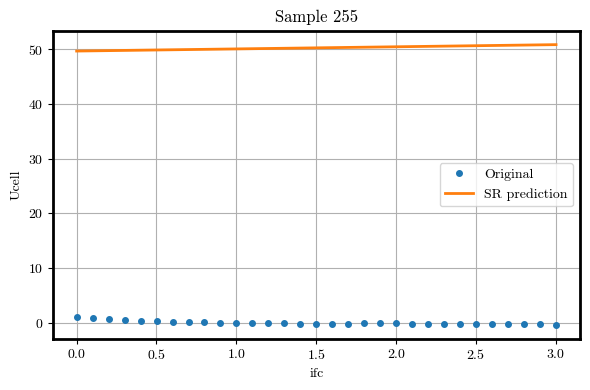

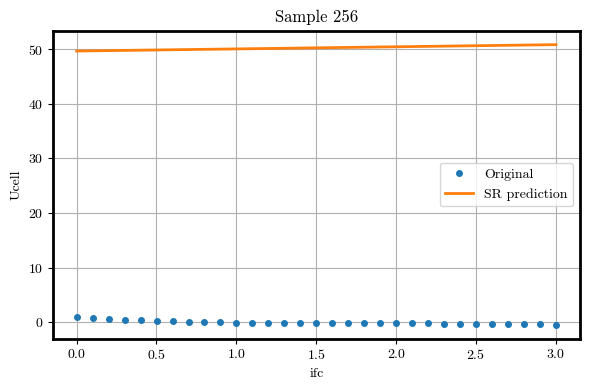

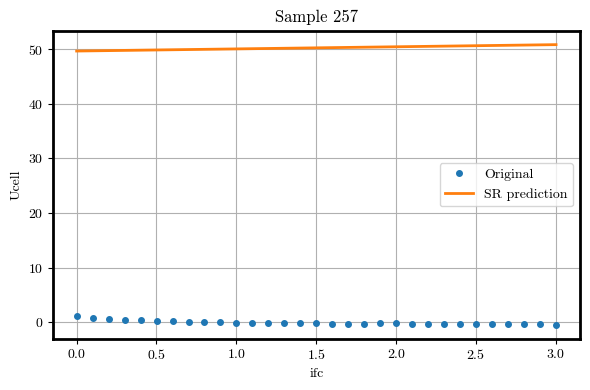

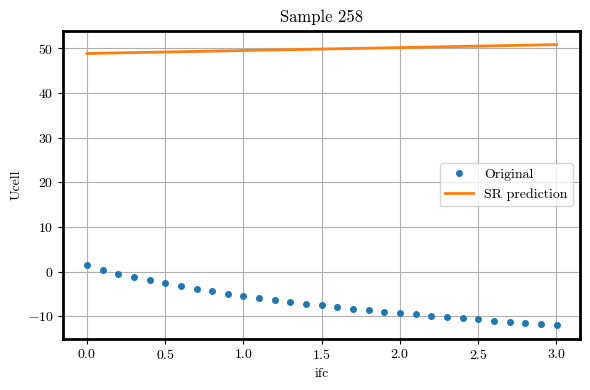

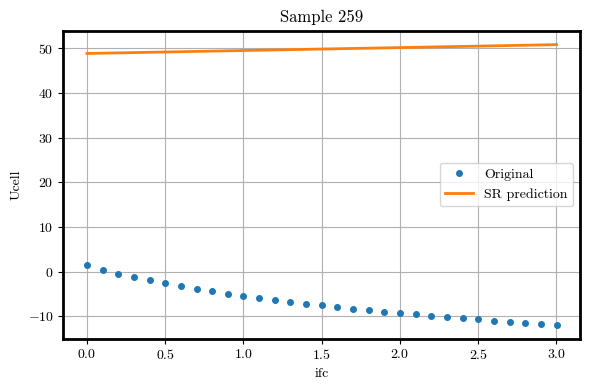

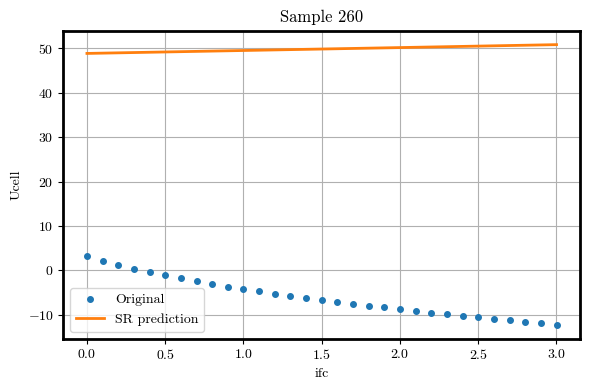

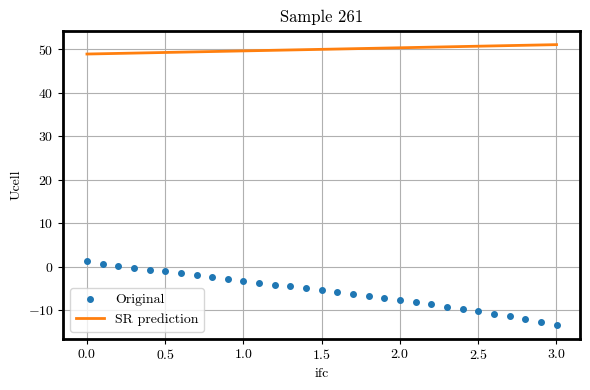

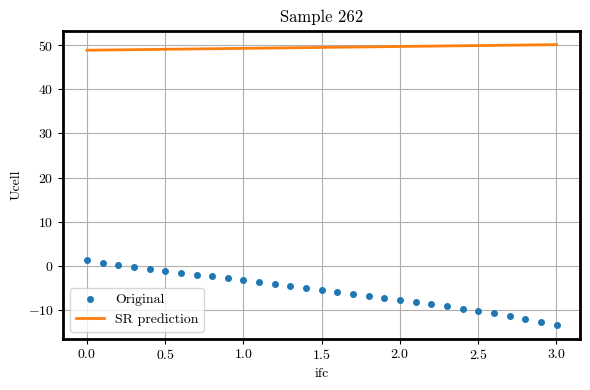

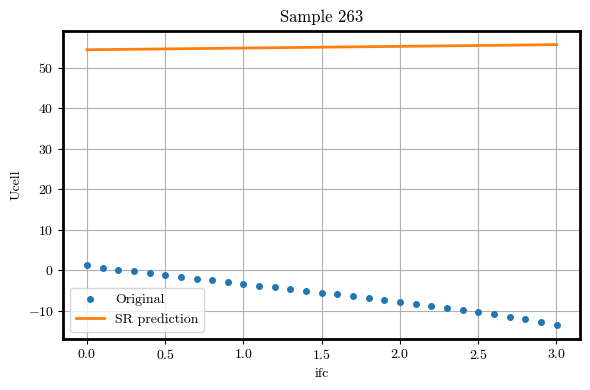

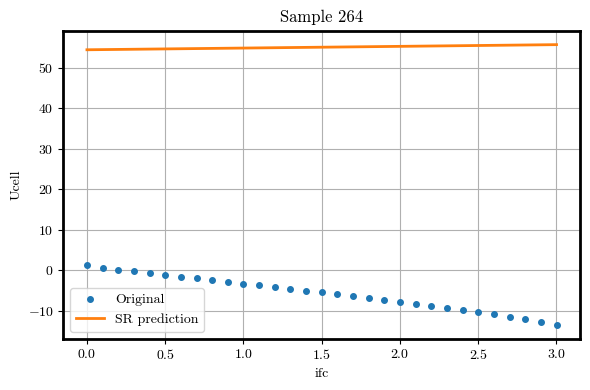

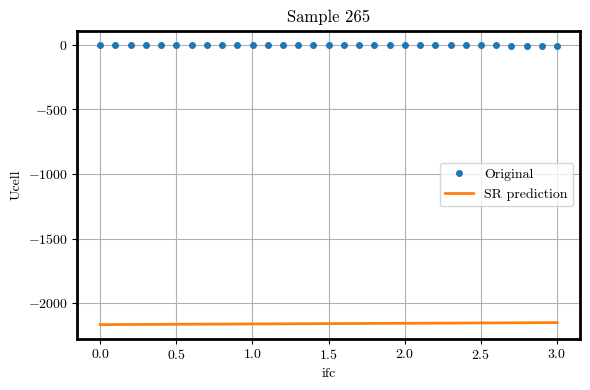

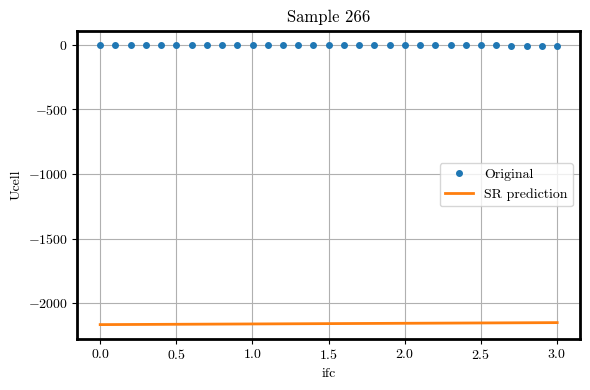

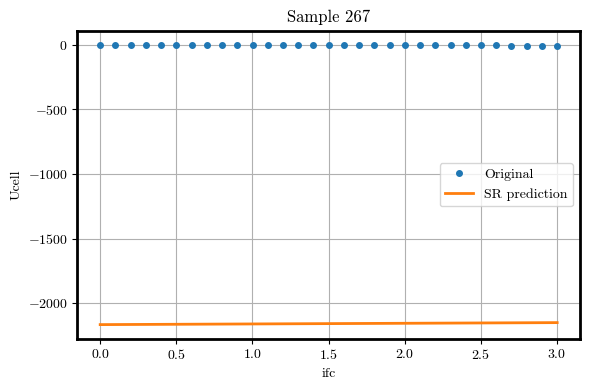

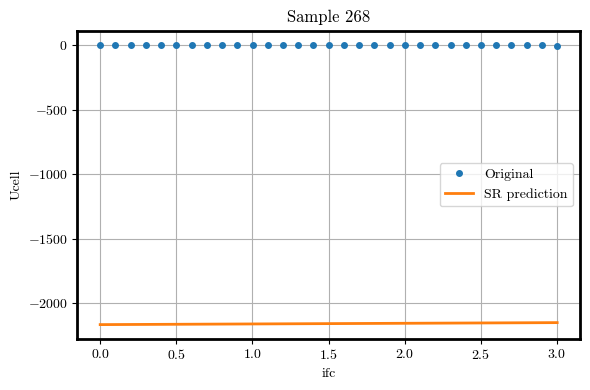

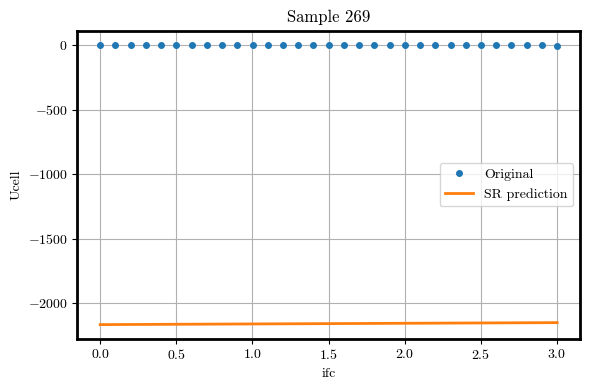

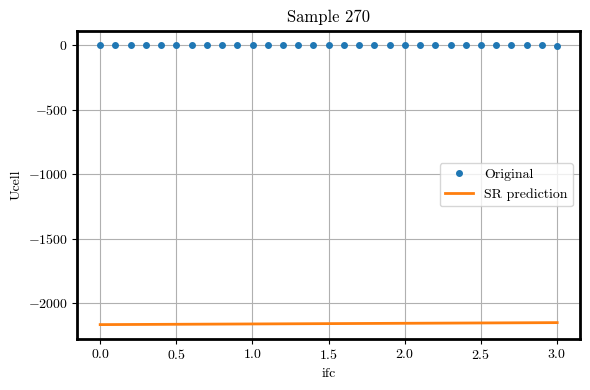

KeyboardInterrupt: 

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sr_vs_true(df, df_inputs, sr_a, sr_b, sr_c, ucell_cols, ifc_cols, sample_indices=None):
    if sample_indices is None:
        sample_indices = range(5)  # default: first 5

    for idx in sample_indices:
        # Original data
        t = df.loc[idx, ifc_cols].values.astype(float)
        y_true = df.loc[idx, ucell_cols].values.astype(float)

        # SR prediction of coefficients
        x_input = df_inputs.iloc[idx].values.reshape(1, -1)
        a = sr_a.predict(x_input)[0]
        b = sr_b.predict(x_input)[0]
        c = sr_c.predict(x_input)[0]

        # Predicted curve
        t_fit = np.linspace(t.min(), t.max(), 200)
        y_pred = a * t_fit**2 + b * t_fit + c

        # Plot
        plt.figure(figsize=(6, 4))
        plt.plot(t, y_true, 'o', label='Original', markersize=4)
        plt.plot(t_fit, y_pred, '-', label='SR prediction', linewidth=2)
        plt.title(f"Sample {idx}")
        plt.xlabel("ifc")
        plt.ylabel("Ucell")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_sr_vs_true(
    df=df,
    df_inputs=df_inputs,
    sr_a=sr_a,
    sr_b=sr_b,
    sr_c=sr_c,
    ucell_cols=ucell_cols,
    ifc_cols=ifc_cols,
    sample_indices=range(len(df))  # or choose worst-fit examples
)


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

errors = []

for idx in range(len(df)):
    t = df.loc[idx, ifc_cols].values.astype(float)
    y_true = df.loc[idx, ucell_cols].values.astype(float)
    x_input = df_inputs.iloc[idx].values.reshape(1, -1)

    a = sr_a.predict(x_input)[0]
    b = sr_b.predict(x_input)[0]
    c = sr_c.predict(x_input)[0]

    y_pred = a * t**2 + b * t + c
    mse = mean_squared_error(y_true, y_pred)
    errors.append((idx, mse))

df_errors = pd.DataFrame(errors, columns=["index", "mse"])


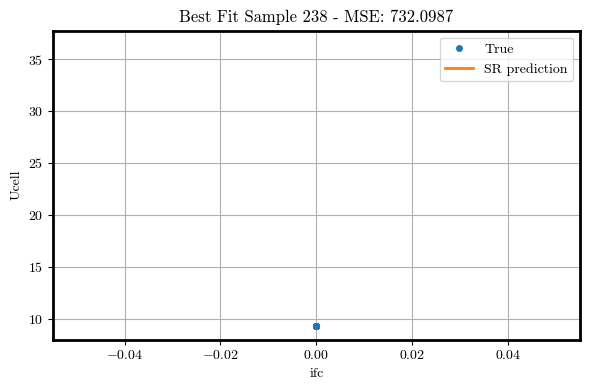

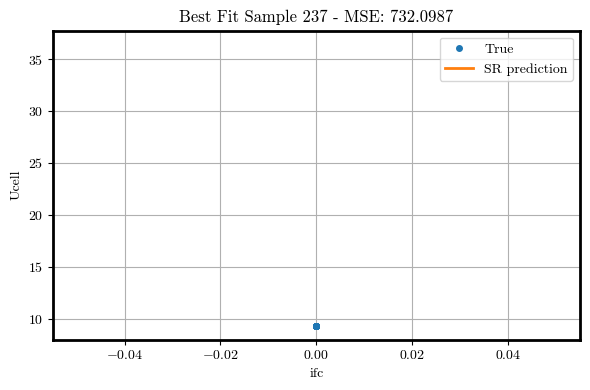

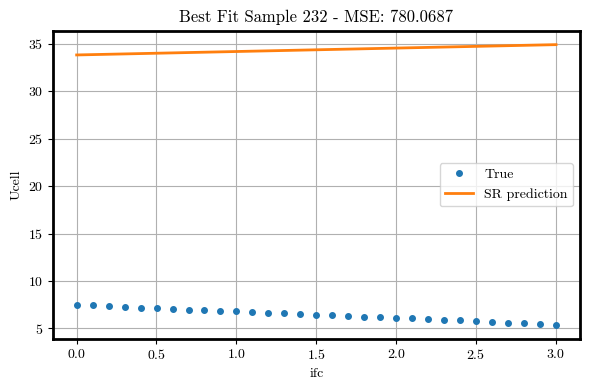

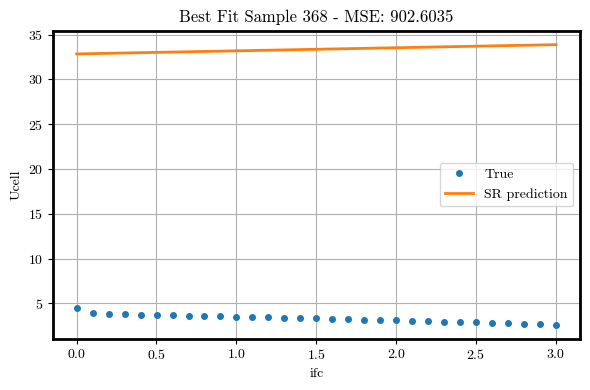

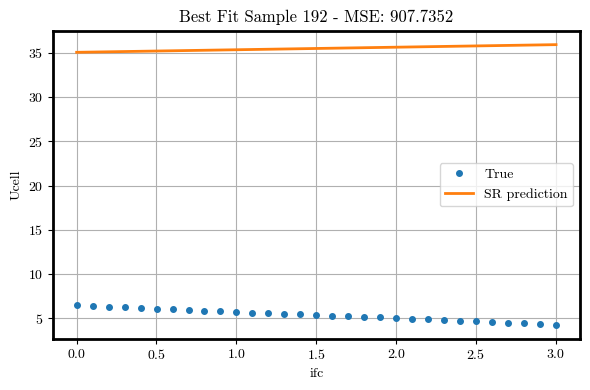

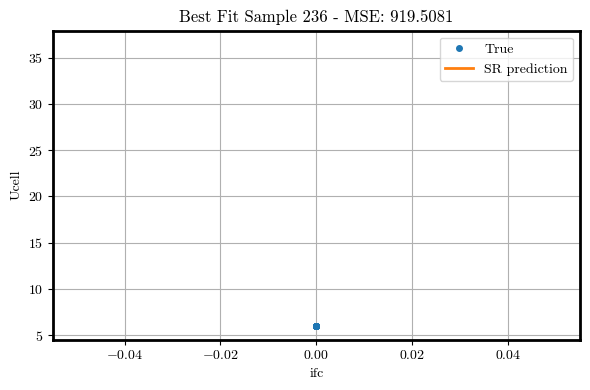

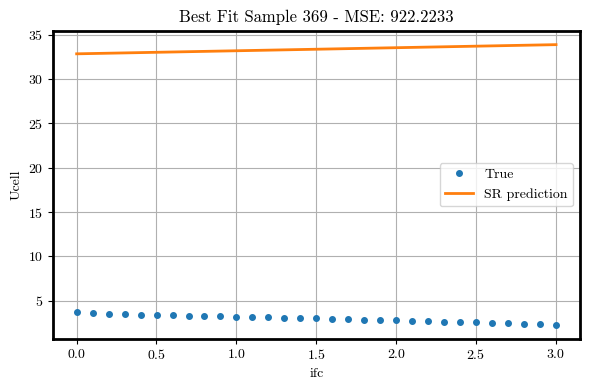

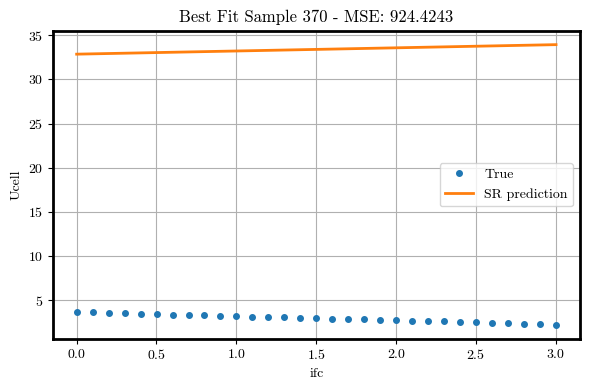

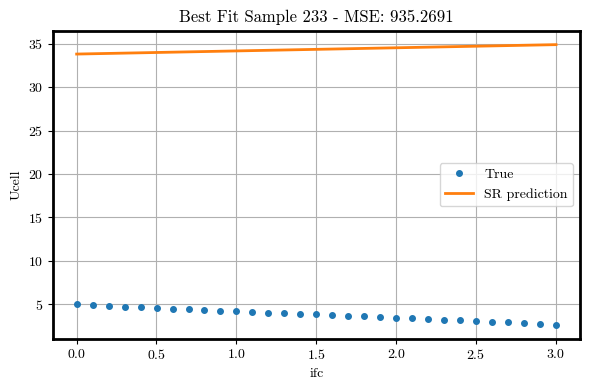

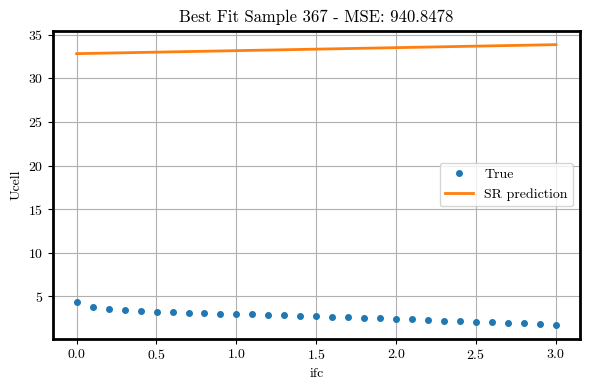

In [22]:
best_10_indices = df_errors.sort_values("mse", ascending=True).head(10)["index"].tolist()
import matplotlib.pyplot as plt

def plot_sr_vs_true_best_10(df, df_inputs, sr_a, sr_b, sr_c, ucell_cols, ifc_cols, sample_indices):
    for idx in sample_indices:
        t = df.loc[idx, ifc_cols].values.astype(float)
        y_true = df.loc[idx, ucell_cols].values.astype(float)
        x_input = df_inputs.iloc[idx].values.reshape(1, -1)

        a = sr_a.predict(x_input)[0]
        b = sr_b.predict(x_input)[0]
        c = sr_c.predict(x_input)[0]

        t_fit = np.linspace(t.min(), t.max(), 200)
        y_fit = a * t_fit**2 + b * t_fit + c

        plt.figure(figsize=(6, 4))
        plt.plot(t, y_true, 'o', label="True", markersize=4)
        plt.plot(t_fit, y_fit, '-', label="SR prediction", linewidth=2)
        plt.title(f"Best Fit Sample {idx} - MSE: {df_errors.loc[df_errors['index'] == idx, 'mse'].values[0]:.4f}")
        plt.xlabel("ifc")
        plt.ylabel("Ucell")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_sr_vs_true_best_10(
    df=df,
    df_inputs=df_inputs,
    sr_a=sr_a,
    sr_b=sr_b,
    sr_c=sr_c,
    ucell_cols=ucell_cols,
    ifc_cols=ifc_cols,
    sample_indices=best_10_indices
)
